# Load Data

In [1]:
import pandas as pd
import numpy as np

#plot 
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Normality test
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import normaltest
import scipy.stats as st

#Encoding 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

#score_metrics & cross validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

#model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy import stats

In [2]:
train = pd.read_csv('application_train.csv')

Data Pendukung yang digunakan untuk modeling ini adalah bureau

In [3]:
bureau = pd.read_csv('bureau.csv')

In [4]:
pd.set_option('display.max_columns', None)
train.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
111320      229159       0         Cash loans           F            N   
53609       162096       1         Cash loans           F            N   
208056      341148       0         Cash loans           F            N   
231715      368391       0         Cash loans           F            N   
156890      281842       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
111320               Y             2           40500.0     56034.0   
53609                Y             1           90000.0    592560.0   
208056               Y             1          202500.0    936436.5   
231715               Y             2          135000.0   1149210.0   
156890               Y             1          171000.0    450000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
111320       6075.0          49500.0        Children          Working   
53609       35937.0         450000.0   Unaccompanied          Working   
208056      62833.5         837000.0          Family          Working   
231715      33732.0        1003500.0   Unaccompanied          Working   
156890      27324.0         450000.0          Family          Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
111320                Lower secondary               Married   
53609   Secondary / secondary special               Married   
208056  Secondary / secondary special               Married   
231715  Secondary / secondary special  Single / not married   
156890  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
111320  House / apartment                    0.018801      -13947   
53609   House / apartment                    0.008866      -18133   
208056  House / apartment                    0.018634      -14189   
231715  House / apartment                    0.010147      -13113   
156890  House / apartment                    0.026392      -16652   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
111320           -260            -3885.0            -1764          NaN   
53609           -2324            -9152.0            -1677          NaN   
208056          -3191             -441.0            -5251          NaN   
231715          -1705              -94.0             -942          NaN   
156890          -5374            -7831.0              -30          NaN   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
111320           1               1                1                 1   
53609            1               1                0                 1   
208056           1               1                0                 1   
231715           1               1                0                 1   
156890           1               1                0                 1   

        FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
111320           1           0             Core staff              4.0   
53609            0           0         Cleaning staff              3.0   
208056           0           0  High skill tech staff              3.0   
231715           0           0               Managers              3.0   
156890           1           0                    NaN              3.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
111320                     2                            2   
53609                      2                            2   
208056                     2                            2   
231715                     2                            2   
156890                     2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
111320                     MONDAY                       12   
53609                      MONDAY                       12   
208056                   SA

In [5]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [6]:
bureau_filter = bureau[['SK_ID_CURR','CREDIT_ACTIVE','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','CREDIT_TYPE']]

In [7]:
bureau_filter.head()

SK_ID_CURR CREDIT_ACTIVE  CREDIT_DAY_OVERDUE  AMT_CREDIT_SUM  \
0      215354        Closed                   0         91323.0   
1      215354        Active                   0        225000.0   
2      215354        Active                   0        464323.5   
3      215354        Active                   0         90000.0   
4      215354        Active                   0       2700000.0   

       CREDIT_TYPE  
0  Consumer credit  
1      Credit card  
2  Consumer credit  
3      Credit card  
4  Consumer credit

In [8]:
bureau_filter.describe()

SK_ID_CURR  CREDIT_DAY_OVERDUE  AMT_CREDIT_SUM
count  1.716428e+06        1.716428e+06    1.716415e+06
mean   2.782149e+05        8.181666e-01    3.549946e+05
std    1.029386e+05        3.654443e+01    1.149811e+06
min    1.000010e+05        0.000000e+00    0.000000e+00
25%    1.888668e+05        0.000000e+00    5.130000e+04
50%    2.780550e+05        0.000000e+00    1.255185e+05
75%    3.674260e+05        0.000000e+00    3.150000e+05
max    4.562550e+05        2.792000e+03    5.850000e+08

In [9]:
bureau_filter['Have_Closed_Credit'] = np.where(bureau_filter['CREDIT_ACTIVE']=='Closed',1,0)
bureau_filter['Have_Active_Credit'] = np.where(bureau_filter['CREDIT_ACTIVE']=='Active',1,0)
bureau_filter['Sold_Credit'] = np.where(bureau_filter['CREDIT_ACTIVE']=='Sold',1,0)
bureau_filter['is_Bad_debt'] = np.where(bureau_filter['CREDIT_ACTIVE']=='Bad debt',1,0)
bureau_filter['Pastdue'] = np.where(bureau_filter['CREDIT_DAY_OVERDUE']==0,'No PD',
                                    np.where(bureau_filter['CREDIT_DAY_OVERDUE']<=30,'1-30 Hari',
                                             np.where(bureau_filter['CREDIT_DAY_OVERDUE']<=60,'31-60 Hari',
                                                      np.where(bureau_filter['CREDIT_DAY_OVERDUE']<=90,'61-90 Hari','>90 Hari'))))
bureau_filter['AMT_Active_Credit'] = np.where(bureau_filter['CREDIT_ACTIVE']=='Active',bureau_filter['AMT_CREDIT_SUM'],0)
bureau_filter['NO_PD'] = np.where(bureau_filter['Pastdue']=='No PD',1,0)
bureau_filter['PD 1-30'] = np.where(bureau_filter['Pastdue']=='1-30 Hari',1,0)
bureau_filter['PD 31-60'] = np.where(bureau_filter['Pastdue']=='31-60 Hari',1,0)
bureau_filter['PD 61-90'] = np.where(bureau_filter['Pastdue']=='61-90 Hari',1,0)
bureau_filter['PD >90'] = np.where(bureau_filter['Pastdue']=='>90 Hari',1,0)

In [10]:
bureau_filter.tail()

SK_ID_CURR CREDIT_ACTIVE  CREDIT_DAY_OVERDUE  AMT_CREDIT_SUM  \
1716423      259355        Active                   0        11250.00   
1716424      100044        Closed                   0        38130.84   
1716425      100044        Closed                   0        15570.00   
1716426      246829        Closed                   0        36000.00   
1716427      246829        Closed                   0        22500.00   

             CREDIT_TYPE  Have_Closed_Credit  Have_Active_Credit  Sold_Credit  \
1716423        Microloan                   0                   1            0   
1716424  Consumer credit                   1                   0            0   
1716425  Consumer credit                   1                   0            0   
1716426  Consumer credit                   1                   0            0   
1716427        Microloan                   1                   0            0   

         is_Bad_debt Pastdue  AMT_Active_Credit  NO_PD  PD 1-30  PD 31-60  \
1716423            0   No PD            11250.0      1        0         0   
1716424            0   No PD                0.0      1        0         0   
1716425            0   No PD                0.0      1        0         0   
1716426            0   No PD                0.0      1        0         0   
1716427            0   No PD                0.0      1        0         0   

         PD 61-90  PD >90  
1716423         0       0  
1716424         0       0  
1716425         0       0  
1716426         0       0  
1716427         0       0

Pada tahap ini, dilakukan groupby untuk masing-masing SK_ID_CURR, dimana satu SK_ID_CURR nantinya akan memiliki informasi 
- Pastdue minimal, maksimal dan modus yang pernah dialami nasabah 
- Jumlah amount credit yang dimiliki nasabah, baik yang active maupun close credit. Minimal dan maksimal amount credit yang pernah dimiliki nasabah
- Jumlah closed credit nasabah 
- Jumlah Sold Credit nasabah, pada sold credit ini saya asumsikan bahwa sold credit adalah Take Over Credit 
- Jumlah/ apakah nasabah merupakan bad debitur 

In [11]:
amt_credit_active = bureau_filter.groupby('SK_ID_CURR')['AMT_Active_Credit'].agg(['sum'])
close_credit = bureau_filter.groupby('SK_ID_CURR')['Have_Closed_Credit'].agg(['sum'])
active_credit = bureau_filter.groupby('SK_ID_CURR')['Have_Active_Credit'].agg(['sum'])
sold_credit = bureau_filter.groupby('SK_ID_CURR')['Sold_Credit'].agg(['sum'])
bad_debt = bureau_filter.groupby('SK_ID_CURR')['is_Bad_debt'].agg(['sum'])
no_pastdue = bureau_filter.groupby('SK_ID_CURR')['NO_PD'].agg(['sum'])
pastdue_1_30 = bureau_filter.groupby('SK_ID_CURR')['PD 1-30'].agg(['sum'])
pastdue_31_60 = bureau_filter.groupby('SK_ID_CURR')['PD 31-60'].agg(['sum'])
pastdue_61_90 = bureau_filter.groupby('SK_ID_CURR')['PD 61-90'].agg(['sum'])
pastdue_90_up= bureau_filter.groupby('SK_ID_CURR')['PD >90'].agg(['sum'])

In [12]:
amt = amt_credit_active.reset_index()
amt.columns = ['SK_ID_CURR','TOTAL_AMT_CREDIT_ACTIVE']

close = close_credit.reset_index()
close.columns = ['SK_ID_CURR','total_close_credit']

active = active_credit.reset_index()
active.columns = ['SK_ID_CURR','total_active_credit']

sold = sold_credit.reset_index()
sold.columns = ['SK_ID_CURR','total_sold_credit']

bad = bad_debt.reset_index()
bad.columns = ['SK_ID_CURR','total_bad_credit']

no_pd = no_pastdue.reset_index()
no_pd.columns = ['SK_ID_CURR','COUNT_NO_PD']

pd_1_30 = pastdue_1_30.reset_index()
pd_1_30.columns = ['SK_ID_CURR','COUNT_PD_1-30']

pd_31_60 = pastdue_31_60.reset_index()
pd_31_60.columns = ['SK_ID_CURR','COUNT_PD_31-60']

pd_61_90 = pastdue_61_90.reset_index()
pd_61_90.columns = ['SK_ID_CURR','COUNT_PD_61-90']

pd_90UP = pastdue_90_up.reset_index()
pd_90UP.columns = ['SK_ID_CURR','COUNT_PD_90UP']

In [13]:
tabel1 = pd.merge(amt, close, how='inner', on=['SK_ID_CURR', 'SK_ID_CURR'])
tabel1 = pd.merge(tabel1, active, how='inner', on=['SK_ID_CURR', 'SK_ID_CURR'])
tabel1 = pd.merge(tabel1, sold, how='inner', on=['SK_ID_CURR', 'SK_ID_CURR'])
tabel1 = pd.merge(tabel1, bad, how='inner', on=['SK_ID_CURR', 'SK_ID_CURR'])
tabel1 = pd.merge(tabel1, no_pd, how='inner', on=['SK_ID_CURR', 'SK_ID_CURR'])
tabel1 = pd.merge(tabel1, pd_1_30, how='inner', on=['SK_ID_CURR', 'SK_ID_CURR'])
tabel1 = pd.merge(tabel1, pd_31_60, how='inner', on=['SK_ID_CURR', 'SK_ID_CURR'])
tabel1 = pd.merge(tabel1, pd_61_90, how='inner', on=['SK_ID_CURR', 'SK_ID_CURR'])
bureau_filter_new = pd.merge(tabel1, pd_90UP, how='inner', on=['SK_ID_CURR', 'SK_ID_CURR'])

In [14]:
bureau_filter_new.head()

SK_ID_CURR  TOTAL_AMT_CREDIT_ACTIVE  total_close_credit  \
0      100001               884025.000                   4   
1      100002               481988.565                   6   
2      100003               810000.000                   3   
3      100004                    0.000                   2   
4      100005               598626.000                   1   

   total_active_credit  total_sold_credit  total_bad_credit  COUNT_NO_PD  \
0                    3                  0                 0            7   
1                    2                  0                 0            8   
2                    1                  0                 0            4   
3                    0                  0                 0            2   
4                    2                  0                 0            3   

   COUNT_PD_1-30  COUNT_PD_31-60  COUNT_PD_61-90  COUNT_PD_90UP  
0              0               0               0              0  
1              0               0               0              0  
2              0               0               0              0  
3              0               0               0              0  
4              0               0               0              0

### Merge Second Table and Main Table

In [15]:
train.shape

(307511, 122)

In [16]:
df = pd.merge(train, bureau_filter_new, on='SK_ID_CURR', how='left')
df.shape

(307511, 132)

In [17]:
pd.set_option('display.max_rows', None)
train_types =  pd.DataFrame(df.dtypes).reset_index()
train_types.columns = ['Kolom','Tipe Data']
train_types

Kolom Tipe Data
0                      SK_ID_CURR     int64
1                          TARGET     int64
2              NAME_CONTRACT_TYPE    object
3                     CODE_GENDER    object
4                    FLAG_OWN_CAR    object
5                 FLAG_OWN_REALTY    object
6                    CNT_CHILDREN     int64
7                AMT_INCOME_TOTAL   float64
8                      AMT_CREDIT   float64
9                     AMT_ANNUITY   float64
10                AMT_GOODS_PRICE   float64
11                NAME_TYPE_SUITE    object
12               NAME_INCOME_TYPE    object
13            NAME_EDUCATION_TYPE    object
14             NAME_FAMILY_STATUS    object
15              NAME_HOUSING_TYPE    object
16     REGION_POPULATION_RELATIVE   float64
17                     DAYS_BIRTH     int64
18                  DAYS_EMPLOYED     int64
19              DAYS_REGISTRATION   float64
20                DAYS_ID_PUBLISH     int64
21                    OWN_CAR_AGE   float64
22                     FLAG_MOBIL     int64
23                 FLAG_EMP_PHONE     int64
24                FLAG_WORK_PHONE     int64
25               FLAG_CONT_MOBILE     int64
26                     FLAG_PHONE     int64
27                     FLAG_EMAIL     int64
28                OCCUPATION_TYPE    object
29                CNT_FAM_MEMBERS   float64
30           REGION_RATING_CLIENT     int64
31    REGION_RATING_CLIENT_W_CITY     int64
32     WEEKDAY_APPR_PROCESS_START    object
33        HOUR_APPR_PROCESS_START     int64
34     REG_REGION_NOT_LIVE_REGION     int64
35     REG_REGION_NOT_WORK_REGION     int64
36    LIVE_REGION_NOT_WORK_REGION     int64
37         REG_CITY_NOT_LIVE_CITY     int64
38         REG_CITY_NOT_WORK_CITY     int64
39        LIVE_CITY_NOT_WORK_CITY     int64
40              ORGANIZATION_TYPE    object
41                   EXT_SOURCE_1   float64
42                   EXT_SOURCE_2   float64
43                   EXT_SOURCE_3   float64
44                 APARTMENTS_AVG   float64
45               BASEMENTAREA_AVG   float64
46    YEARS_BEGINEXPLUATATION_AVG   float64
47                YEARS_BUILD_AVG   float64
48                 COMMONAREA_AVG   float64
49                  ELEVATORS_AVG   float64
50                  ENTRANCES_AVG   float64
51                  FLOORSMAX_AVG   float64
52                  FLOORSMIN_AVG   float64
53                   LANDAREA_AVG   float64
54           LIVINGAPARTMENTS_AVG   float64
55                 LIVINGAREA_AVG   float64
56        NONLIVINGAPARTMENTS_AVG   float64
57              NONLIVINGAREA_AVG   float64
58                APARTMENTS_MODE   float64
59              BASEMENTAREA_MODE   float64
60   YEARS_BEGINEXPLUATATION_MODE   float64
61               YEARS_BUILD_MODE   float64
62                COMMONAREA_MODE   float64
63                 ELEVATORS_MODE   float64
64                 ENTRANCES_MODE   float64
65                 FLOORSMAX_MODE   float64
66                 FLOORSMIN_MODE   float64
67                  LANDAREA_MODE   float64
68          LIVINGAPARTMENTS_MODE   float64
69                LIVINGAREA_MODE   float64
70       NONLIVINGAPARTMENTS_MODE   float64
71             NONLIVINGAREA_MODE   float64
72                APARTMENTS_MEDI   float64
73              BASEMENTAREA_MEDI   float64
74   YEARS_BEGINEXPLUATATION_MEDI   float64
75               YEARS_BUILD_MEDI   float64
76                COMMONAREA_MEDI   float64
77                 ELEVATORS_MEDI   float64
78                 ENTRANCES_MEDI   float64
79                 FLOORSMAX_MEDI   float64
80                 FLOORSMIN_MEDI   float64
81                  LANDAREA_MEDI   float64
82          LIVINGAPARTMENTS_MEDI   float64
83                LIVINGAREA_MEDI   float64
84       NONLIVINGAPARTMENTS_MEDI   float64
85             NONLIVINGAREA_MEDI   float64
86             FONDKAPREMONT_MODE    object
87                 HOUSETYPE_MODE    object
88                 TOTALAREA_MODE   float64
89             WALLSMATERIAL_MODE    object
90            EMERGENCYS

**Memisahkan variabel numerik namun seharusnya kategorik ataupun sebaliknya**

In [18]:
df[['SK_ID_CURR']] = df[['SK_ID_CURR']].astype(np.object)
df[['TARGET']] = df[['TARGET']].astype(np.object)
df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']] = df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']].astype(np.object)
df[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION']] = df[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION']].astype(np.object)
df[['LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']] = df[['LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']].astype(np.object)
df[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5']] = df[['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5']].astype(np.object)
df[['FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10']] = df[['FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10']].astype(np.object)
df[['FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']] = df[['FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']].astype(np.object)

In [19]:
df['AGE'] = round(df['DAYS_BIRTH']/(-365.25))
df = df.drop('DAYS_BIRTH', axis=1)

In [20]:
#Variabel Categoric dan Numeric
categoric = df.loc[:, df.dtypes==np.object]
numeric = df.loc[:, df.dtypes!=np.object]

# Exploratory Data Analysis

### Statistic Descriptive

In [21]:
pd.set_option('display.max_columns', None)
numeric.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.737315   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
count     3.072330e+05               307511.000000  307511.000000   
mean      5.383962e+05                    0.020868   63815.045904   
std       3.694465e+05                    0.013831  141275.766519   
min       4.050000e+04                    0.000290  -17912.000000   
25%       2.385000e+05                    0.010006   -2760.000000   
50%       4.500000e+05                    0.018850   -1213.000000   
75%       6.795000e+05                    0.028663    -289.000000   
max       4.050000e+06                    0.072508  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000  104582.000000    307509.000000   
mean        -4986.120328     -2994.202373      12.061091         2.152665   
std          3522.886321      1509.450419      11.944812         0.910682   
min        -24672.000000     -7197.000000       0.000000         1.000000   
25%         -7479.500000     -4299.000000       5.000000         2.000000   
50%         -4504.000000     -3254.000000       9.000000         2.000000   
75%         -2010.000000     -1720.000000      15.000000         3.000000   
max             0.000000         0.000000      91.000000        20.000000   

       HOUR_APPR_PROCESS_START   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  \
count            307511.000000  134133.000000  3.068510e+05  246546.000000   
mean                 12.063419       0.502130  5.143927e-01       0.510853   
std                   3.265832       0.211062  1.910602e-01       0.194844   
min                   0.000000       0.014568  8.173617e-08       0.000527   
25%                  10.000000       0.334007  3.924574e-01       0.370650   
50%                  12.000000       0.505998  5.659614e-01       0.535276   
75%                  14.000000       0.675053  6.636171e-01       0.669057   
max                  23.000000       0.962693  8.549997e-01       0.896010   

       APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
count    151450.00000     127568.000000                157504.000000   
mean          0.11744          0.088442                     0.977735   
std           0.10824          0.082438                     0.059223   
min           0.00000          0.000000                     0.000000   
25%           0.05770          0.044200                     0.976700   
50%           0.08760          0.076300                     0.981600   
75%           0.14850          0.112200                     0.986600   
max           1.00000          1.000000                     1.000000   

       YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
count    103023.000000    92646.000000  143620.000000  152683.000000   
mean          0.752471        0.044621       0.078942       0.149725   
std           0.113280        0.076036       0.134576       0.100049   
min           0.000000        0.000000       0.000000       0.000000   
25%           0.687200        0.007800       0.000000       0.069000   
50%           0.755200        0.021100       0.000000       0.137900   
75%           0.823200        0.051500       0.120000       0.206900   
max           1.000000        1.000000       1.000000       1.000000   

       FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG 

In [22]:
train_de = train[train['DAYS_EMPLOYED']>0]
train_de.shape

(55374, 122)

In [23]:
train_de['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

- Days Employed lamanya nasabah menjadi karyawan saat pengajuan. Ada sebagian nilai yang bernilai positive dimana nilai-nilai tersebut sebagian besar merupakan nasabah Pensiunan dan beberapa diantaranya belum bekerja.

In [24]:
pd.set_option('display.max_columns', None)
categoric.describe()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count       307511  307511             307511      307511       307511   
unique      307511       2                  2           3            2   
top         100002       0         Cash loans           F            N   
freq             1  282686             278232      202448       202924   

       FLAG_OWN_REALTY NAME_TYPE_SUITE NAME_INCOME_TYPE  \
count           307511          306219           307511   
unique               2               7                8   
top                  Y   Unaccompanied          Working   
freq            213312          248526           158774   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
count                          307511             307511             307511   
unique                              5                  6                  6   
top     Secondary / secondary special            Married  House / apartment   
freq                           218391             196432             272868   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count       307511          307511           307511            307511   
unique           2               2                2                 2   
top              1               1                0                 1   
freq        307510          252125           246203            306937   

        FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  REGION_RATING_CLIENT  \
count       307511      307511          211120                307511   
unique           2           2              18                     3   
top              0           0        Laborers                     2   
freq        221080      290069           55186                226984   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
count                        307511                     307511   
unique                            3                          7   
top                               2                    TUESDAY   
freq                         229484                      53901   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                       307511                      307511   
unique                           2                           2   
top                              0                           0   
freq                        302854                      291899   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                        307511                  307511   
unique                            2                       2   
top                               0                       0   
freq                         295008                  283472   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
count                   307511                   307511   
unique                       2                        2   
top                          0                        0   
freq                    236644                   252296   

             ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
count                   307511              97216          153214   
unique                      58                  4               3   
top     Business Entity Type 3   reg oper account  block of flats   
freq                     67992              73830          150503   

       WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  FLAG_DOCUMENT_2  \
count              151170              161756           307511   
unique                  7                   2                2   
top                 Panel                  No                0   
freq                66040              159428           307498   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
count            307511           307511           307511           307511   
unique                2                2                2                2   
top                   1          

In [25]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [26]:
df = df[df['CODE_GENDER']!='XNA']

## Handling Missing Value

In [27]:
pd.set_option('display.max_rows', None)
df_na = pd.DataFrame(df.isnull().sum().sort_values(ascending=False).reset_index())
df_na.columns = ['kolom','missing_value']
df_na['Persentase Kolom Kosong'] = round((df_na['missing_value']/df.shape[0]*100),2)

list = []

for i, kolom in df_na.iterrows():
    a = df_na['kolom'][i]
    b = df[a].dtypes
    list.append(b)
list
df_na['tipe_data'] = list

In [28]:
df_na

kolom  missing_value  Persentase Kolom Kosong  \
0                 COMMONAREA_MEDI         214862                    69.87   
1                  COMMONAREA_AVG         214862                    69.87   
2                 COMMONAREA_MODE         214862                    69.87   
3        NONLIVINGAPARTMENTS_MEDI         213512                    69.43   
4        NONLIVINGAPARTMENTS_MODE         213512                    69.43   
5         NONLIVINGAPARTMENTS_AVG         213512                    69.43   
6              FONDKAPREMONT_MODE         210293                    68.39   
7           LIVINGAPARTMENTS_MEDI         210197                    68.36   
8            LIVINGAPARTMENTS_AVG         210197                    68.36   
9           LIVINGAPARTMENTS_MODE         210197                    68.36   
10                 FLOORSMIN_MEDI         208640                    67.85   
11                  FLOORSMIN_AVG         208640                    67.85   
12                 FLOORSMIN_MODE         208640                    67.85   
13                YEARS_BUILD_AVG         204486                    66.50   
14               YEARS_BUILD_MODE         204486                    66.50   
15               YEARS_BUILD_MEDI         204486                    66.50   
16                    OWN_CAR_AGE         202927                    65.99   
17                   LANDAREA_AVG         182588                    59.38   
18                  LANDAREA_MODE         182588                    59.38   
19                  LANDAREA_MEDI         182588                    59.38   
20              BASEMENTAREA_MODE         179942                    58.52   
21              BASEMENTAREA_MEDI         179942                    58.52   
22               BASEMENTAREA_AVG         179942                    58.52   
23                   EXT_SOURCE_1         173376                    56.38   
24              NONLIVINGAREA_AVG         169680                    55.18   
25             NONLIVINGAREA_MODE         169680                    55.18   
26             NONLIVINGAREA_MEDI         169680                    55.18   
27                 ELEVATORS_MODE         163890                    53.30   
28                 ELEVATORS_MEDI         163890                    53.30   
29                  ELEVATORS_AVG         163890                    53.30   
30             WALLSMATERIAL_MODE         156340                    50.84   
31                APARTMENTS_MEDI         156060                    50.75   
32                 APARTMENTS_AVG         156060                    50.75   
33                APARTMENTS_MODE         156060                    50.75   
34                 ENTRANCES_MODE         154827                    50.35   
35                 ENTRANCES_MEDI         154827                    50.35   
36                  ENTRANCES_AVG         154827                    50.35   
37                LIVINGAREA_MEDI         154349                    50.19   
38                 LIVINGAREA_AVG         154349                    50.19   
39                LIVINGAREA_MODE         154349                    50.19   
40                 HOUSETYPE_MODE         154296                    50.18   
41                 FLOORSMAX_MEDI         153019                    49.76   
42                 FLOORSMAX_MODE         153019                    49.76   
43                  FLOORSMAX_AVG         153019                    49.76   
44    YEARS_BEGINEXPLUATATION_AVG         150006                    48.78   
45   YEARS_BEGINEXPLUATATION_MODE         150006                    48.78   
46   YEARS_BEGINEXPLUATATION_MEDI         150006                    48.78   
47                 TOTALAREA_MODE         148430                    48.27   
48            EMERGENCYSTATE_MODE         145754                    47.40   
49                OCCUPATION_TYPE          96389                    31.35   
50                   EXT_SOURCE_3          60965                    19.83   
51        TOTAL_AMT_CRED

In [29]:
missing_value = df_na[df_na['Persentase Kolom Kosong']>=50]
missing_value

kolom  missing_value  Persentase Kolom Kosong tipe_data
0            COMMONAREA_MEDI         214862                    69.87   float64
1             COMMONAREA_AVG         214862                    69.87   float64
2            COMMONAREA_MODE         214862                    69.87   float64
3   NONLIVINGAPARTMENTS_MEDI         213512                    69.43   float64
4   NONLIVINGAPARTMENTS_MODE         213512                    69.43   float64
5    NONLIVINGAPARTMENTS_AVG         213512                    69.43   float64
6         FONDKAPREMONT_MODE         210293                    68.39    object
7      LIVINGAPARTMENTS_MEDI         210197                    68.36   float64
8       LIVINGAPARTMENTS_AVG         210197                    68.36   float64
9      LIVINGAPARTMENTS_MODE         210197                    68.36   float64
10            FLOORSMIN_MEDI         208640                    67.85   float64
11             FLOORSMIN_AVG         208640                    67.85   float64
12            FLOORSMIN_MODE         208640                    67.85   float64
13           YEARS_BUILD_AVG         204486                    66.50   float64
14          YEARS_BUILD_MODE         204486                    66.50   float64
15          YEARS_BUILD_MEDI         204486                    66.50   float64
16               OWN_CAR_AGE         202927                    65.99   float64
17              LANDAREA_AVG         182588                    59.38   float64
18             LANDAREA_MODE         182588                    59.38   float64
19             LANDAREA_MEDI         182588                    59.38   float64
20         BASEMENTAREA_MODE         179942                    58.52   float64
21         BASEMENTAREA_MEDI         179942                    58.52   float64
22          BASEMENTAREA_AVG         179942                    58.52   float64
23              EXT_SOURCE_1         173376                    56.38   float64
24         NONLIVINGAREA_AVG         169680                    55.18   float64
25        NONLIVINGAREA_MODE         169680                    55.18   float64
26        NONLIVINGAREA_MEDI         169680                    55.18   float64
27            ELEVATORS_MODE         163890                    53.30   float64
28            ELEVATORS_MEDI         163890                    53.30   float64
29             ELEVATORS_AVG         163890                    53.30   float64
30        WALLSMATERIAL_MODE         156340                    50.84    object
31           APARTMENTS_MEDI         156060                    50.75   float64
32            APARTMENTS_AVG         156060                    50.75   float64
33           APARTMENTS_MODE         156060                    50.75   float64
34            ENTRANCES_MODE         154827                    50.35   float64
35            ENTRANCES_MEDI         154827                    50.35   float64
36             ENTRANCES_AVG         154827                    50.35   float64
37           LIVINGAREA_MEDI         154349                    50.19   float64
38            LIVINGAREA_AVG         154349                    50.19   float64
39           LIVINGAREA_MODE         154349                    50.19   float64
40            HOUSETYPE_MODE         154296                    50.18    object

- Selain 'HOUSETYPE_MODE', kolom lain yang memiliki missing value > 50% akan dihapus dari dataset            

In [30]:
missing_value = missing_value[missing_value['kolom']!='HOUSETYPE_MODE']

In [31]:
df_new = df.drop(missing_value['kolom'].tolist(), axis=1)
df_new.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002      1         Cash loans           M            N   
1     100003      0         Cash loans           F            N   
2     100004      0    Revolving loans           M            Y   
3     100006      0         Cash loans           F            N   
4     100007      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801           -637            -3648.0   
1                    0.003541          -1188            -1186.0   
2                    0.010032           -225            -4260.0   
3                    0.008019          -3039            -9833.0   
4                    0.028663          -3038            -4311.0   

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
0            -2120          1              1               0                1   
1             -291          1              1               0                1   
2            -2531          1              1               1                1   
3            -2437          1              1               0                1   
4            -3458          1              1               0                1   

  FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0          1          0        Laborers              1.0                    2   
1          1          0      Core staff              2.0                    1   
2          1          0        Laborers              1.0                    2   
3          0          0        Laborers              2.0                    2   
4          0          0      Core staff              1.0                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           2                     MONDAY   
3                           2                  WEDNESDAY   
4                           2                   THURSDAY   

   HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
0                       10                          0   
1                       11                          0   
2                        9                          0   
3                       17                          0   
4                       11                          0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3              

In [32]:
missing_value2 = df_na[(df_na['Persentase Kolom Kosong']<50) & (df_na['Persentase Kolom Kosong']>=0) & (df_na['missing_value']>0)]
missing_value2

kolom  missing_value  Persentase Kolom Kosong  \
41                FLOORSMAX_MEDI         153019                    49.76   
42                FLOORSMAX_MODE         153019                    49.76   
43                 FLOORSMAX_AVG         153019                    49.76   
44   YEARS_BEGINEXPLUATATION_AVG         150006                    48.78   
45  YEARS_BEGINEXPLUATATION_MODE         150006                    48.78   
46  YEARS_BEGINEXPLUATATION_MEDI         150006                    48.78   
47                TOTALAREA_MODE         148430                    48.27   
48           EMERGENCYSTATE_MODE         145754                    47.40   
49               OCCUPATION_TYPE          96389                    31.35   
50                  EXT_SOURCE_3          60965                    19.83   
51       TOTAL_AMT_CREDIT_ACTIVE          44020                    14.32   
52              total_bad_credit          44020                    14.32   
53            total_close_credit          44020                    14.32   
54           total_active_credit          44020                    14.32   
55                 COUNT_PD_1-30          44020                    14.32   
56             total_sold_credit          44020                    14.32   
57                COUNT_PD_61-90          44020                    14.32   
58                   COUNT_NO_PD          44020                    14.32   
59                COUNT_PD_31-60          44020                    14.32   
60                 COUNT_PD_90UP          44020                    14.32   
61    AMT_REQ_CREDIT_BUREAU_YEAR          41519                    13.50   
62    AMT_REQ_CREDIT_BUREAU_HOUR          41519                    13.50   
63     AMT_REQ_CREDIT_BUREAU_QRT          41519                    13.50   
64     AMT_REQ_CREDIT_BUREAU_MON          41519                    13.50   
65    AMT_REQ_CREDIT_BUREAU_WEEK          41519                    13.50   
66     AMT_REQ_CREDIT_BUREAU_DAY          41519                    13.50   
67               NAME_TYPE_SUITE           1292                     0.42   
68      OBS_30_CNT_SOCIAL_CIRCLE           1021                     0.33   
69      DEF_30_CNT_SOCIAL_CIRCLE           1021                     0.33   
70      OBS_60_CNT_SOCIAL_CIRCLE           1021                     0.33   
71      DEF_60_CNT_SOCIAL_CIRCLE           1021                     0.33   
72                  EXT_SOURCE_2            660                     0.21   
73               AMT_GOODS_PRICE            278                     0.09   
74                   AMT_ANNUITY             12                     0.00   
75               CNT_FAM_MEMBERS              2                     0.00   
76        DAYS_LAST_PHONE_CHANGE              1                     0.00   

   tipe_data  
41   float64  
42   float64  
43   float64  
44   float64  
45   float64  
46   float64  
47   float64  
48    object  
49    object  
50   float64  
51   float64  
52   float64  
53   float64  
54   float64  
55   float64  
56   float64  
57   float64  
58   float64  
59   float64  
60   float64  
61   float64  
62   float64  
63   float64  
64   float64  
65   float64  
66   float64  
67    object  
68   float64  
69   float64  
70   float64  
71   float64  
72   float64  
73   float64  
74   float64  
75   float64  
76   float64

In [33]:
c = df_new[missing_value2['kolom'].unique().tolist()]
categoric_na = c.select_dtypes("object").columns.tolist() + ['HOUSETYPE_MODE']

In [34]:
df_new['EMERGENCYSTATE_MODE'].value_counts()

No     159425
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [35]:
df_new['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [36]:
df_new['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [37]:
df_new['HOUSETYPE_MODE'].value_counts()

block of flats      150500
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [38]:
categoric = df_new.loc[:, df_new.dtypes==np.object]
numeric = df_new.loc[:, df_new.dtypes!=np.object]

In [39]:
tabel1.columns

Index(['SK_ID_CURR', 'TOTAL_AMT_CREDIT_ACTIVE', 'total_close_credit',
       'total_active_credit', 'total_sold_credit', 'total_bad_credit',
       'COUNT_NO_PD', 'COUNT_PD_1-30', 'COUNT_PD_31-60', 'COUNT_PD_61-90'],
      dtype='object')

Strategi Handling Missing Value 
- Pada kolom numerik, missing value akan diisi dengan median. Namun kolom seperti 'TOTAL_AMT_CREDIT_ACTIVE', 'total_close_credit','total_active_credit', 'total_sold_credit', 'total_bad_credit','COUNT_NO_PD', 'COUNT_PD_1-30', 'COUNT_PD_31-60', 'COUNT_PD_61-90','COUNT_PD_90UP' akan diisi dengan nilai 0, karena diasumsikan bahwa missing value pada kolom-kolom tersebut adalah customer yang sama sekali belum pernah melakukan peminjaman di tempat manapun atau tidak ada history credit di bureau/biro kredit
- Pada kolom kategorik, missing value 'EMERGENCYSTATE_MODE' akan diisi dengan modus, 'OCCUPATION_TYPE','NAME_TYPE_SUITE','HOUSETYPE_MODE' akan diisi dengan 'other'

In [40]:
numeric_na = df_new[missing_value2['kolom']].select_dtypes(exclude=[object]).columns

In [41]:
fitur = ['TOTAL_AMT_CREDIT_ACTIVE', 'total_close_credit', 'total_active_credit', 'total_sold_credit', 'total_bad_credit',\
       'COUNT_NO_PD', 'COUNT_PD_1-30', 'COUNT_PD_31-60', 'COUNT_PD_61-90','COUNT_PD_90UP']
               
for i in range(0,len(fitur)):
    df_new[fitur[i]].fillna(0, inplace=True)  

In [42]:
fitur = ['FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG',\
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',\
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR',\
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',\
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',\
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'DEF_60_CNT_SOCIAL_CIRCLE',\
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE', \
    'EXT_SOURCE_2', 'AMT_GOODS_PRICE','AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']
               
for i in range(0,len(fitur)):
    df_new[fitur[i]].fillna(df_new[fitur[i]].quantile(0.5), inplace=True) 

In [43]:
fitur = ['OCCUPATION_TYPE','NAME_TYPE_SUITE','HOUSETYPE_MODE']
               
for i in range(0,len(fitur)):
    df_new[fitur[i]].fillna('Other', inplace=True) 

In [44]:
df_new['EMERGENCYSTATE_MODE'].fillna('Other', inplace=True)

In [45]:
df_new.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_

In [46]:
numeric = df_new.select_dtypes(exclude=[object])
categoric = df_new.select_dtypes(include=[object])

Terkait informasi tersebut, sudah tidak missing value pada semua kolom dataset

### Univariate Analysis

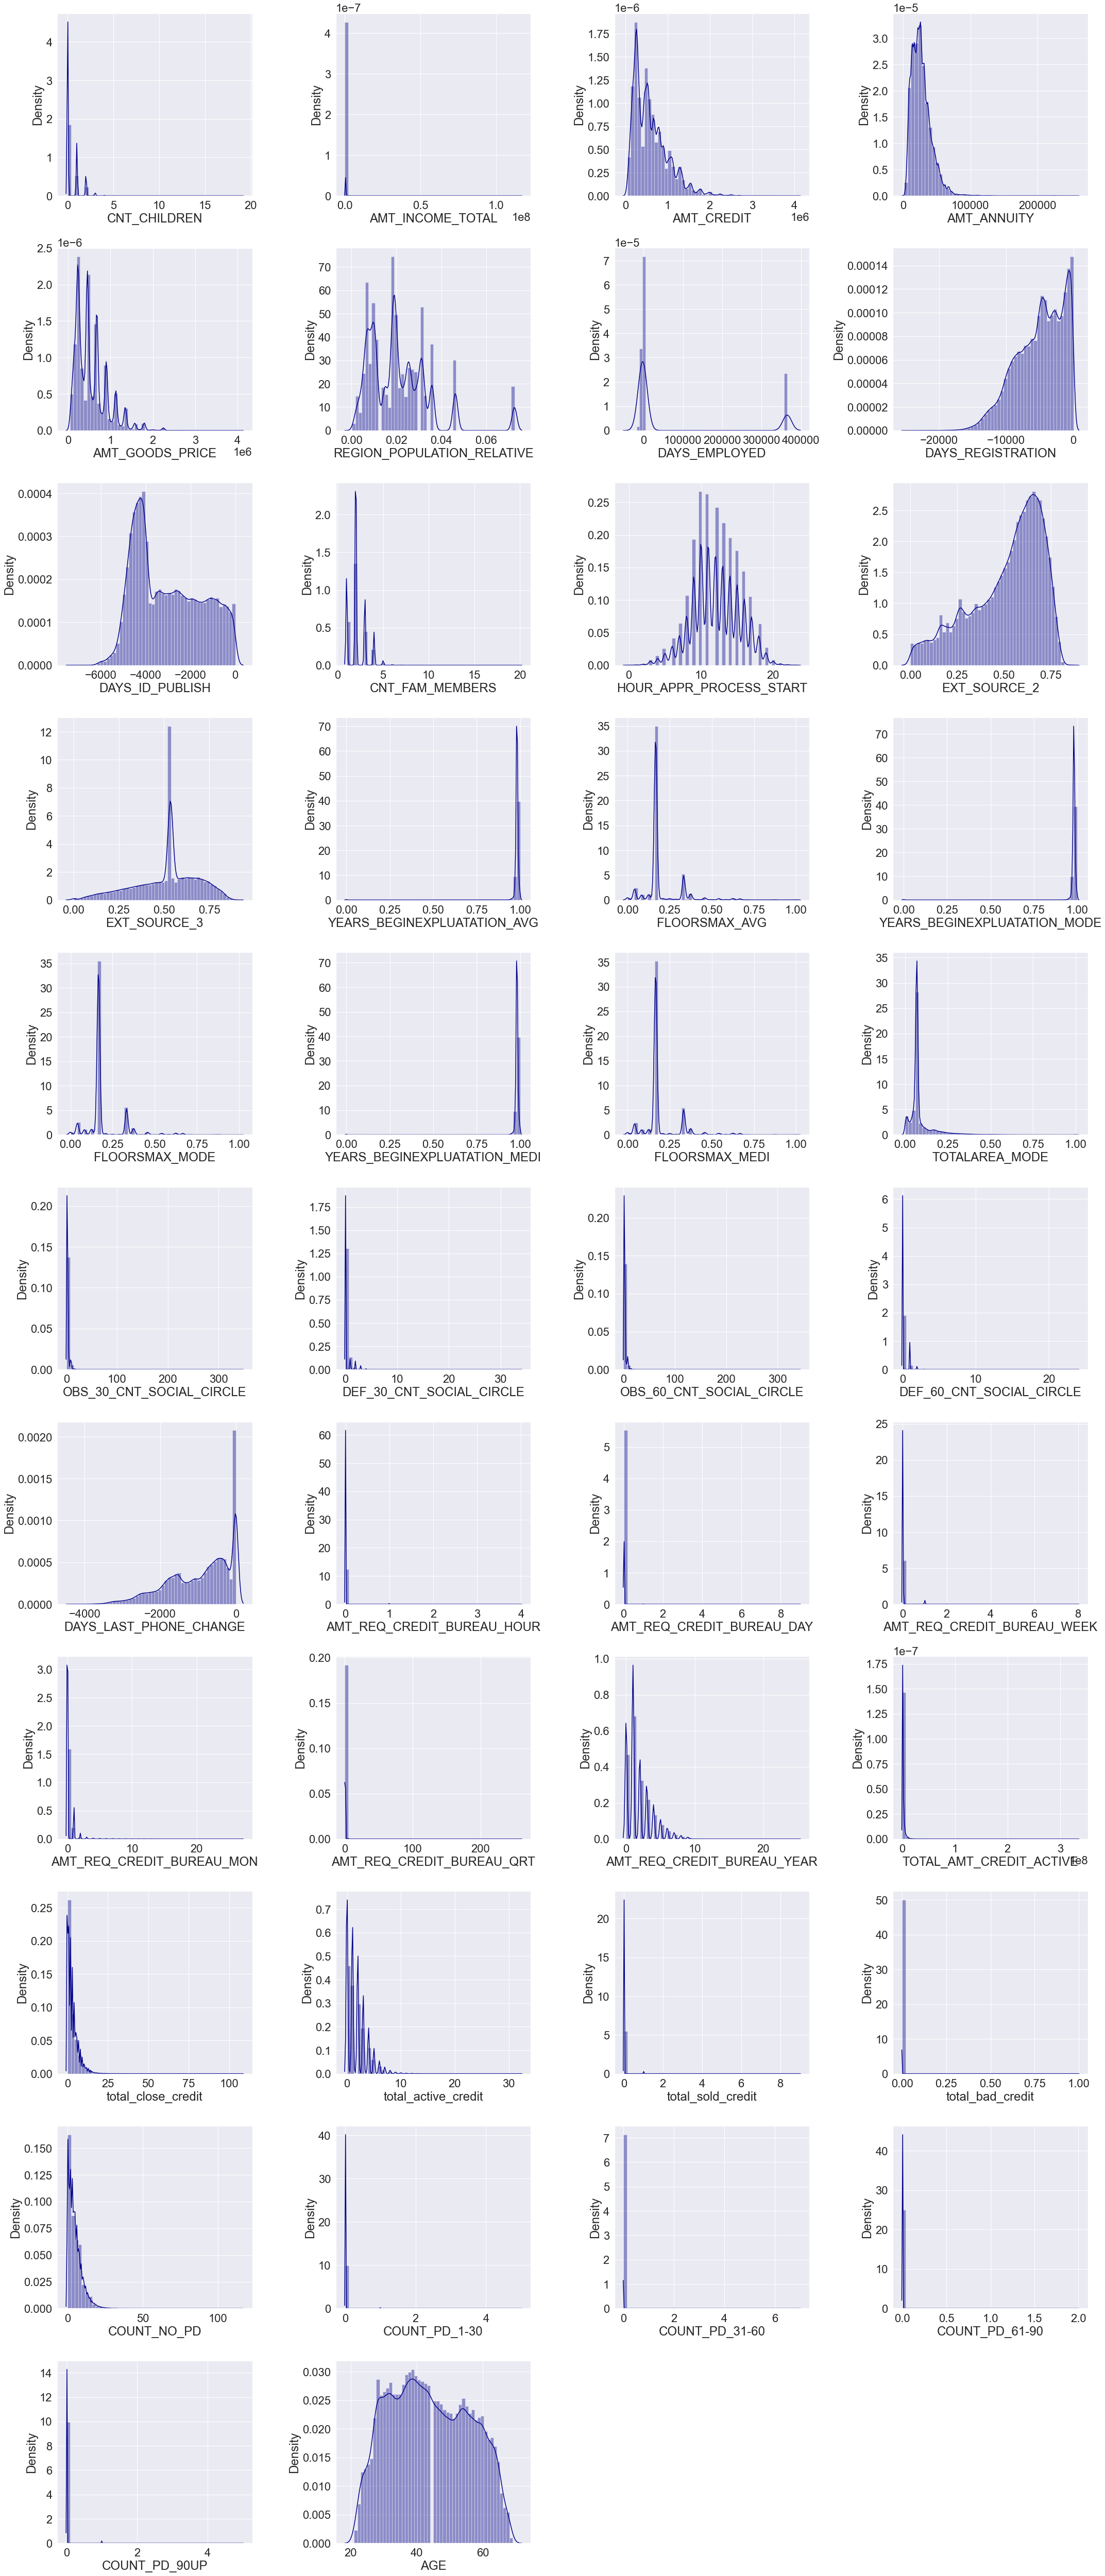

In [47]:
features = numeric.columns


for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (30,70)
    sns.set(font_scale=2)
    plt.subplot(11,4,i+1)
    sns.distplot(x=numeric[features[i]], color='Darkblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [48]:
list1 =[]
list2 = []
fitur = categoric.columns.tolist()
for i in range(0, len(fitur)):
    a = df_new[fitur[i]].nunique()
    if a <= 2:
        b = fitur[i]
        list1.append(b)
    else:
        c = fitur[i]
        list2.append(c)
print('<= 2 kolom :', list1)
print(len(list1))
print()
print('>=3 kolom :', list2)
print(len(list2))

<= 2 kolom : ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
37

>=3 kolom : ['SK_ID_CURR', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'OR

In [49]:
categoric['TARGET'] = np.where(categoric['TARGET']==1,'Difficulties Payment', 'No Difficulties Payment')
df_new['TARGET'] = np.where(df_new['TARGET']==1,'Difficulties Payment', 'No Difficulties Payment')

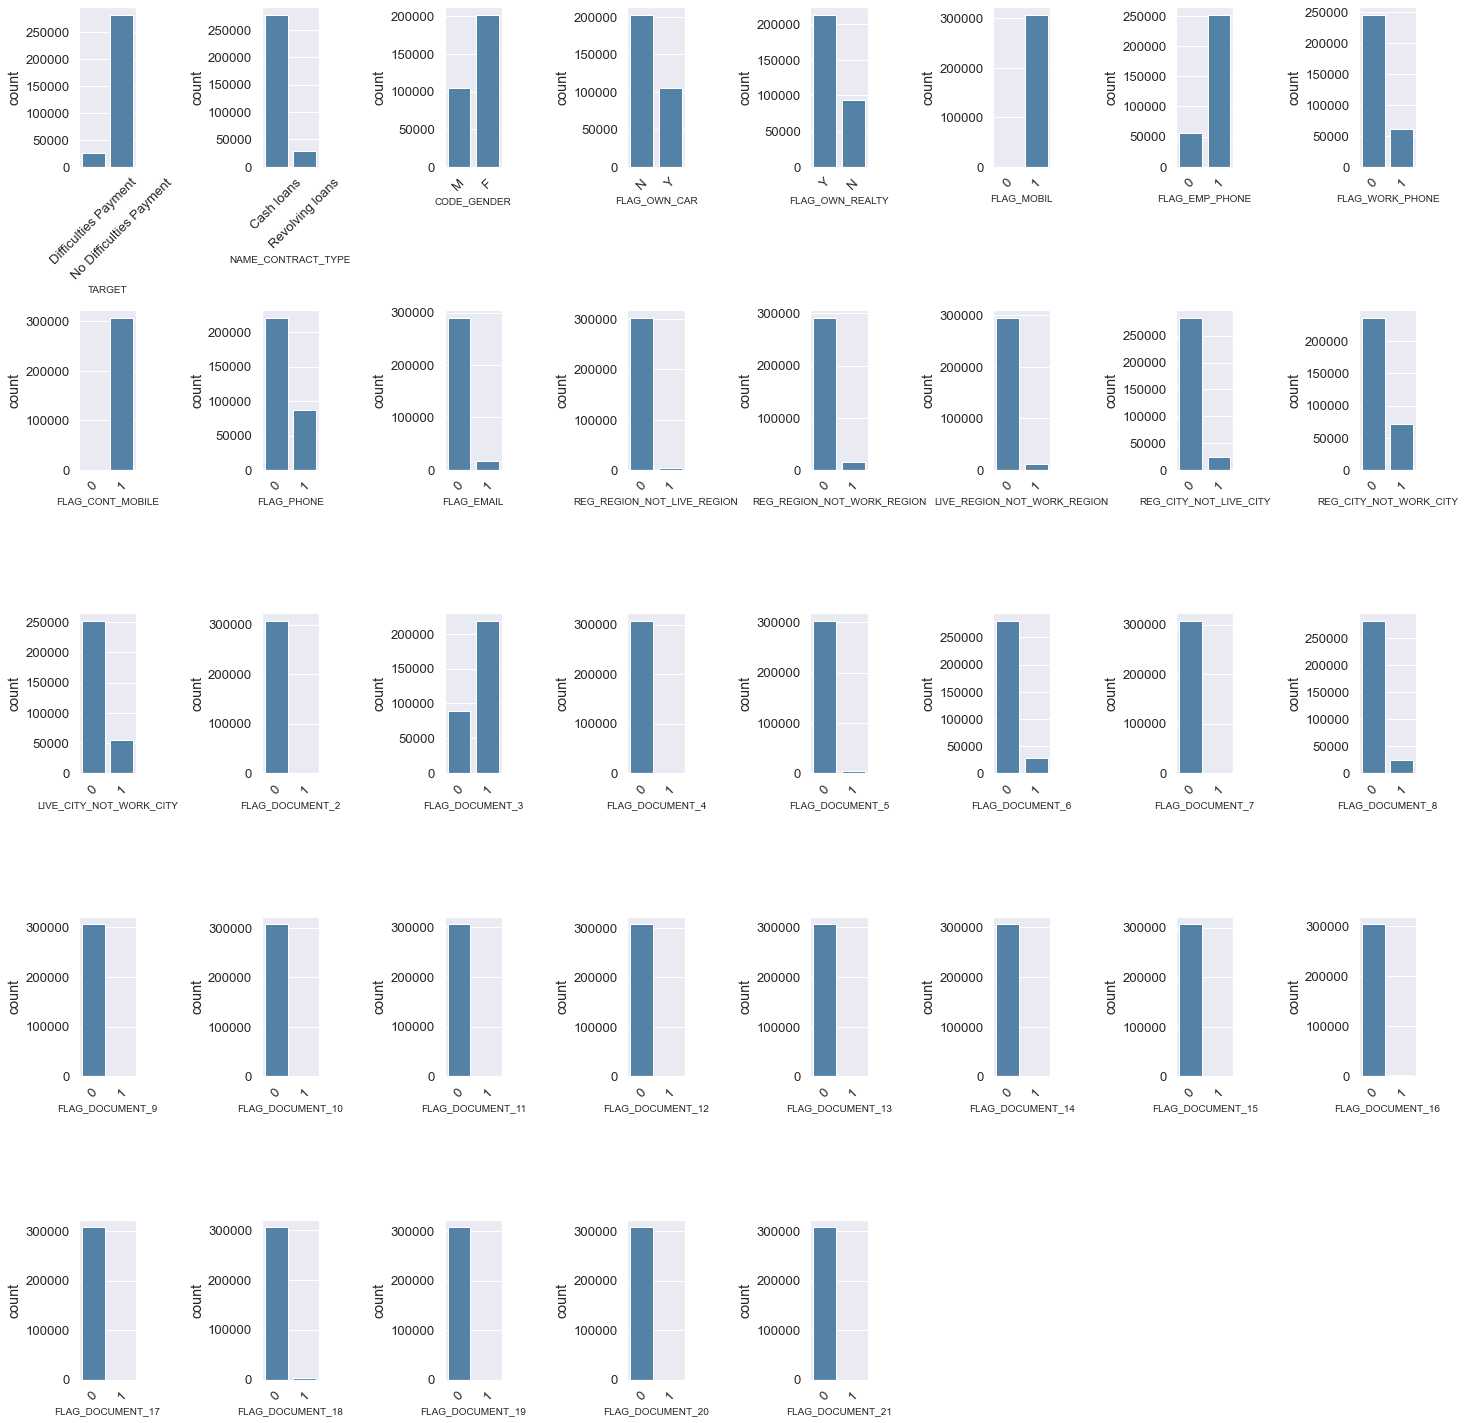

In [50]:
# features = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER']
features = list1

for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (20, 20)
    sns.set(font_scale=1.2)
    plt.subplot(5,8,i+1)
    sns.countplot(x=categoric[features[i]], color='Steelblue')
    plt.xlabel(features[i], fontsize=10)
    plt.xticks(rotation = 45)
    plt.tight_layout()

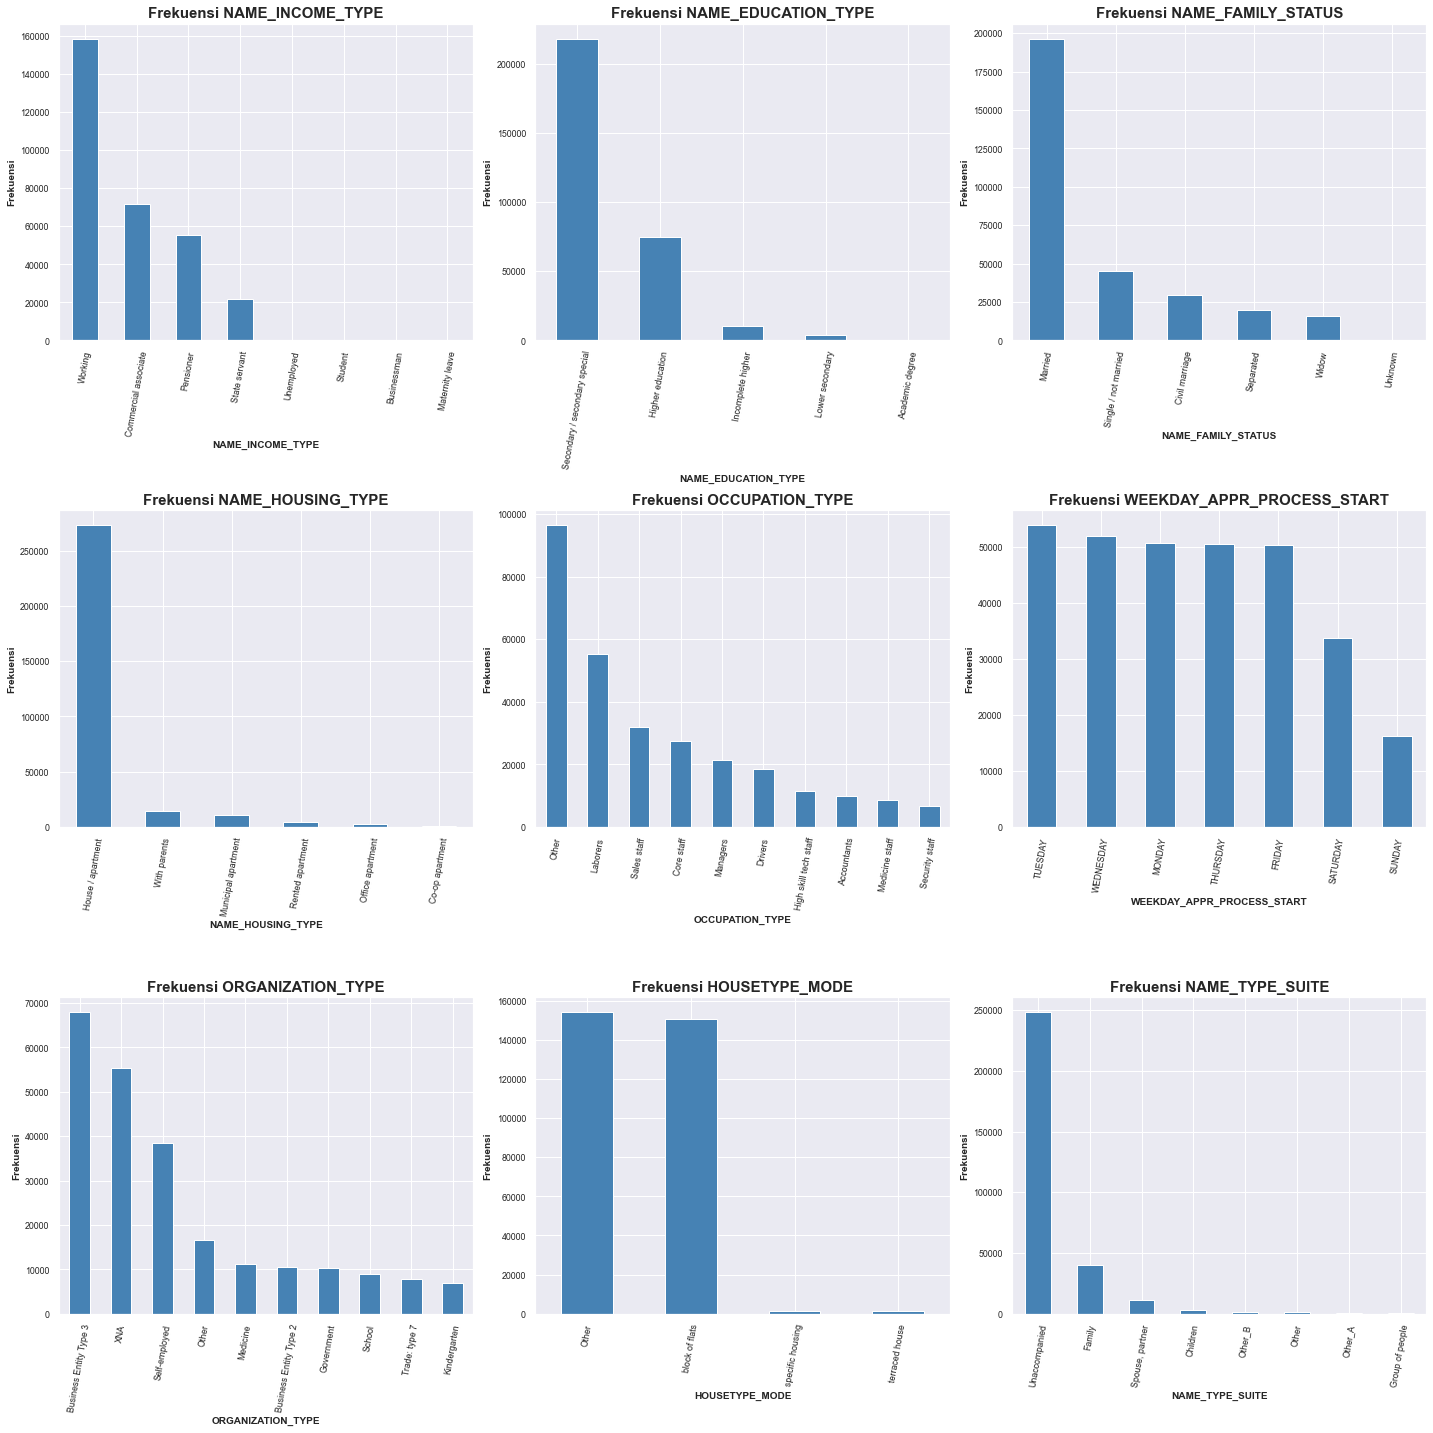

In [51]:
features =  ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',\
         'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','HOUSETYPE_MODE','NAME_TYPE_SUITE']

for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (20, 20)
    sns.set(font_scale=0.8)
    plt.subplot(3,3,i+1)
    value_counts = categoric[features[i]].value_counts().head(10)
    value_counts.plot(kind='bar', color='Steelblue')
    plt.title("Frekuensi "+features[i], fontsize=15, weight='bold')
    plt.xlabel(features[i], fontsize=10, weight='bold')
    plt.ylabel('Frekuensi', fontsize=10, weight='bold')
    plt.xticks(rotation = 80)
    plt.tight_layout()

Karena beberapa fitur/variabel/kolom memiliki kardinalitas cukup tinggi yaitu di atas 5 maka akan disederhanakan menjadi 5 kelompok seperti 
- NAME_TYPE_SUITE
- NAME_INCOME_TYPE
- OCCUPATION_TYPE
- ORGANIZATION_TYPE

In [52]:
df_new['NAME_TYPE_SUITE'] = np.where(df_new['NAME_TYPE_SUITE']=='Unaccompanied','Unaccompanied',
                                    np.where(df_new['NAME_TYPE_SUITE']=='Family','Family',
                                             np.where(df_new['NAME_TYPE_SUITE']=='Spouse, partner','Spouse, partner',
                                                      np.where(df_new['NAME_TYPE_SUITE']=='Children','Children','Other Group'))))

df_new['NAME_INCOME_TYPE'] = np.where(df_new['NAME_INCOME_TYPE']=='Working','Working',
                                    np.where(df_new['NAME_INCOME_TYPE']=='Commercial associate','Commercial associate',
                                             np.where(df_new['NAME_INCOME_TYPE']=='Pensioner','Pensioner',
                                                      np.where(df_new['NAME_INCOME_TYPE']=='State servant','State servant','Other Group'))))

df_new['OCCUPATION_TYPE'] = np.where(df_new['OCCUPATION_TYPE']=='Other','Other Group 1',
                                    np.where(df_new['OCCUPATION_TYPE']=='Laborers','Laborers',
                                             np.where(df_new['OCCUPATION_TYPE']=='Sales staff','Sales staff',
                                                      np.where(df_new['OCCUPATION_TYPE']=='Core staff','Core staff','Other Group 2'))))

df_new['ORGANIZATION_TYPE'] = np.where(df_new['ORGANIZATION_TYPE']=='Business Entity Type 3','Business Entity Type 3',
                                    np.where(df_new['ORGANIZATION_TYPE']=='XNA','XNA',
                                             np.where(df_new['ORGANIZATION_TYPE']=='Self-employed','Self-employed',
                                                      np.where(df_new['ORGANIZATION_TYPE']=='Other','Other Group 2','Other Group 1'))))

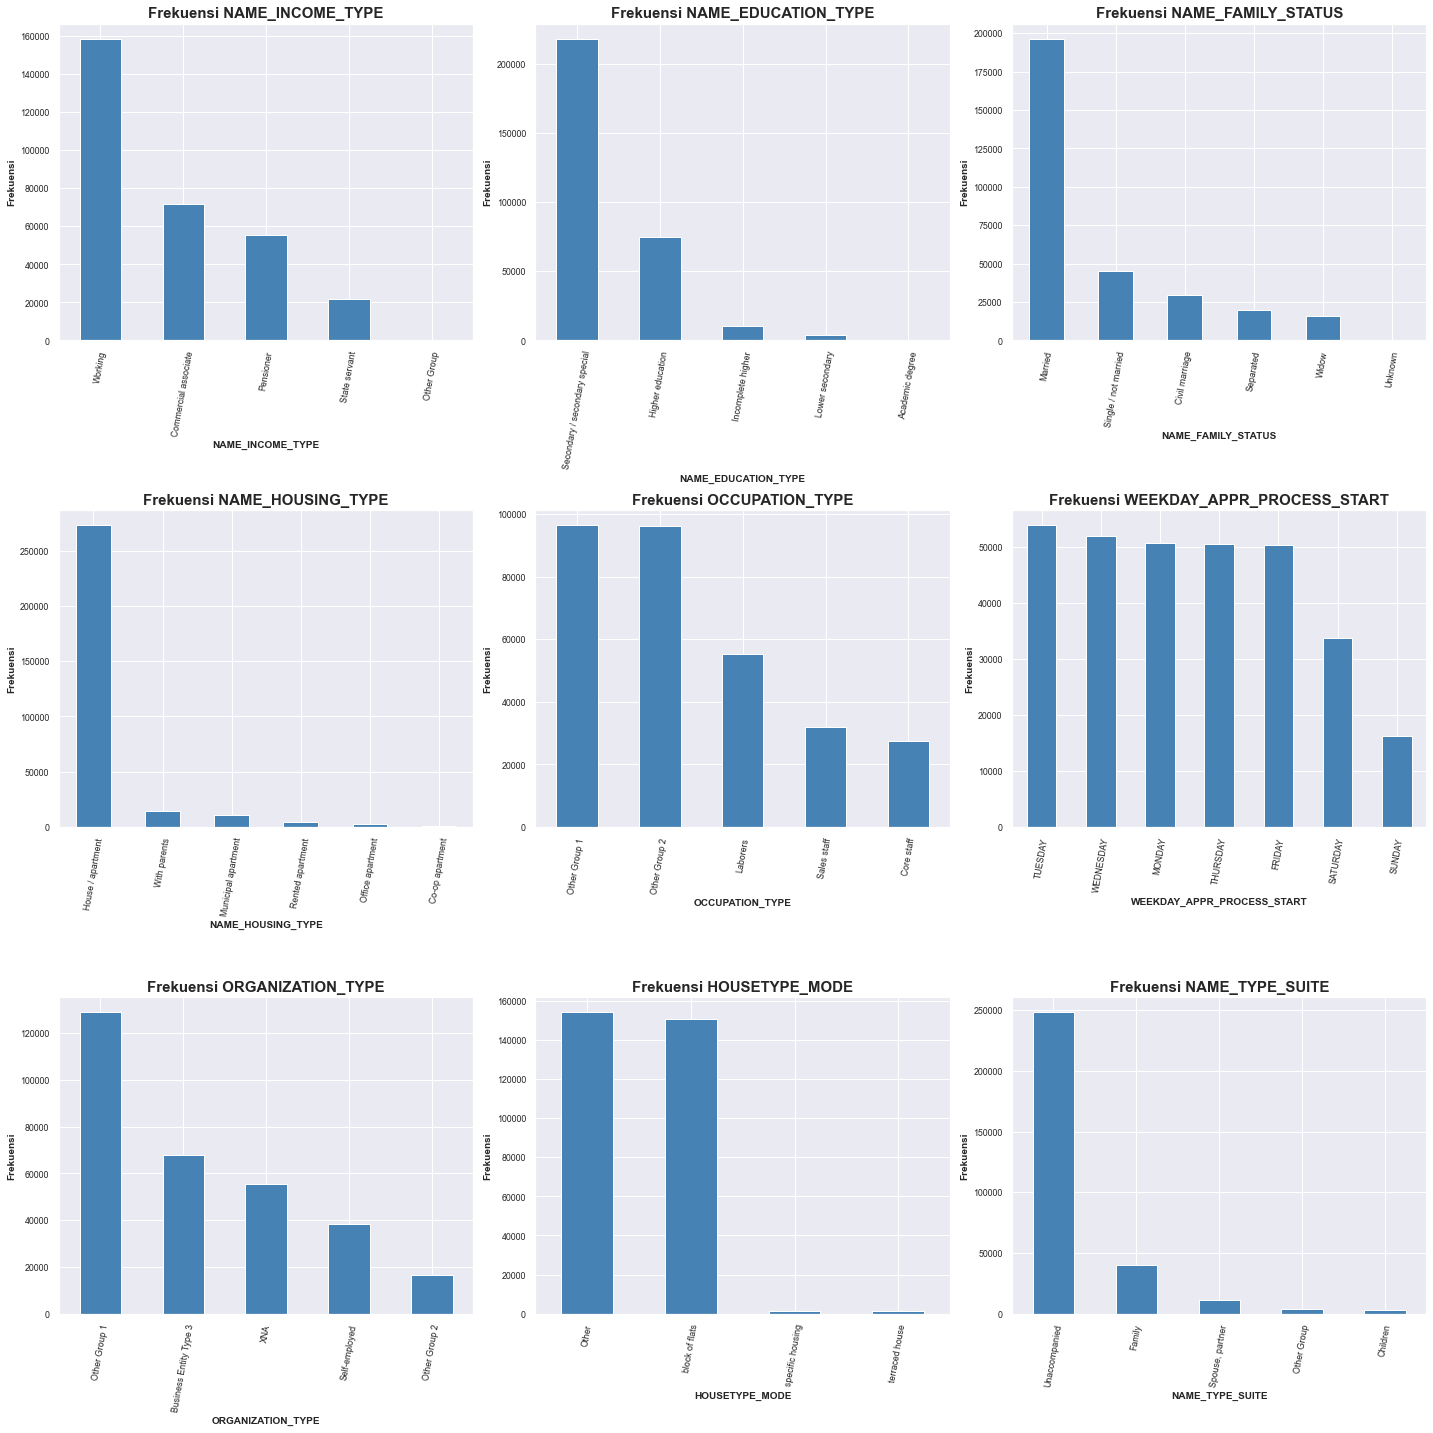

In [53]:
features =  ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',\
         'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','HOUSETYPE_MODE','NAME_TYPE_SUITE']

for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (20, 20)
    sns.set(font_scale=0.8)
    plt.subplot(3,3,i+1)
    value_counts = df_new[features[i]].value_counts().head(10)
    value_counts.plot(kind='bar', color='Steelblue')
    plt.title("Frekuensi "+features[i], fontsize=15, weight='bold')
    plt.xlabel(features[i], fontsize=10, weight='bold')
    plt.ylabel('Frekuensi', fontsize=10, weight='bold')
    plt.xticks(rotation = 80)
    plt.tight_layout()

### Bivariate Analysis

In [54]:
len(categoric.columns)

50

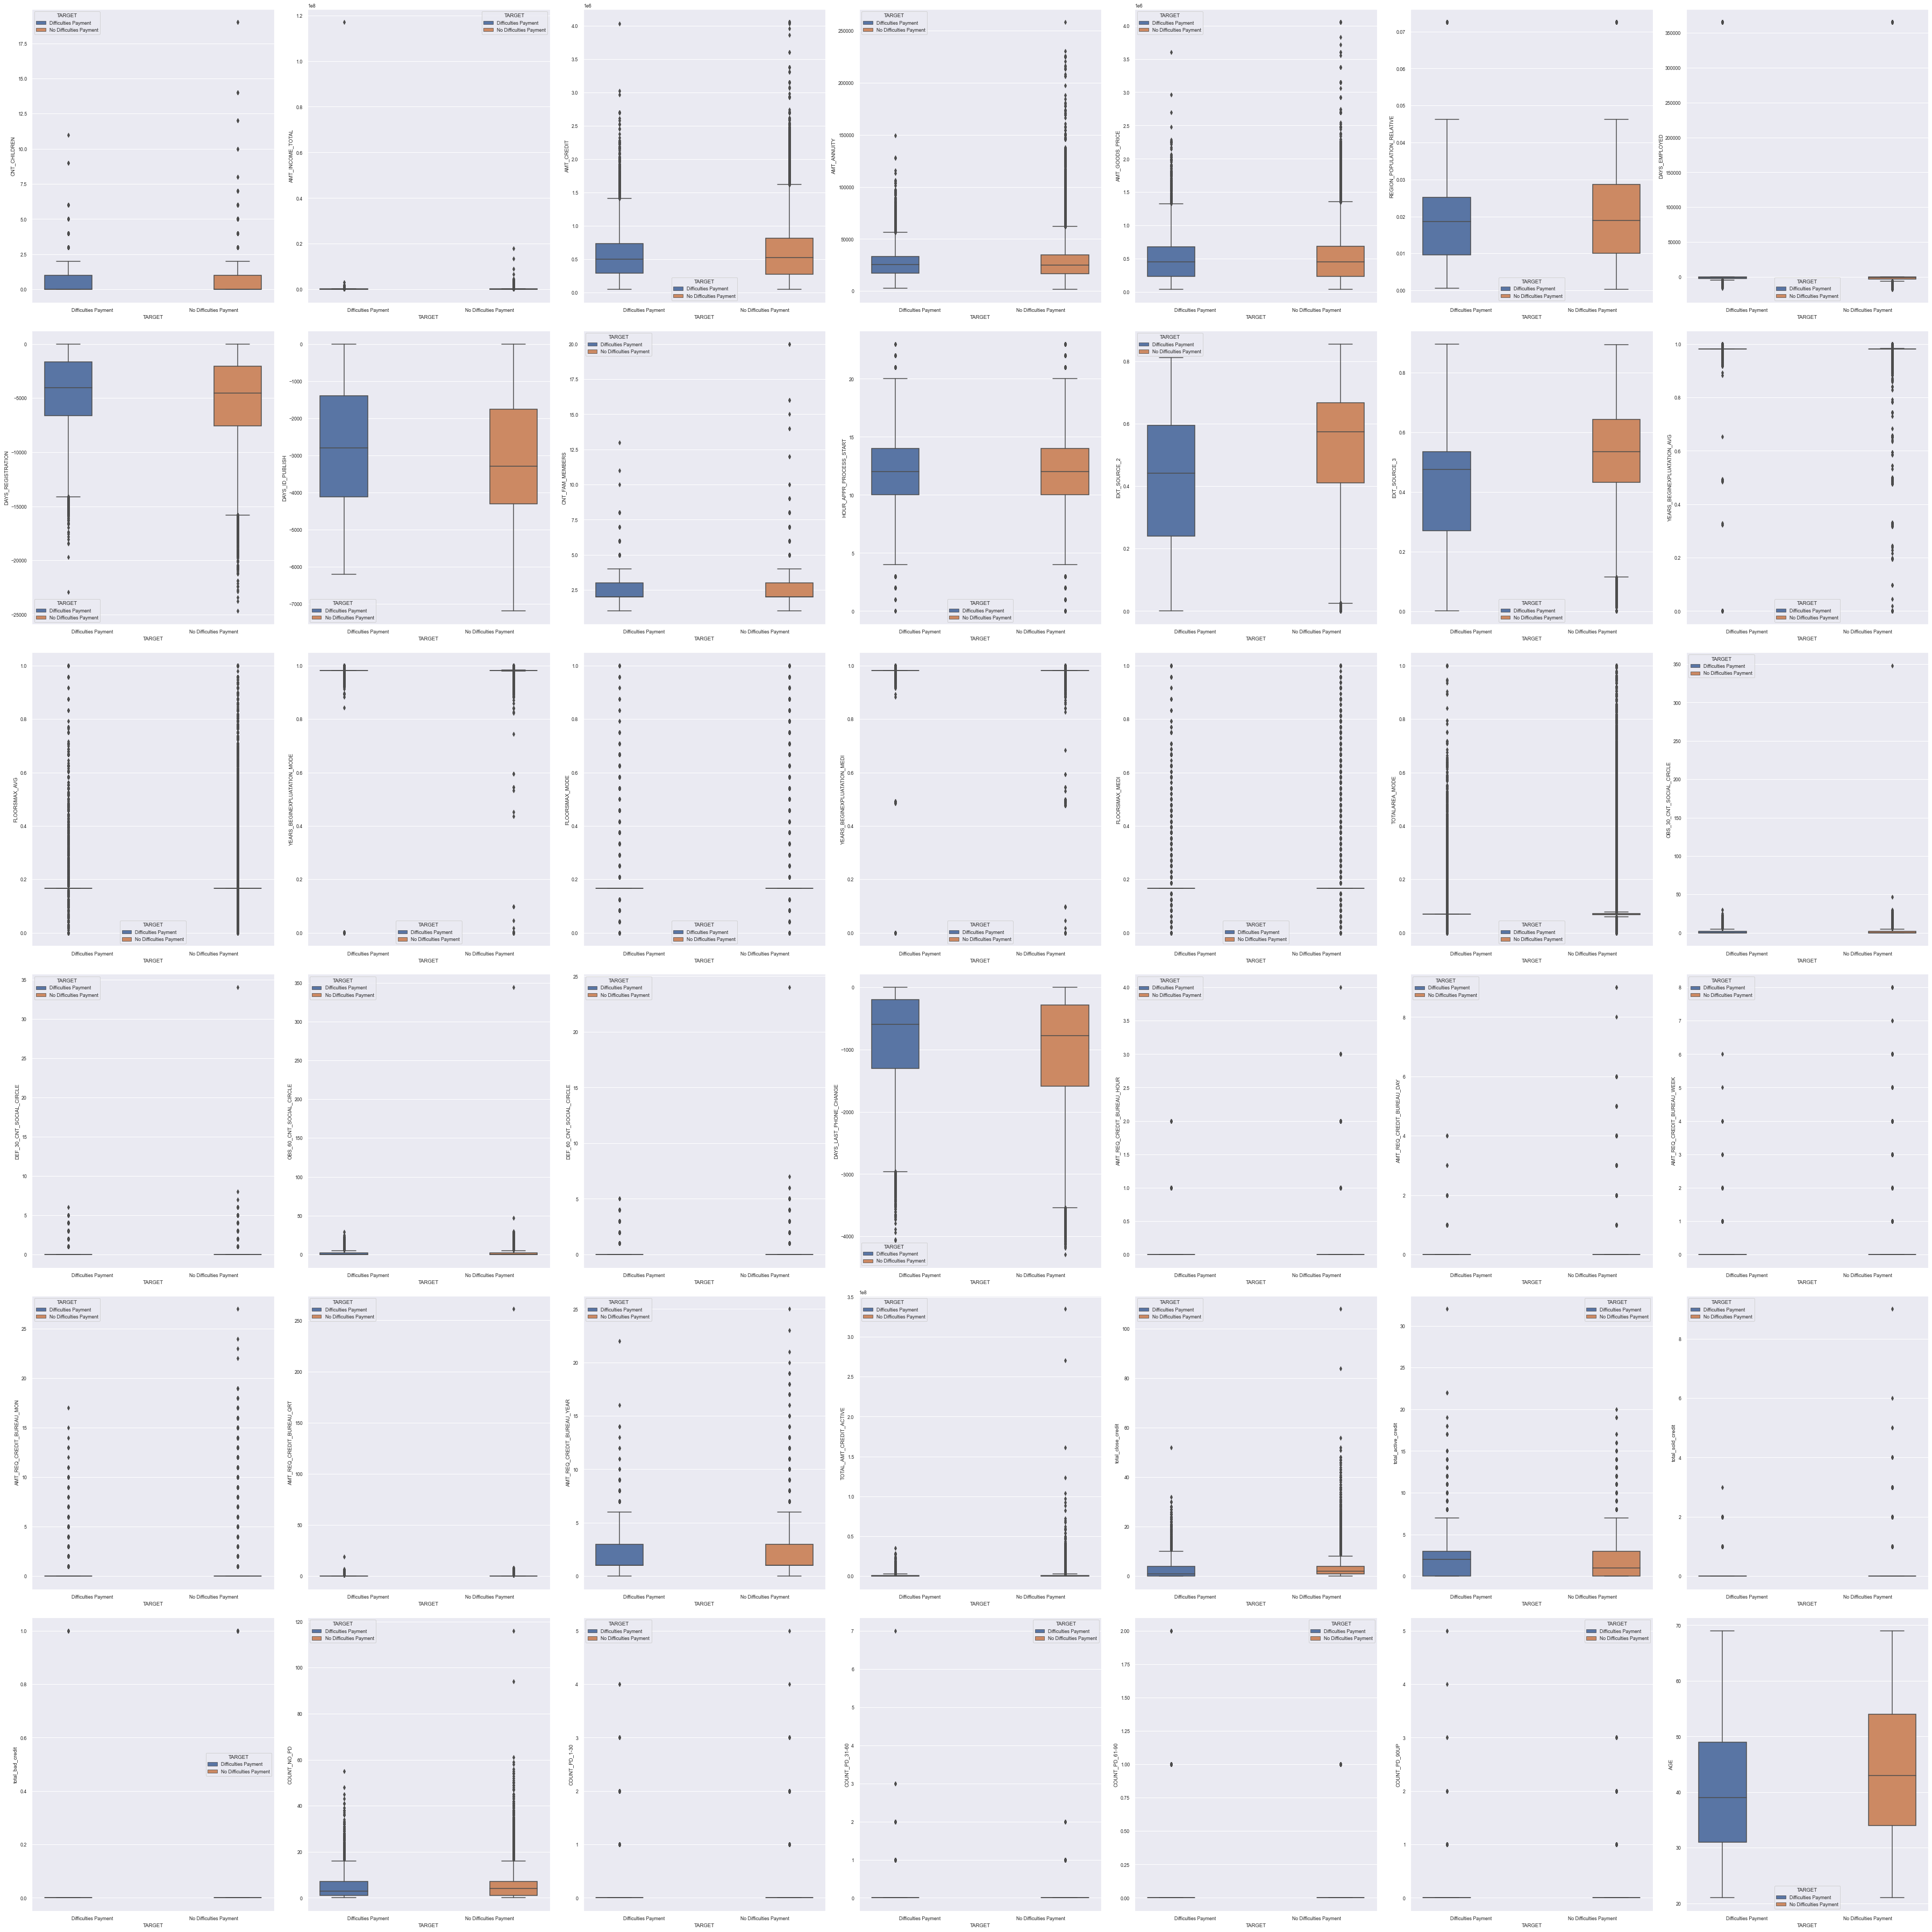

In [55]:
features = numeric.columns
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (50,50)
    plt.subplot(6,7,i+1)
    sns.boxplot(y=features[i], x='TARGET',hue='TARGET', data=df_new)
    plt.tight_layout()    

In [56]:
fitur_cat = categoric.drop(['SK_ID_CURR','TARGET'], axis=1)
fitur_cat = fitur_cat.columns.tolist()

In [57]:
kolom1 =[]
kolom2 = []
kolom3 = []
fitur = fitur_cat
for i in range(0, len(fitur)):
    a = df_new[fitur[i]].nunique()
    if a <= 2:
        b = fitur[i]
        kolom1.append(b)
    elif a ==3:
        c = fitur[i]
        kolom2.append(c)
    else:
        d = fitur[i]
        kolom3.append(d)
print('2 kolom :', kolom1)
print(len(kolom1))
print()
print('3 kolom :', kolom2)
print(len(kolom2))
print('>3 kolom :', kolom3)
print(len(kolom3))

2 kolom : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
36

3 kolom : ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EMERGENCYSTATE_MODE']
3
>3 kolom : ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_STA

In [58]:
def stackedbar1(variable):
    fitur = variable
    categoric['TARGET_NEW'] = np.where(categoric['TARGET']=='No Difficulties Payment', 0, 1)
    fig = plt.figure(figsize=(75,20))
    for i, j in enumerate(fitur, start=1):
        sns.set(font_scale=2.5)
        ax=plt.subplot(1,5,i)
        pd.crosstab(categoric[j], categoric['TARGET_NEW']).sort_values(by= 1, ascending=False).plot.bar(stacked=True, ax=ax)
        plt.xticks(rotation=0)
        plt.xlabel(j, fontsize=35, weight='bold')
        plt.ylabel('Frekuensi', fontsize=35, weight='bold')

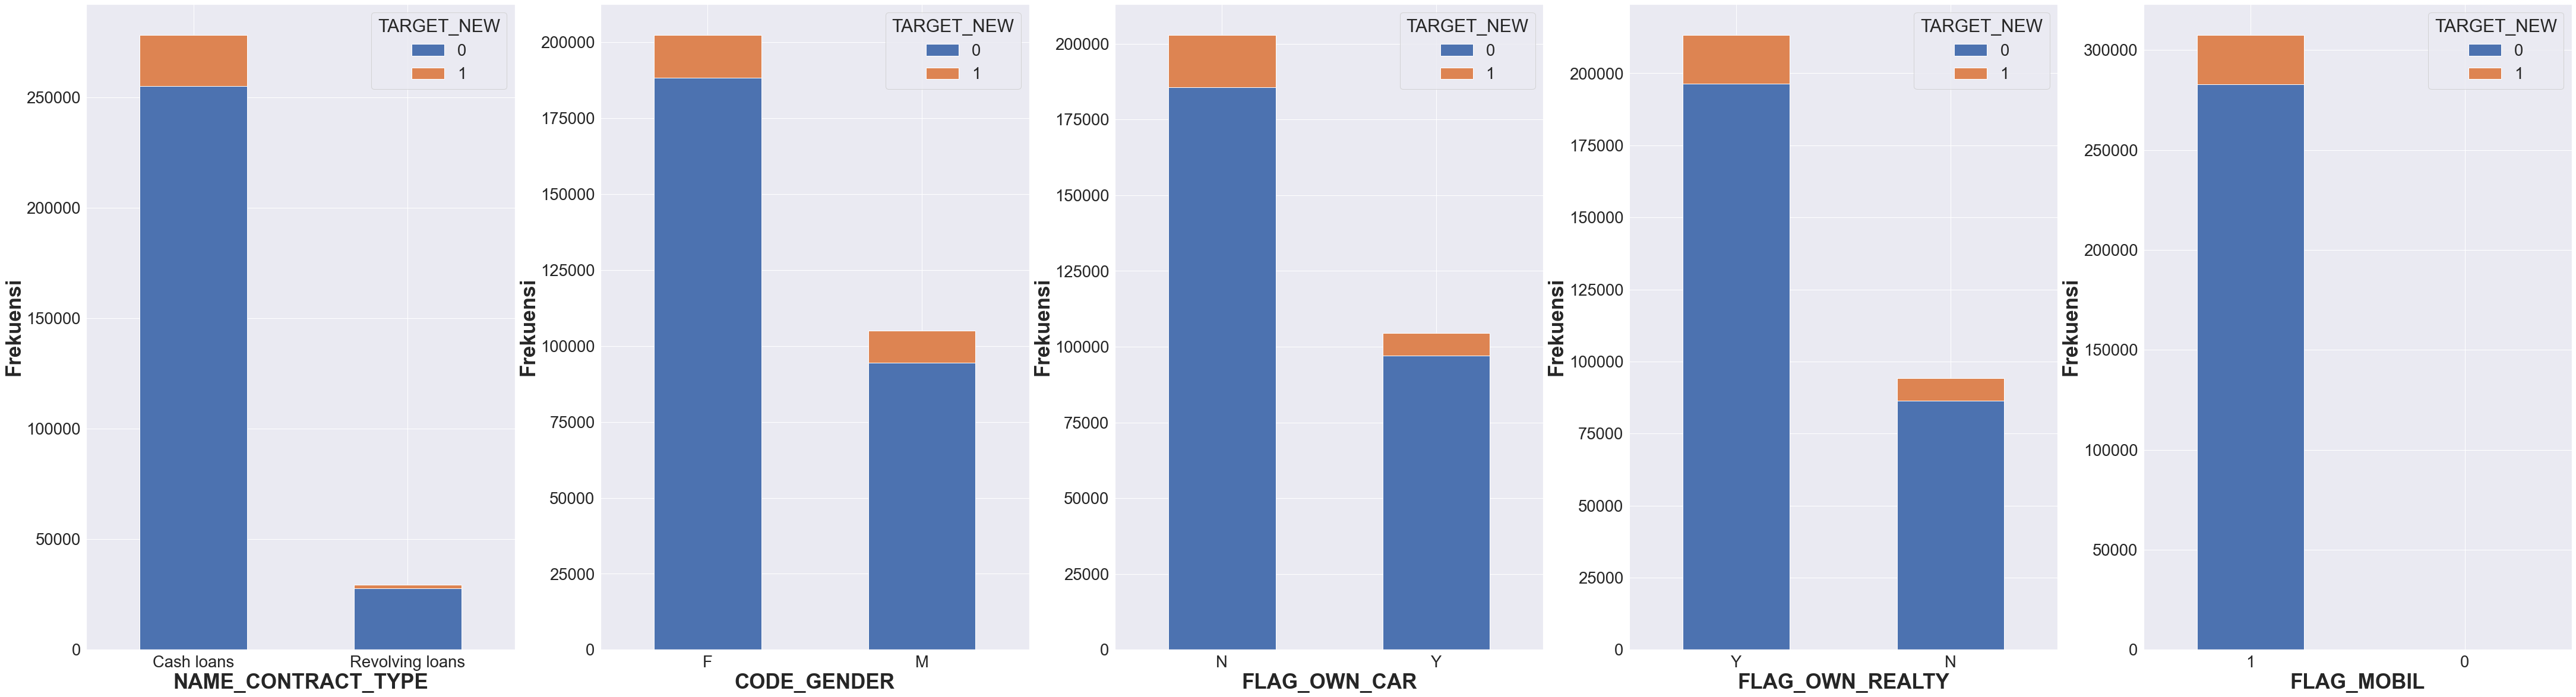

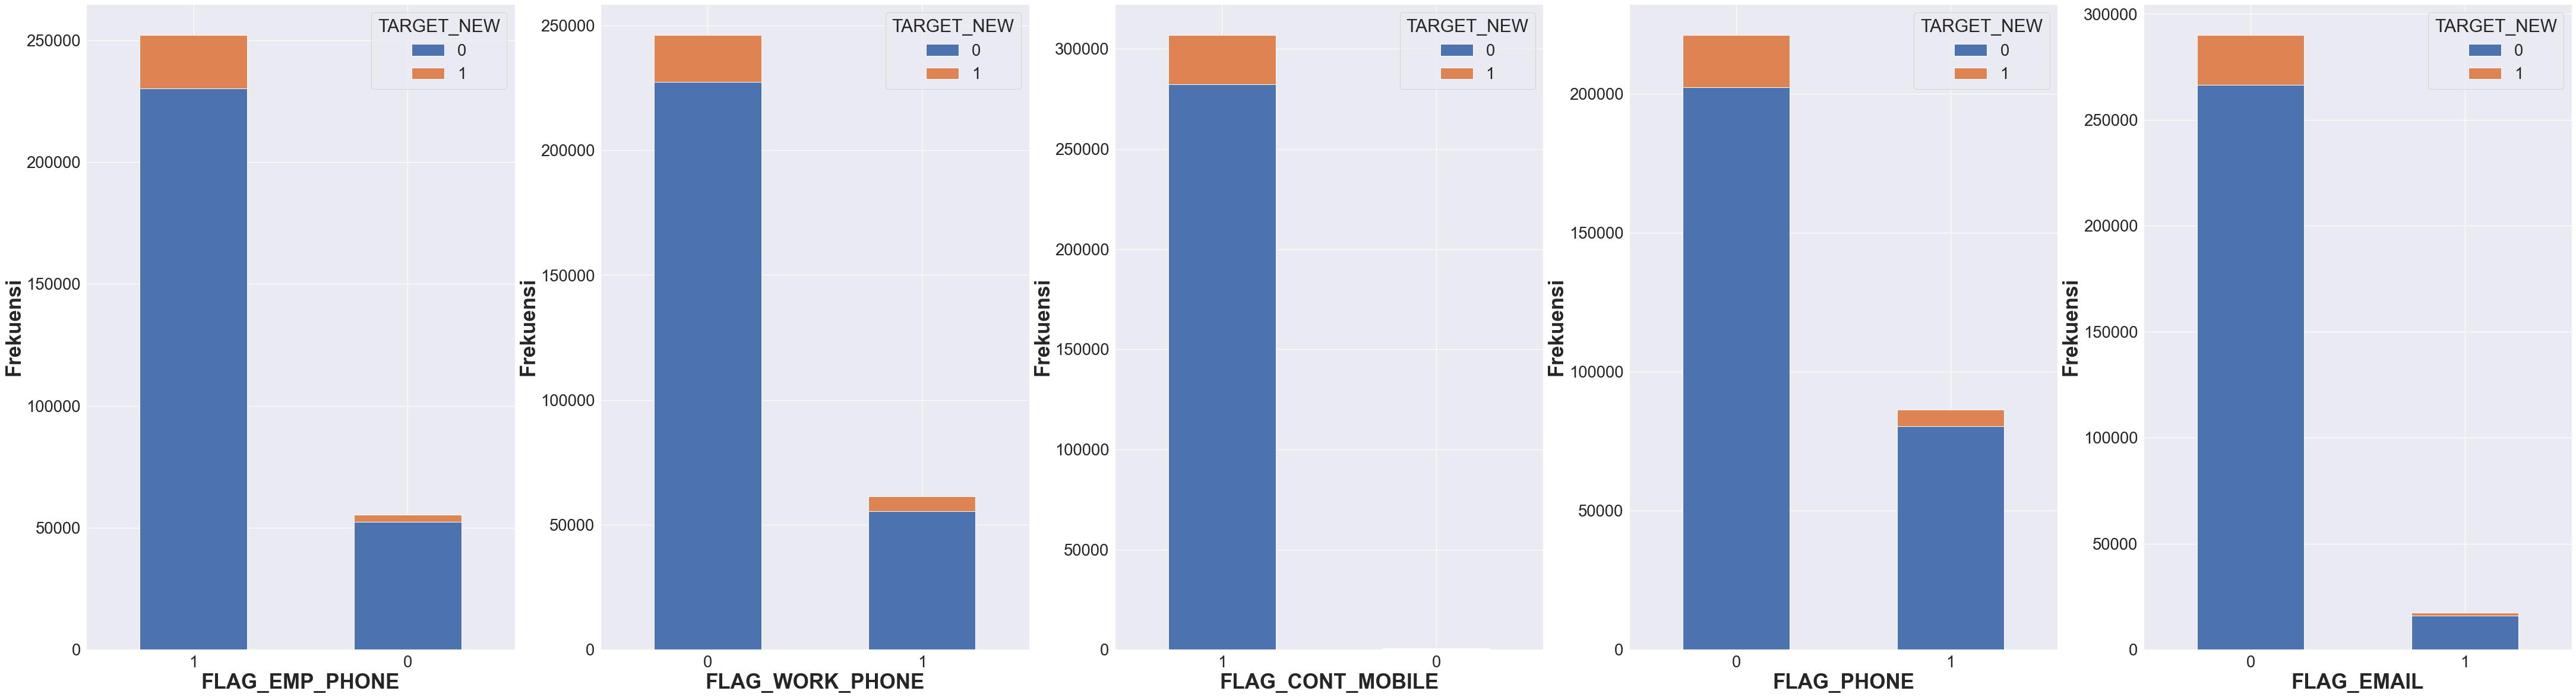

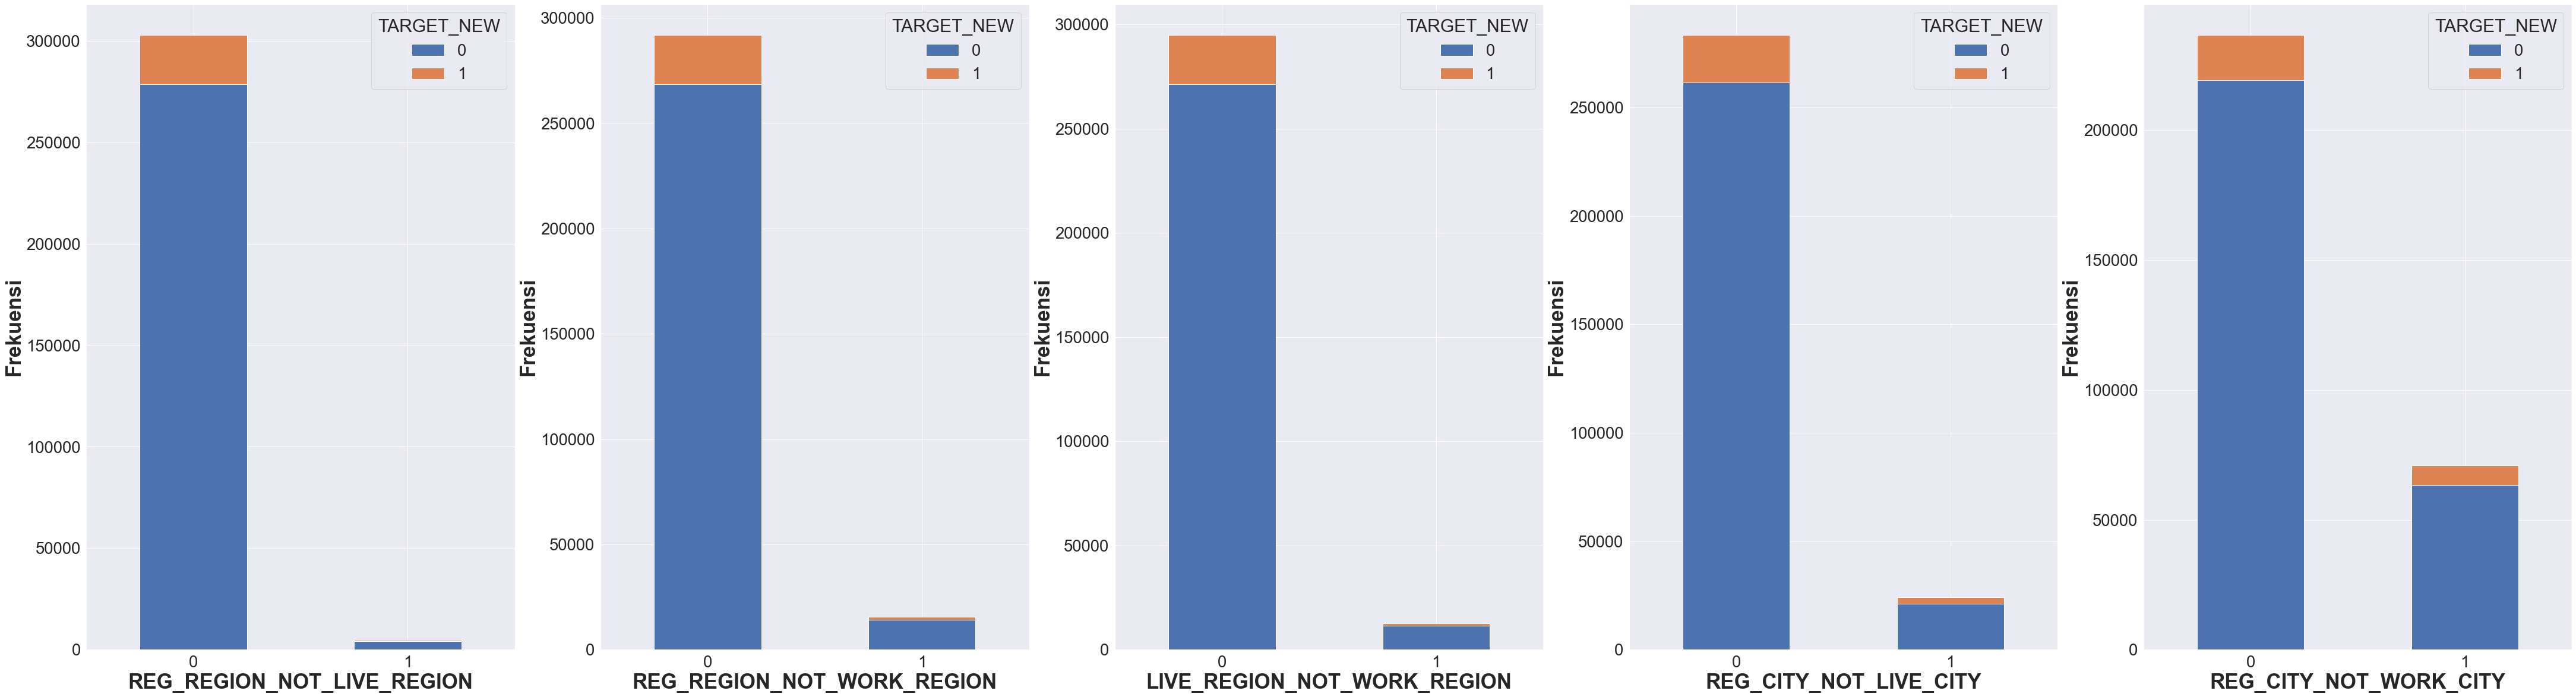

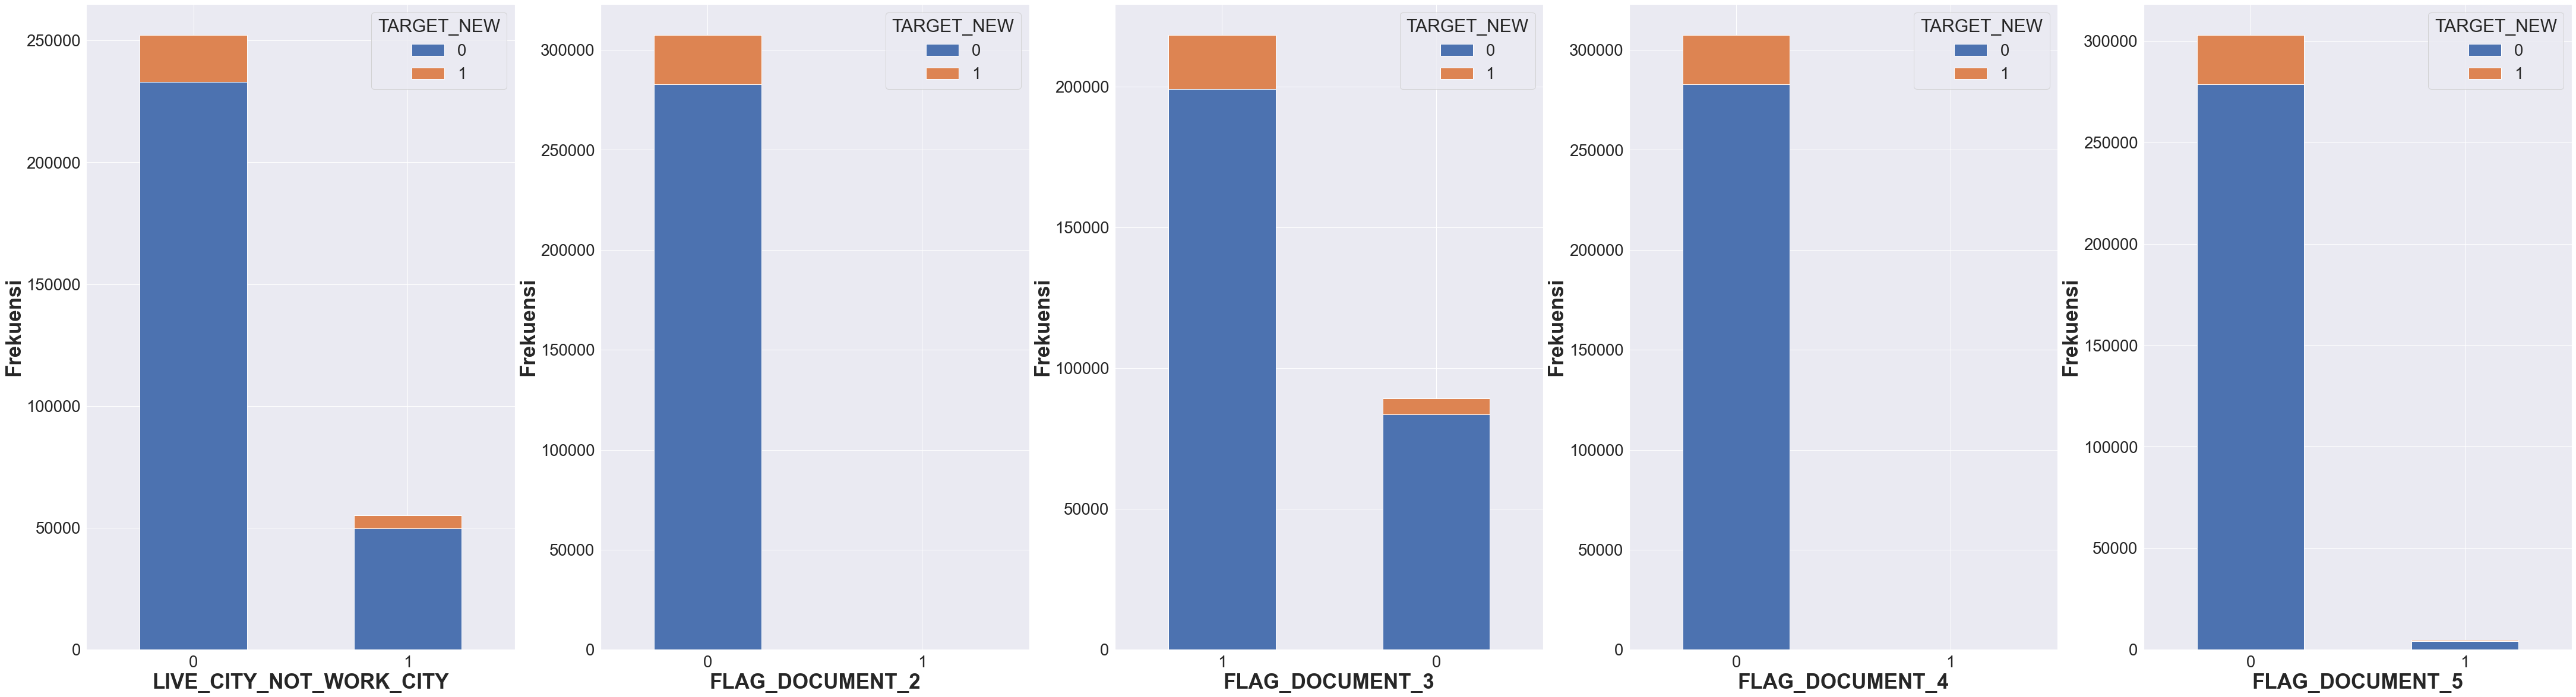

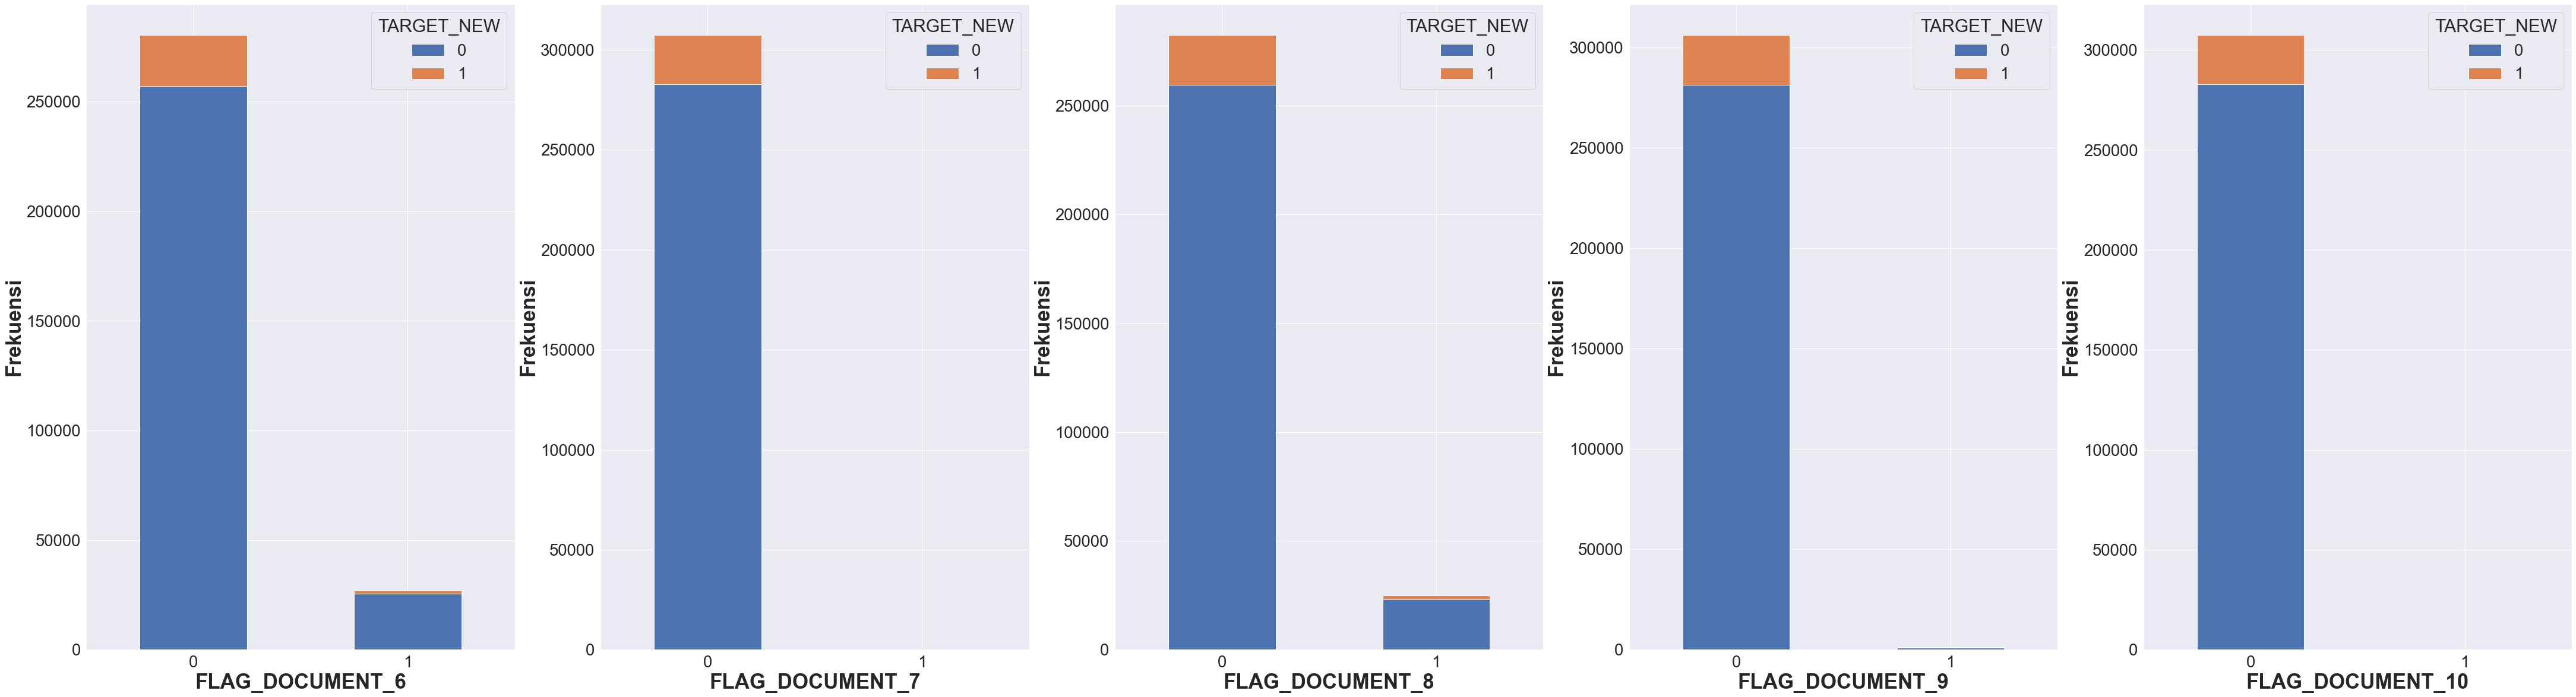

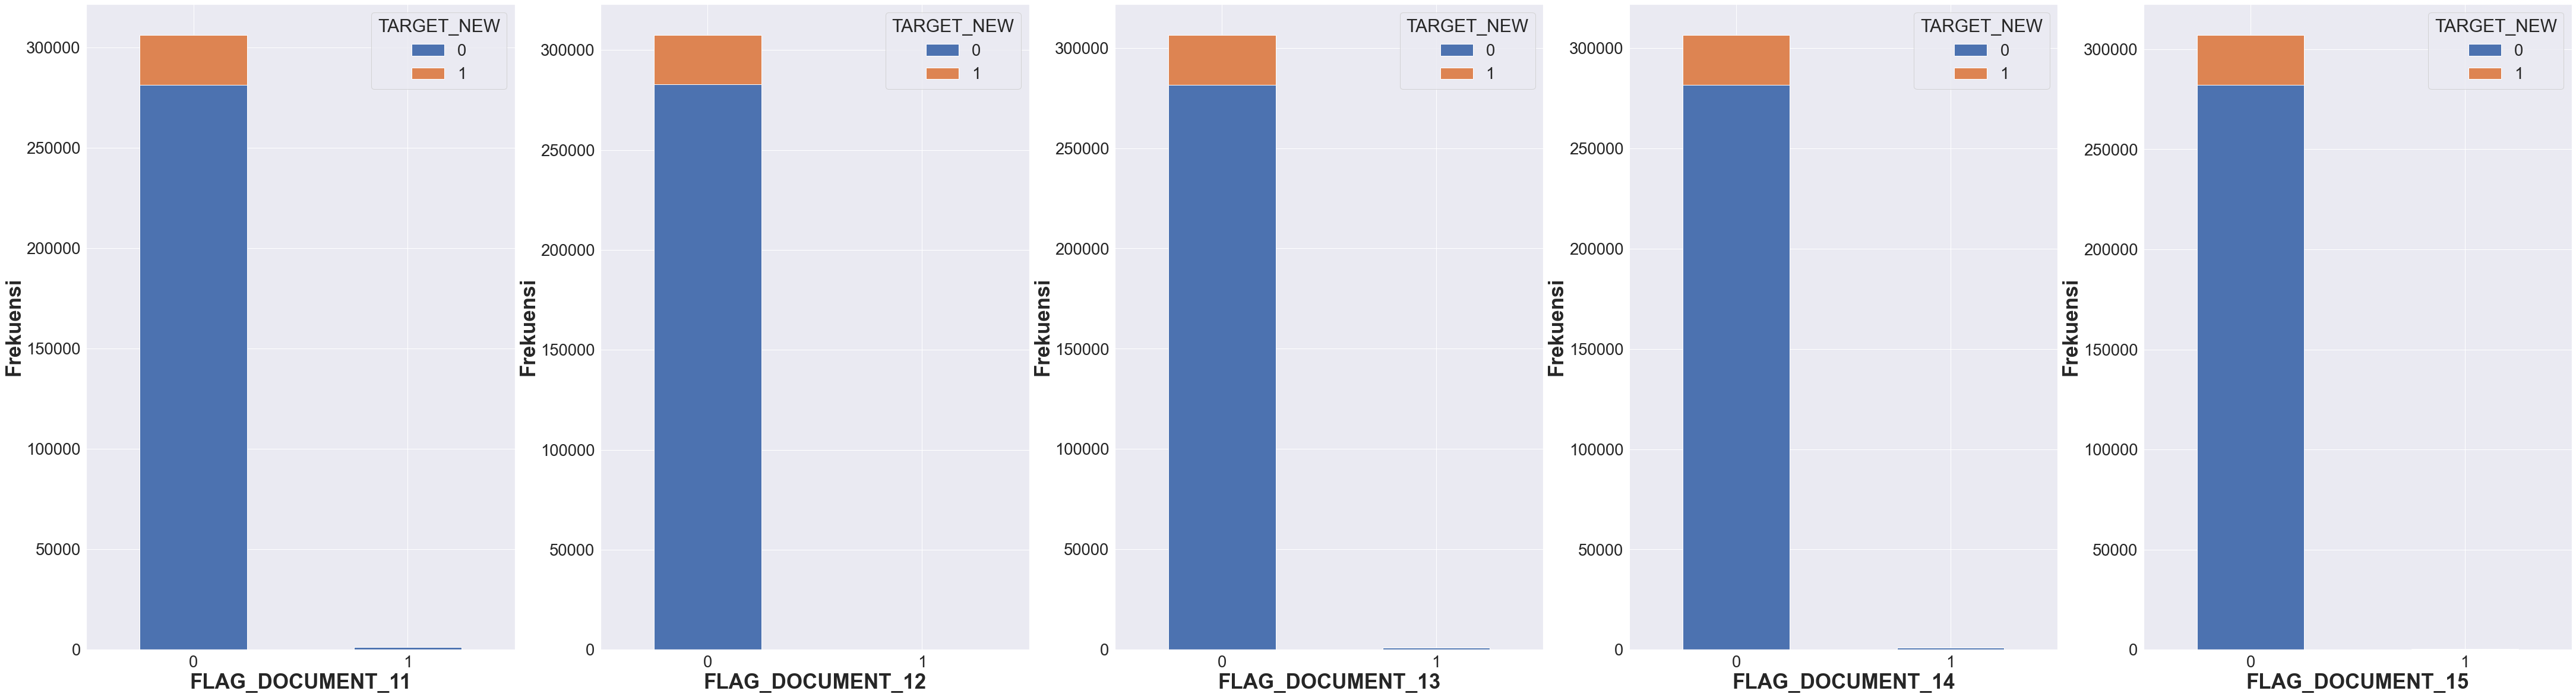

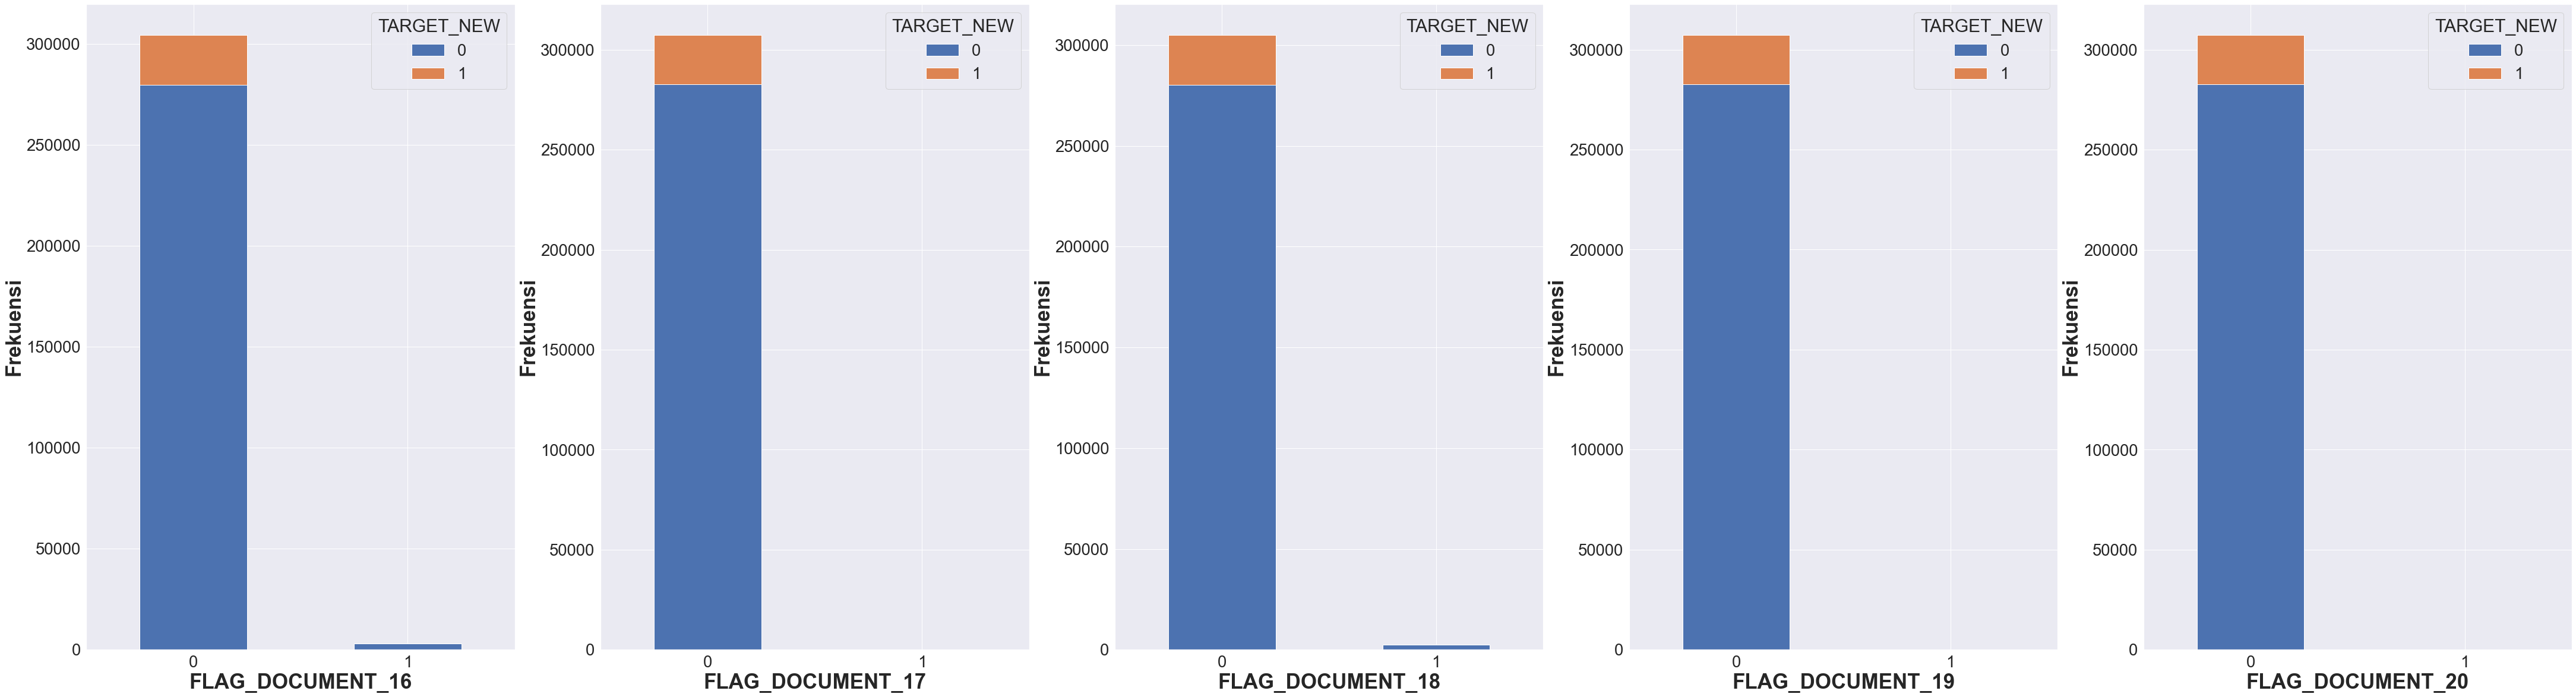

In [59]:
range_var = np.arange(0,40,5).tolist()

for i in range(1, len(range_var)):
    a = range_var[i-1]
    b = range_var[i]
    stackedbar1(kolom1[a:b])

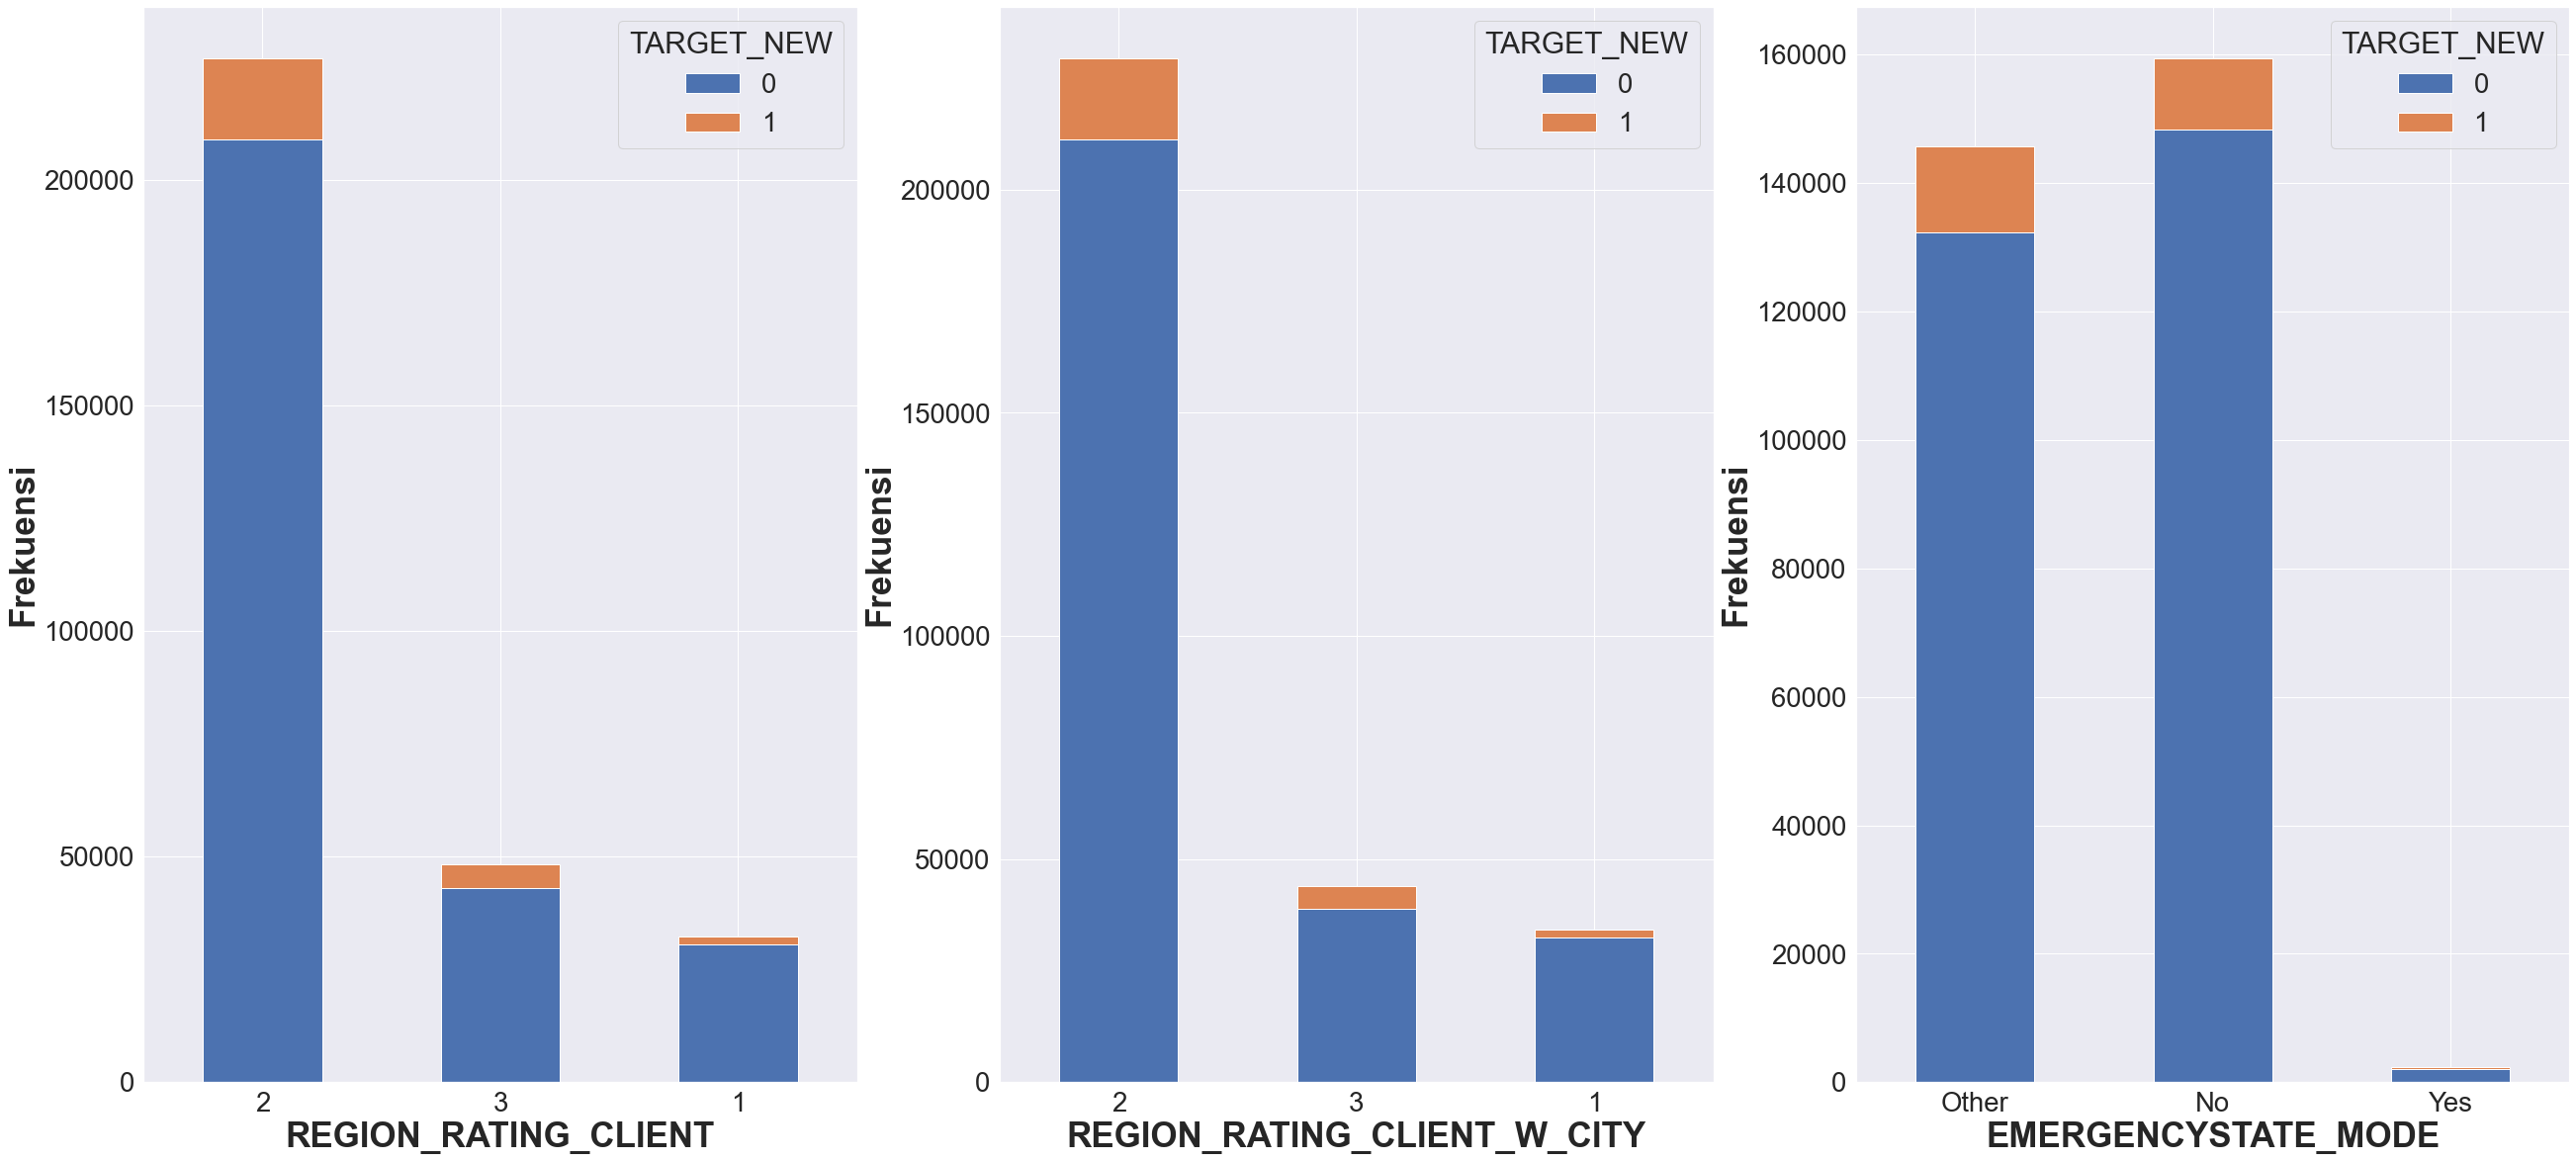

In [60]:
stackedbar1(kolom2[0:4])

In [61]:
def stackedbar2(variable):
    fitur = variable
    categoric['TARGET_NEW'] = np.where(categoric['TARGET']=='No Difficulties Payment', 0, 1)
    fig = plt.figure(figsize=(60,60))
    for i, j in enumerate(fitur, start=1):
        sns.set(font_scale=2.5)
        ax=plt.subplot(3,3,i)
        pd.crosstab(categoric[j], categoric['TARGET_NEW']).sort_values(by= 1, ascending=False).head(10).plot.bar(stacked=True, ax=ax)
        plt.xticks(rotation=80)
        plt.xlabel(j, fontsize=35, weight='bold')
        plt.ylabel('Frekuensi', fontsize=35, weight='bold')
        plt.legend(title='TARGET')

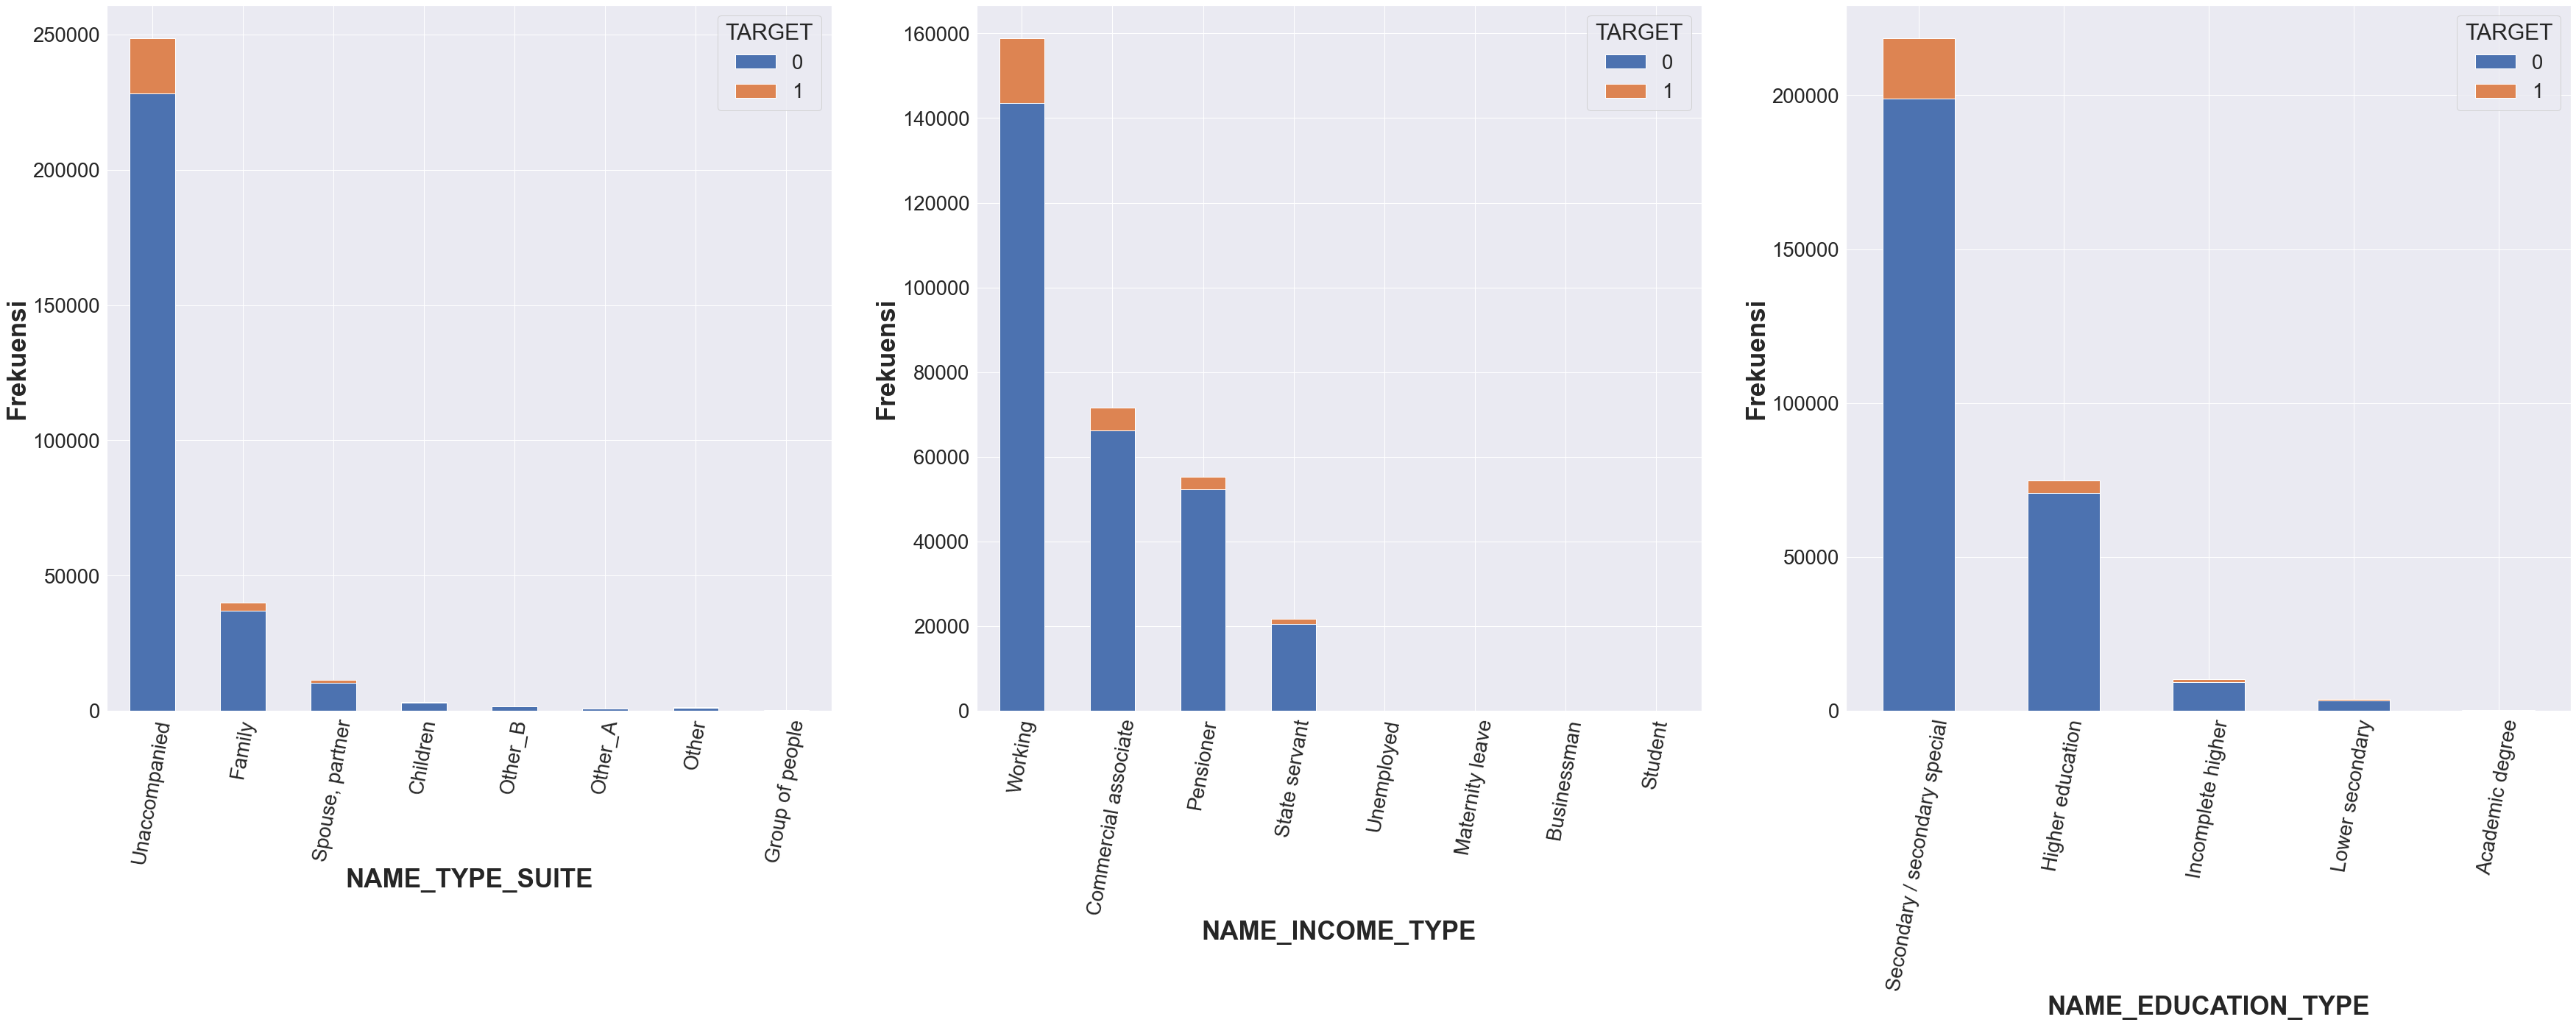

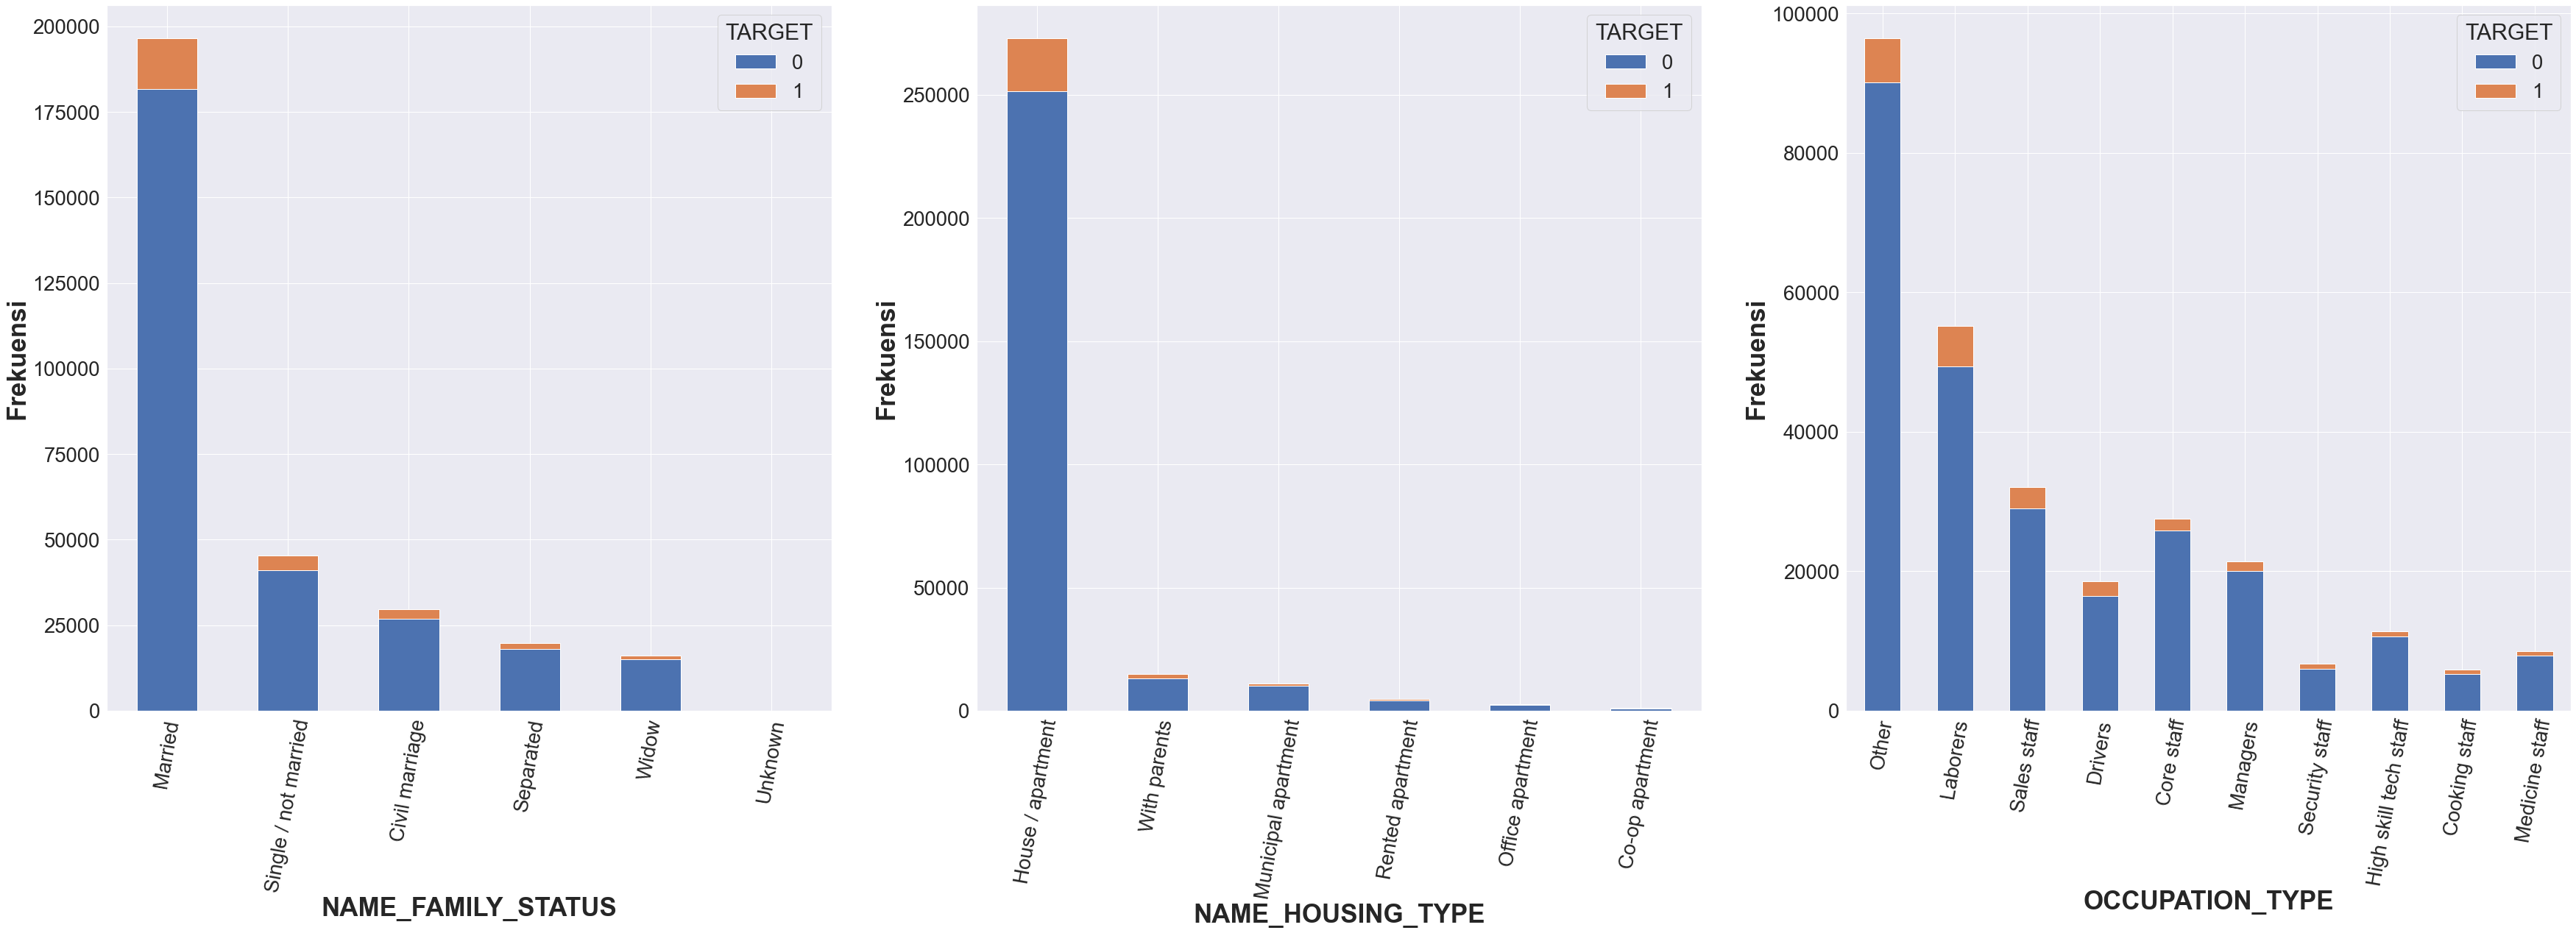

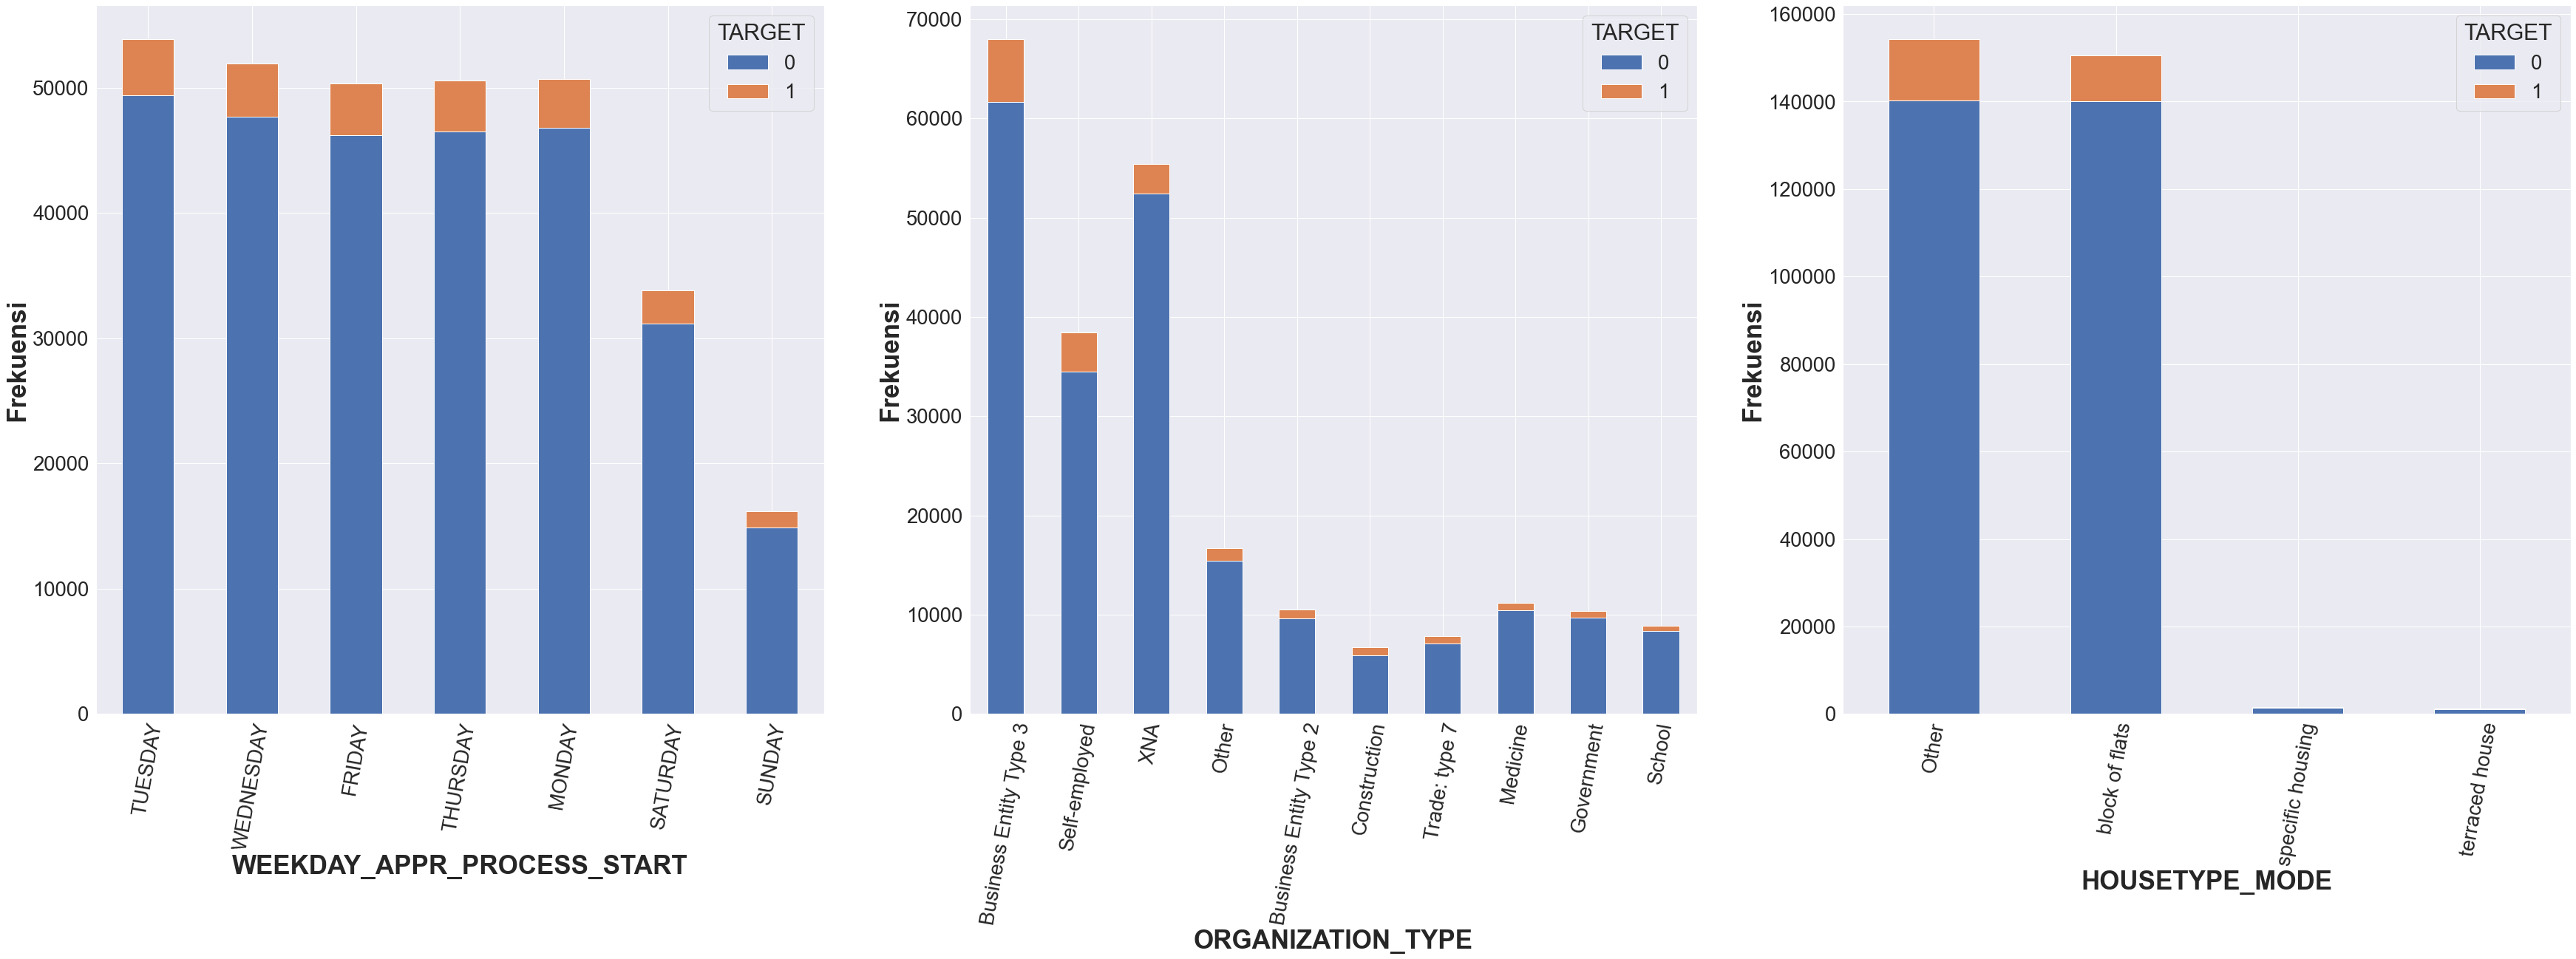

In [62]:
range_var = np.arange(0,12,3).tolist()

for i in range(1, len(range_var)):
    a = range_var[i-1]
    b = range_var[i]
    stackedbar2(kolom3[a:b])

## Top Insight

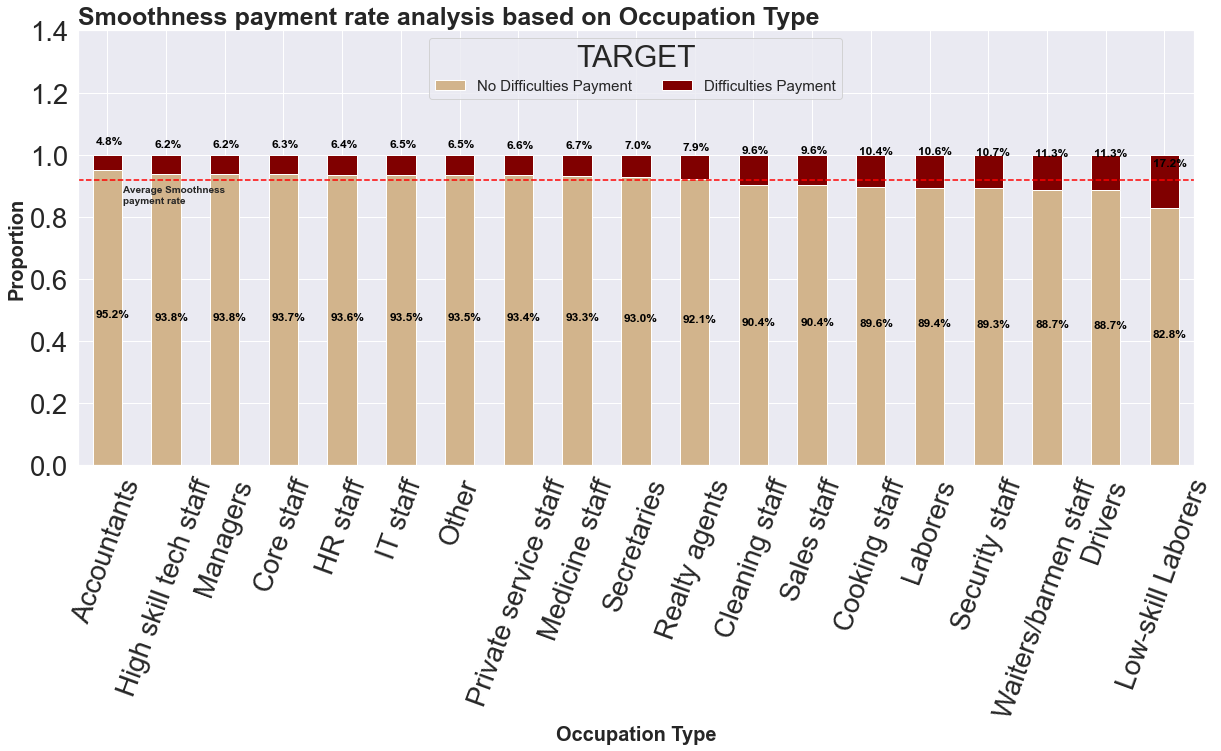

In [63]:
df_rate = categoric[['OCCUPATION_TYPE','TARGET']]
df_rate

cross_tab_prop = pd.crosstab(index=df_rate['OCCUPATION_TYPE'],
                             columns=df_rate['TARGET'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[['No Difficulties Payment','Difficulties Payment']]
cross_tab_prop = cross_tab_prop.sort_values(by='No Difficulties Payment', ascending=False).head(30)
cross_tab_prop
# cross_tab = pd.crosstab(index=df_rate['NAME_EDUCATION_TYPE'],
#                         columns=df_rate['TARGET'])


cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=['Tan','Maroon'],
                    figsize=(20, 8))

plt.legend(loc="upper center",ncol=5,title='TARGET', fontsize = 15)
sns.set(font_scale=1.5)
plt.axhline(y = train['TARGET'].value_counts(True)[0], color ="red", linestyle ="--")
plt.text(x=-0.5,y=1.42,s="Smoothness payment rate analysis based on Occupation Type",fontsize=25,weight='bold')
plt.text(x=0.27,y=cross_tab_prop['No Difficulties Payment'].mean()-0.07,s='Average Smoothness \npayment rate',fontsize=10,weight='bold')
plt.xlabel("Occupation Type",fontsize = 20,weight='bold')
plt.ylabel("Proportion",fontsize = 20,weight='bold')
plt.ylim(0,1.4)
plt.xticks(rotation = 70)
for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.20,
                 y=(y_loc - proportion)*1.06 + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="Black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

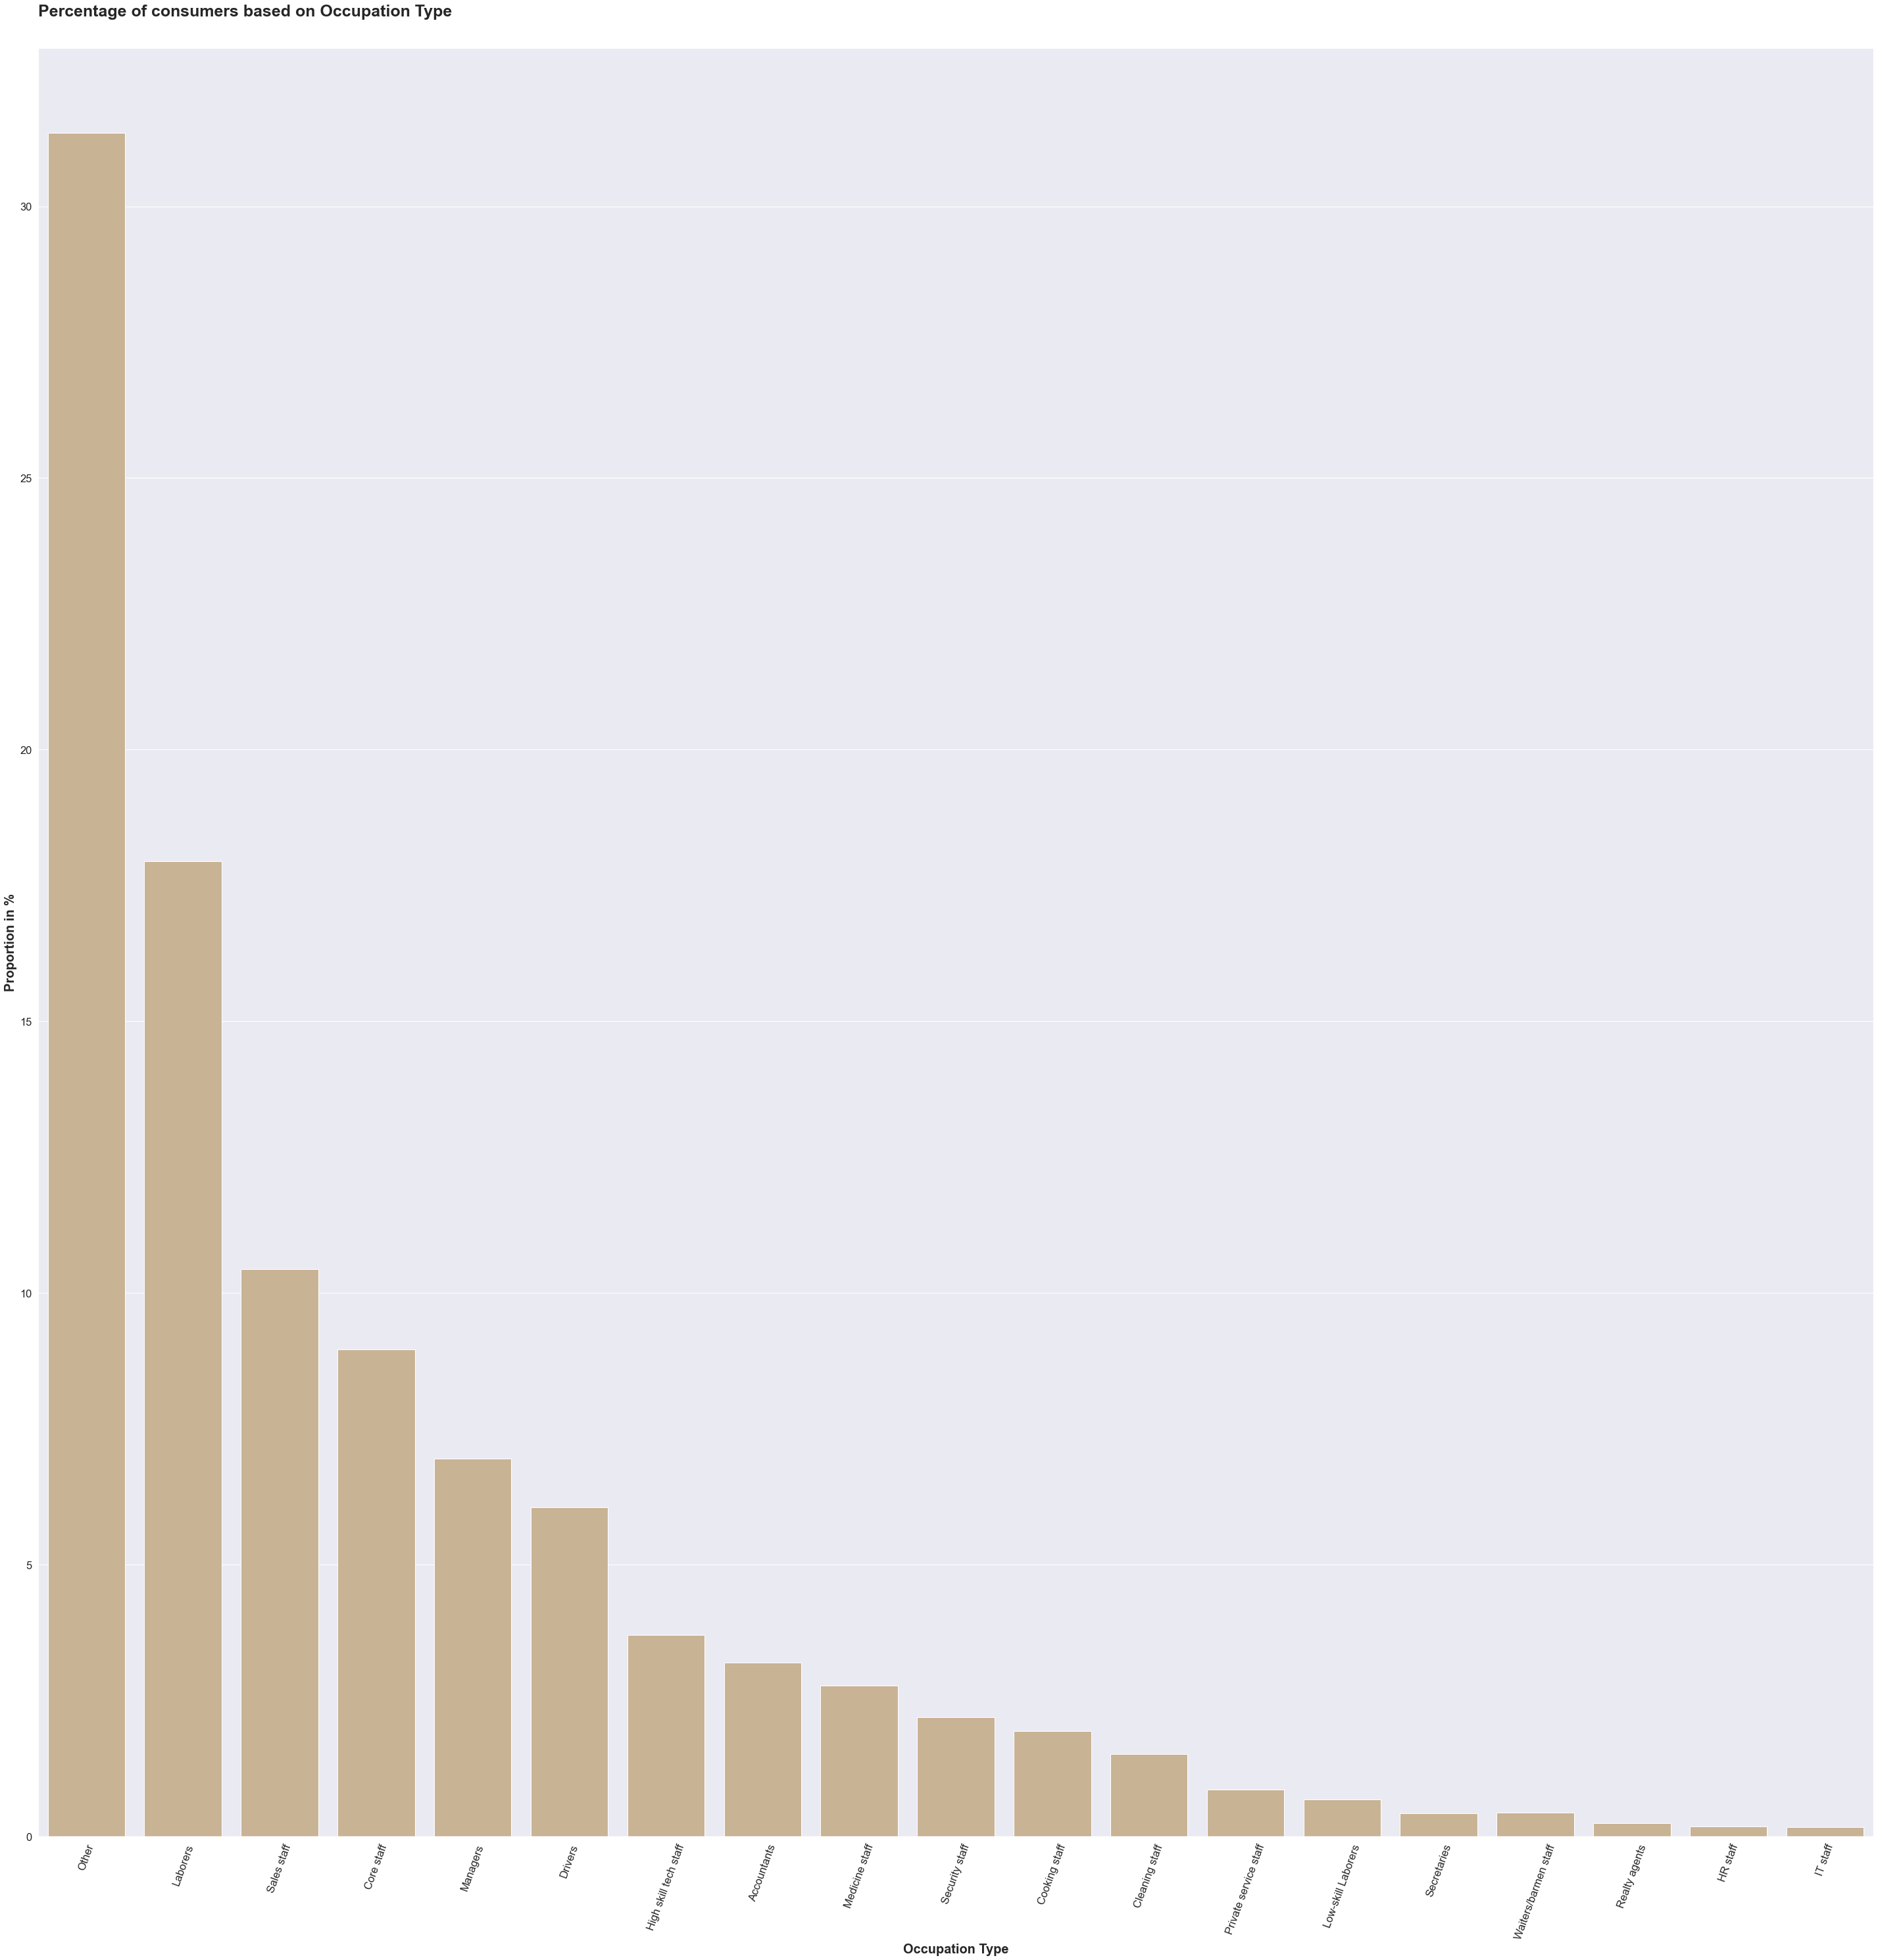

In [64]:
s = pd.crosstab(categoric['OCCUPATION_TYPE'], categoric['TARGET_NEW']).sort_values(by= 0, ascending=False)
s['TOTAL'] = s[0]+s[1]
s['PROPORSI'] = s['TOTAL']/(s['TOTAL'].sum())*100
plot = s.reset_index()
plot.columns = ['OCCUPATION_TYPE', 'No Difficulties Payment','Difficulties Payment','Total','Proporsi']
plt.text(x=-0.5,y=33.5,s="Percentage of consumers based on Occupation Type",fontsize=25,weight='bold')
plots = sns.barplot(x="OCCUPATION_TYPE", y="Proporsi", data=plot, color='Tan')
plt.rcParams['figure.figsize'] = (18, 10)
sns.set(font_scale=1.8)
plt.title("", fontsize=15, weight='bold')
plt.xlabel('Occupation Type', fontsize=20, weight='bold')
plt.ylabel('Proportion in %', fontsize=20, weight='bold')
plt.xticks(rotation = 70)
plt.show()

In [65]:
df_rate = df_new[['total_active_credit','TARGET']]
df_rate

cross_tab_prop = pd.crosstab(index=df_rate['total_active_credit'],
                             columns=df_rate['TARGET'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[['No Difficulties Payment','Difficulties Payment']]
# cross_tab_prop = cross_tab_prop.sort_values(by='No Difficulties Payment', ascending=False).head(30)
cross_tab_prop
# cross_tab = pd.crosstab(index=df_rate['NAME_EDUCATION_TYPE'],
#                         columns=df_rate['TARGET'])
cross_tab_prop1 = cross_tab_prop.reset_index()
cross_tab_prop1.columns = ['total_active_credit','No Difficulties Payment','Difficulties Payment']
cross_tab_prop1['total_active_credit'] = cross_tab_prop1['total_active_credit'].astype(int)
cross_tab_prop1.dtypes

total_active_credit          int32
No Difficulties Payment    float64
Difficulties Payment       float64
dtype: object

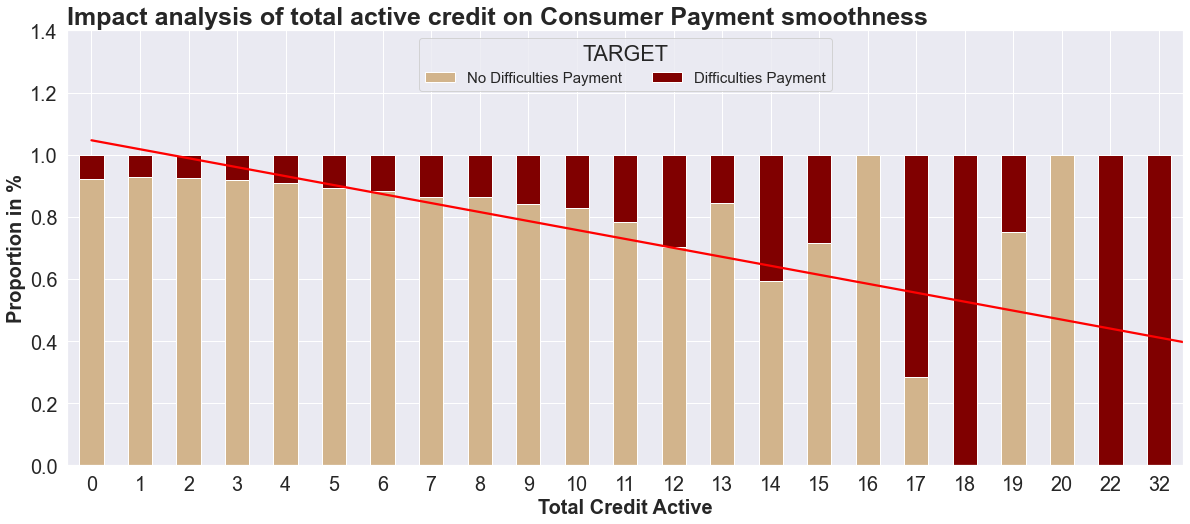

In [66]:
df_rate = df_new[['total_active_credit','TARGET']]
df_rate['total_active_credit'] = df_rate['total_active_credit'].astype(int)
df_rate

cross_tab_prop = pd.crosstab(index=df_rate['total_active_credit'],
                             columns=df_rate['TARGET'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[['No Difficulties Payment','Difficulties Payment']]
cross_tab_prop1 = cross_tab_prop.reset_index()
cross_tab_prop1.columns = ['total_active_credit','No Difficulties Payment','Difficulties Payment']

cross_tab_prop.plot(kind='bar',stacked=True, 
                    color=['Tan','Maroon'],
                    figsize=(20, 8))

plt.legend(loc="upper center",ncol=5,title='TARGET', fontsize = 15)
sns.set(font_scale=1.5)
sns.regplot(x=cross_tab_prop1['total_active_credit'], y=cross_tab_prop1['No Difficulties Payment'],ci=None,scatter= False,color='Red')
plt.text(x=-0.5,y=1.42,s="Impact analysis of total active credit on Consumer Payment smoothness",fontsize=25,weight='bold')
plt.xlabel("Total Credit Active",fontsize = 20,weight='bold')
plt.ylabel("Proportion in %",fontsize = 20,weight='bold')
plt.ylim(0,1.4)
plt.xticks(rotation = 0)
plt.show()

In [67]:
# df_num = df_new.copy()

In [68]:
yes_target = df_new[df_new["TARGET"]=='No Difficulties Payment']
no_target = df_new[df_new["TARGET"]=='Difficulties Payment']
list=[]
list_kolom = []
fitur = df_new.select_dtypes(exclude=[object]).columns
for i in fitur:
    stat, p= st.f_oneway(yes_target[i], no_target[i])
    list.append(p)
list
print('Hasil Uji Statistik ANOVA :')
for i in range(0,len(fitur)):
    if list[i] > 0.05:
        result =  "Terima H0"
        print(result,fitur[i],'p-value',list[i])
        kolom = fitur[i]
        list_kolom.append(kolom)
    else:
        result =  "Terima H1"
        print(result,fitur[i],'p-value',list[i])
print("")
print('Kolom numerik yang akan didrop berdasarkan uji statistik')
print(list_kolom)

Hasil Uji Statistik ANOVA :
Terima H1 CNT_CHILDREN p-value 1.90138028450078e-26
Terima H1 AMT_INCOME_TOTAL p-value 0.02725011559539886
Terima H1 AMT_CREDIT p-value 1.1283345778658891e-63
Terima H1 AMT_ANNUITY p-value 1.181182345206325e-12
Terima H1 AMT_GOODS_PRICE p-value 4.3066709585164264e-107
Terima H1 REGION_POPULATION_RELATIVE p-value 9.864650132775479e-95
Terima H1 DAYS_EMPLOYED p-value 3.548822689388271e-137
Terima H1 DAYS_REGISTRATION p-value 5.959413197880351e-120
Terima H1 DAYS_ID_PUBLISH p-value 2.537564154148633e-179
Terima H1 CNT_FAM_MEMBERS p-value 2.427760353082645e-07
Terima H1 HOUR_APPR_PROCESS_START p-value 5.927564423374171e-41
Terima H1 EXT_SOURCE_2 p-value 0.0
Terima H1 EXT_SOURCE_3 p-value 0.0
Terima H1 YEARS_BEGINEXPLUATATION_AVG p-value 0.00968971436423119
Terima H1 FLOORSMAX_AVG p-value 7.654019723000265e-106
Terima H1 YEARS_BEGINEXPLUATATION_MODE p-value 0.024325019742897615
Terima H1 FLOORSMAX_MODE p-value 1.379378489524284e-100
Terima H1 YEARS_BEGINEXPLUATAT

In [69]:
df_train = df_new.copy()
df_train['TARGET'] = np.where(df_train['TARGET']=='No Difficulties Payment',0,1)
df_train['TARGET'] = df_train['TARGET'].astype(int)
df_train = df_train.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'total_bad_credit'], axis=1)

In [70]:
corr_result= df_train.corr() 
corr_result = corr_result.stack()

In [71]:
corr_top = corr_result.reset_index()
corr_top.columns = ['Var1','Var2','Corr']
corr_top = corr_top[(corr_top['Var1']=='TARGET') & (corr_top['Var2']!='TARGET')]
corr_top = corr_top[['Var2', 'Corr']]
corr_top_positive = corr_top.sort_values(by='Corr', ascending=False).head(5)
corr_top_positive

Var2      Corr
25  DAYS_LAST_PHONE_CHANGE  0.055219
9          DAYS_ID_PUBLISH  0.051457
31     total_active_credit  0.043573
8        DAYS_REGISTRATION  0.041976
34           COUNT_PD_1-30  0.032457

In [72]:
corr_top_negative = corr_top.sort_values(by='Corr', ascending=True).head(5)
corr_top_negative

Var2      Corr
12     EXT_SOURCE_2 -0.160294
13     EXT_SOURCE_3 -0.155899
38              AGE -0.078267
7     DAYS_EMPLOYED -0.044934
5   AMT_GOODS_PRICE -0.039625

Berdasarkan korelasi variabel numerik dan variabel TARGET, terlihat bahwa TOP 5 korelasi baik positive maupun negative antar variabel tersebut tidak ada yang lebih dari 0.3 ataupun kurang dari -0.3. Sehingga dalam hal ini, untuk selanjutnya akan dilihat korelasi masing-masing fitur/variabel tersebut apakah redundant satu sama lain 

In [73]:
num_top = df_train[corr_top_positive['Var2'].unique().tolist() + corr_top_negative['Var2'].unique().tolist()+['TARGET']]

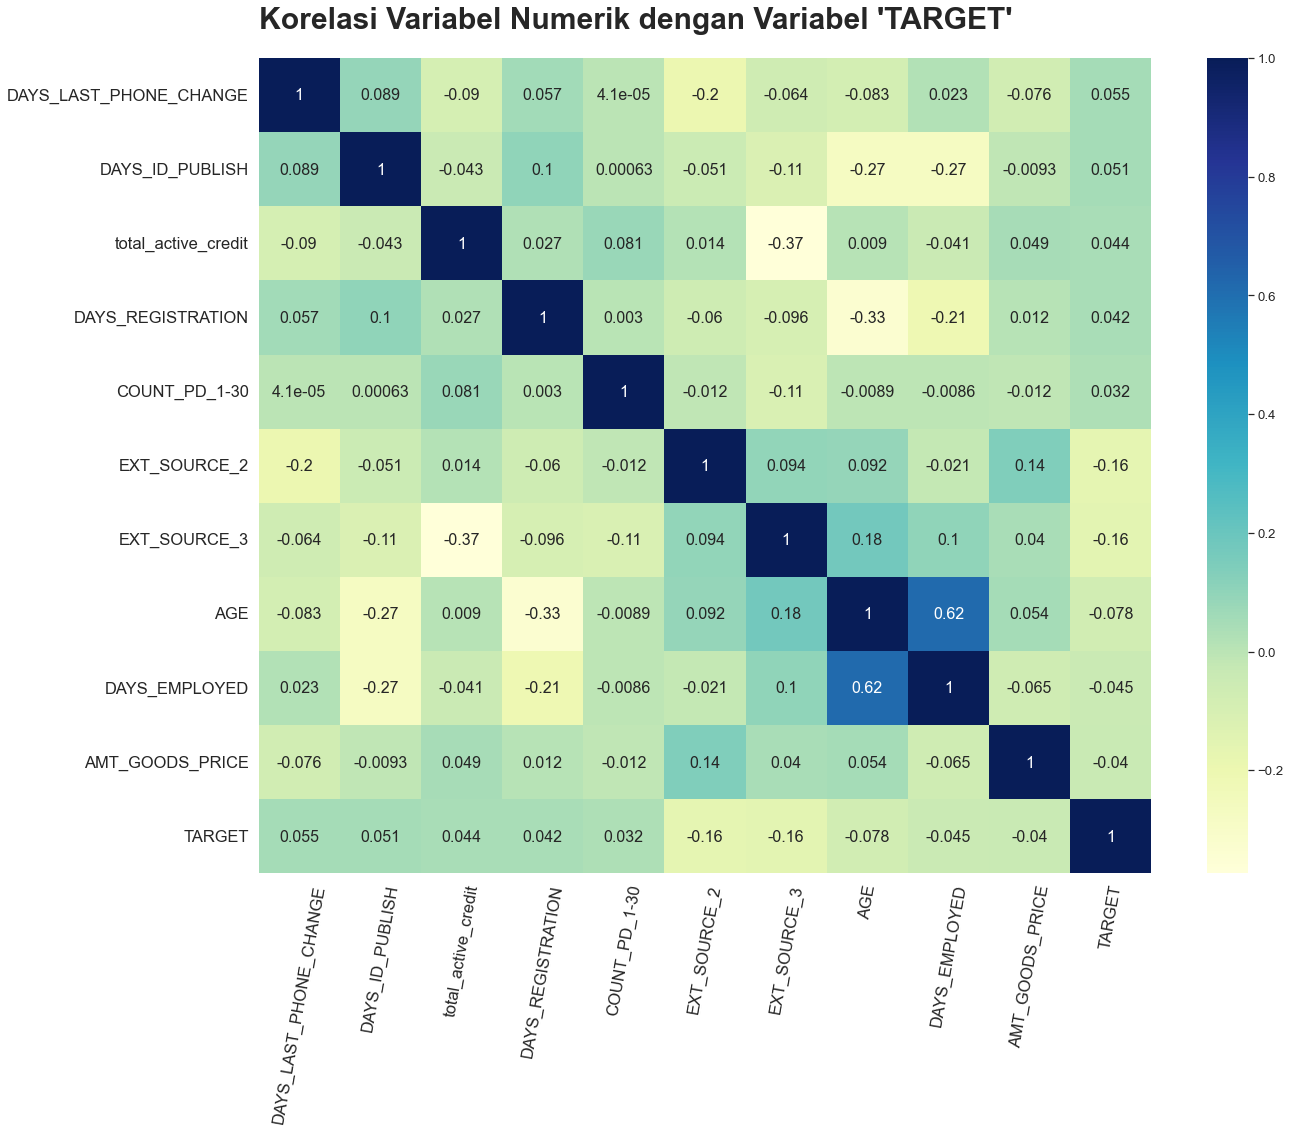

In [74]:
fig, ax = plt.subplots(figsize =(20, 15))
sns.set(font_scale=1.2)
sns.heatmap(num_top.corr(),cmap="YlGnBu",annot=True,annot_kws={"size": 16},ax=ax)
plt.text(x=0,y=-0.4,s="Korelasi Variabel Numerik dengan Variabel 'TARGET'",fontsize=30,weight='bold')
plt.xticks(rotation = 80)
plt.show()

Berdasarkan korelasi antar variabel-variabel tersebut, tidak ada beberapa variabel yang redundant dengan variabel lainnya kecuali dengan variabel itu sendiri.

In [75]:
num_new = num_top.columns.tolist()
num_new.remove('TARGET')

In [76]:
list=[]
fitur = df_train.loc[:, df_train.dtypes==np.object].columns.tolist()+['TARGET']
fitur.remove('TARGET')
for i in range(0, len(fitur)):
    ctab = pd.crosstab(df_train[fitur[i]], df_train['TARGET'])
    ctab = ctab.to_numpy()
    X2 = chi2_contingency(ctab, correction=False)[0]
    N = np.sum(ctab)
    minimum_dimension = min(ctab.shape)-1
    # Calculate Cramer's V
    result = np.sqrt((X2/N) / minimum_dimension)
    list.append(result)       
list

cram = pd.DataFrame(list).T

cram.columns = fitur

cramers_V = cram.transpose()
cramers_V.columns = ['Correlation with TARGET']
cramers_V = cramers_V.sort_values(by=['Correlation with TARGET'], ascending=False).reset_index()
cramers_V.columns = ['kolom','corr with TARGET']
cramers_V

kolom  corr with TARGET
0                    SK_ID_CURR          1.000000
1              NAME_INCOME_TYPE          0.063195
2   REGION_RATING_CLIENT_W_CITY          0.060981
3          REGION_RATING_CLIENT          0.058912
4           NAME_EDUCATION_TYPE          0.057571
5               OCCUPATION_TYPE          0.057193
6                   CODE_GENDER          0.054710
7             ORGANIZATION_TYPE          0.054236
8        REG_CITY_NOT_WORK_CITY          0.050992
9                FLAG_EMP_PHONE          0.045984
10       REG_CITY_NOT_LIVE_CITY          0.044394
11              FLAG_DOCUMENT_3          0.044341
12          EMERGENCYSTATE_MODE          0.042212
13               HOUSETYPE_MODE          0.040699
14           NAME_FAMILY_STATUS          0.040513
15            NAME_HOUSING_TYPE          0.036981
16      LIVE_CITY_NOT_WORK_CITY          0.032517
17           NAME_CONTRACT_TYPE          0.030886
18              FLAG_DOCUMENT_6          0.028603
19              FLAG_WORK_PHONE          0.028533
20                   FLAG_PHONE          0.023801
21                 FLAG_OWN_CAR          0.021850
22             FLAG_DOCUMENT_16          0.011615
23             FLAG_DOCUMENT_13          0.011583
24             FLAG_DOCUMENT_14          0.009464
25              NAME_TYPE_SUITE          0.009009
26              FLAG_DOCUMENT_8          0.008042
27             FLAG_DOCUMENT_18          0.007953
28   WEEKDAY_APPR_PROCESS_START          0.007076
29   REG_REGION_NOT_WORK_REGION          0.006941
30             FLAG_DOCUMENT_15          0.006536
31              FLAG_OWN_REALTY          0.006146
32   REG_REGION_NOT_LIVE_REGION          0.005575
33              FLAG_DOCUMENT_2          0.005417
34              FLAG_DOCUMENT_9          0.004353
35             FLAG_DOCUMENT_11          0.004230
36             FLAG_DOCUMENT_21          0.003709
37             FLAG_DOCUMENT_17          0.003378
38  LIVE_REGION_NOT_WORK_REGION          0.002819
39              FLAG_DOCUMENT_4          0.002672
40                   FLAG_EMAIL          0.001759
41              FLAG_DOCUMENT_7          0.001520
42             FLAG_DOCUMENT_10          0.001414
43             FLAG_DOCUMENT_19          0.001358
44             FLAG_DOCUMENT_12          0.000756
45                   FLAG_MOBIL          0.000534
46             FLAG_CONT_MOBILE          0.000370
47              FLAG_DOCUMENT_5          0.000316
48             FLAG_DOCUMENT_20          0.000215

- Tidak ada fitur/variabel kategorik yang memiliki korelasi negative dengan variabel TARGET. Selain itu korelasi tertinggi hanya variabel SK_ID_CURR yang memiliki korelasi sempurna dengan TARGET, dan terkait hal tersebut variabel tersebut akan didrop dan kemudian dipilih TOP 10 variabel yang memiliki korelasi teratas dengan TARGET

In [77]:
corr_top_cat = cramers_V[cramers_V['corr with TARGET']<1].head(10)
corr_top_cat

kolom  corr with TARGET
1              NAME_INCOME_TYPE          0.063195
2   REGION_RATING_CLIENT_W_CITY          0.060981
3          REGION_RATING_CLIENT          0.058912
4           NAME_EDUCATION_TYPE          0.057571
5               OCCUPATION_TYPE          0.057193
6                   CODE_GENDER          0.054710
7             ORGANIZATION_TYPE          0.054236
8        REG_CITY_NOT_WORK_CITY          0.050992
9                FLAG_EMP_PHONE          0.045984
10       REG_CITY_NOT_LIVE_CITY          0.044394

In [78]:
cat_new = corr_top_cat['kolom'].unique().tolist()+['TARGET']

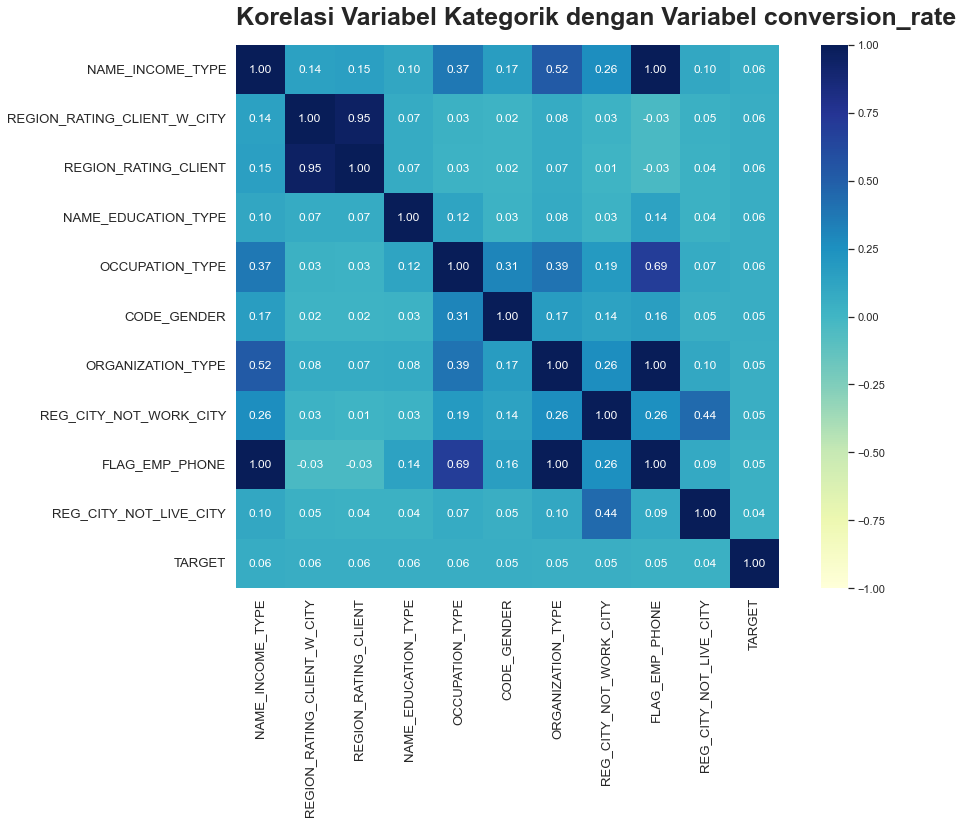

In [79]:
from dython.nominal import associations
cat_top = df_train[cat_new]
fig, ax = plt.subplots(figsize =(15,10))
sns.set(font_scale=1)
plt.text(x=0,y=-0.4,s="Korelasi Variabel Kategorik dengan Variabel conversion_rate",fontsize=25,weight='bold')
# Estimate and generate Cramer's V association plot
cramers_v = associations(cat_top, nom_nom_assoc = 'cramer',cmap = "YlGnBu", ax=ax)
plt.show()

Berdasarkan korelasi antar variabel-variabel tersebut, ada beberapa variabel yang redundant dengan variabel lainnya :
- FLAG_EMP_PHONE w/ NAME_INCOME_TYPE
- RAGION_RATING_CLIENT w/ REGION_RATING_CLIENT_W_CITY
- ORGANIZATION_TYPE w/ FLAG_EMP_PHONE
Dari beberapa variabel yang redundant masing-masing akan dipilih salah satu, dan pemilihan diliat dari variabel mana yang memiliki korelasi terbesar dengan variabel TARGET, dan berdasarkan hal tersebut maka FLAG_EMP_PHONE dan REGION_RATING_CLIENT akan didrop

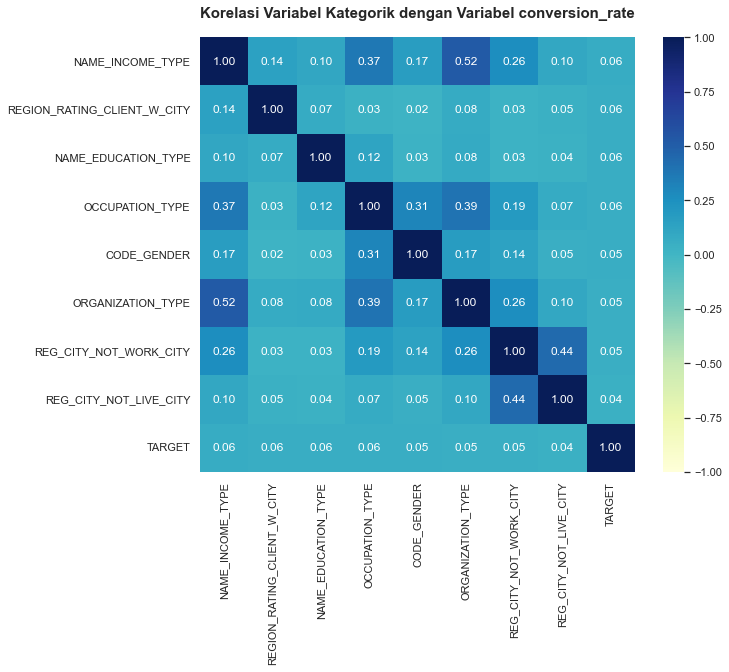

In [80]:
from dython.nominal import associations
cat_top = df_train[cat_new]
cat_top = cat_top.drop(['FLAG_EMP_PHONE','REGION_RATING_CLIENT'], axis=1)
fig, ax = plt.subplots(figsize =(10,8))
sns.set(font_scale=1)
plt.text(x=0,y=-0.4,s="Korelasi Variabel Kategorik dengan Variabel conversion_rate",fontsize=15,weight='bold')
# Estimate and generate Cramer's V association plot
cramers_v = associations(cat_top, nom_nom_assoc = 'cramer',cmap = "YlGnBu", ax=ax)
plt.show()

- Sudah tidak ada variabel kategorik yang redundant kecuali dengan variabel itu sendiri

**Menggabungkan kolom numerik dan kategorik**

In [81]:
cat_new.remove('FLAG_EMP_PHONE')
cat_new.remove('REGION_RATING_CLIENT')

In [82]:
df_train = df_train[num_new+cat_new]
df_train.shape

(307507, 19)

In [83]:
df_train.head()

DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  total_active_credit  \
0                 -1134.0            -2120                  2.0   
1                  -828.0             -291                  1.0   
2                  -815.0            -2531                  0.0   
3                  -617.0            -2437                  0.0   
4                 -1106.0            -3458                  0.0   

   DAYS_REGISTRATION  COUNT_PD_1-30  EXT_SOURCE_2  EXT_SOURCE_3   AGE  \
0            -3648.0            0.0      0.262949      0.139376  26.0   
1            -1186.0            0.0      0.622246      0.535276  46.0   
2            -4260.0            0.0      0.555912      0.729567  52.0   
3            -9833.0            0.0      0.650442      0.535276  52.0   
4            -4311.0            0.0      0.322738      0.535276  55.0   

   DAYS_EMPLOYED  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
0           -637         351000.0          Working   
1          -1188        1129500.0    State servant   
2           -225         135000.0          Working   
3          -3039         297000.0          Working   
4          -3038         513000.0          Working   

  REGION_RATING_CLIENT_W_CITY            NAME_EDUCATION_TYPE OCCUPATION_TYPE  \
0                           2  Secondary / secondary special        Laborers   
1                           1               Higher education      Core staff   
2                           2  Secondary / secondary special        Laborers   
3                           2  Secondary / secondary special        Laborers   
4                           2  Secondary / secondary special      Core staff   

  CODE_GENDER       ORGANIZATION_TYPE REG_CITY_NOT_WORK_CITY  \
0           M  Business Entity Type 3                      0   
1           F           Other Group 1                      0   
2           M           Other Group 1                      0   
3           F  Business Entity Type 3                      0   
4           M           Other Group 1                      1   

  REG_CITY_NOT_LIVE_CITY  TARGET  
0                      0       1  
1                      0       0  
2                      0       0  
3                      0       0  
4                      0       0

# Data Preprocessing

## Handling Outlier

In [84]:
df_train['TARGET'] = df_train['TARGET'].astype(np.object)
numeric_fitur = df_train.select_dtypes(exclude=[object]).columns
categoric_fitur = df_train.select_dtypes(include=[object]).columns

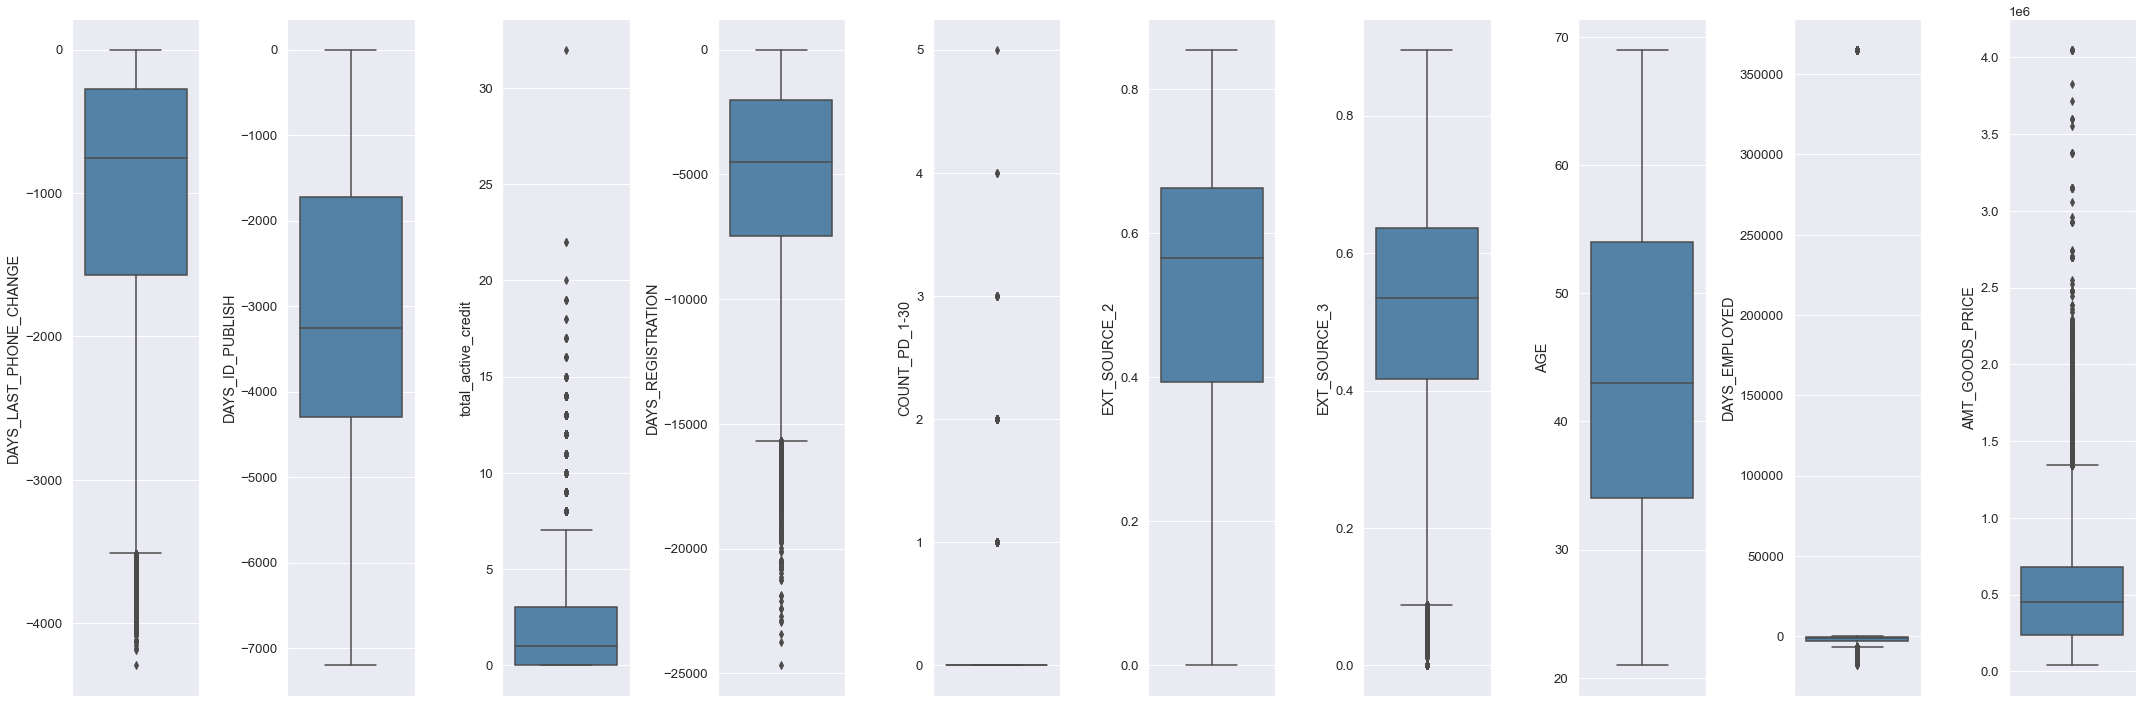

In [85]:
features = df_train.select_dtypes(exclude=[object]).columns

for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (30,10)
    sns.set(font_scale=1.2)
    plt.subplot(1,10,i+1)
    sns.boxplot(y=df_train[features[i]], color='Steelblue')
    plt.ylabel(features[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

Ada beberapa variabel yang memiliki indikasi outlier bertipe outlier global, oleh karena itu akan dicek kembali menggunakan QQPlot untuk memastikan hal tersebut

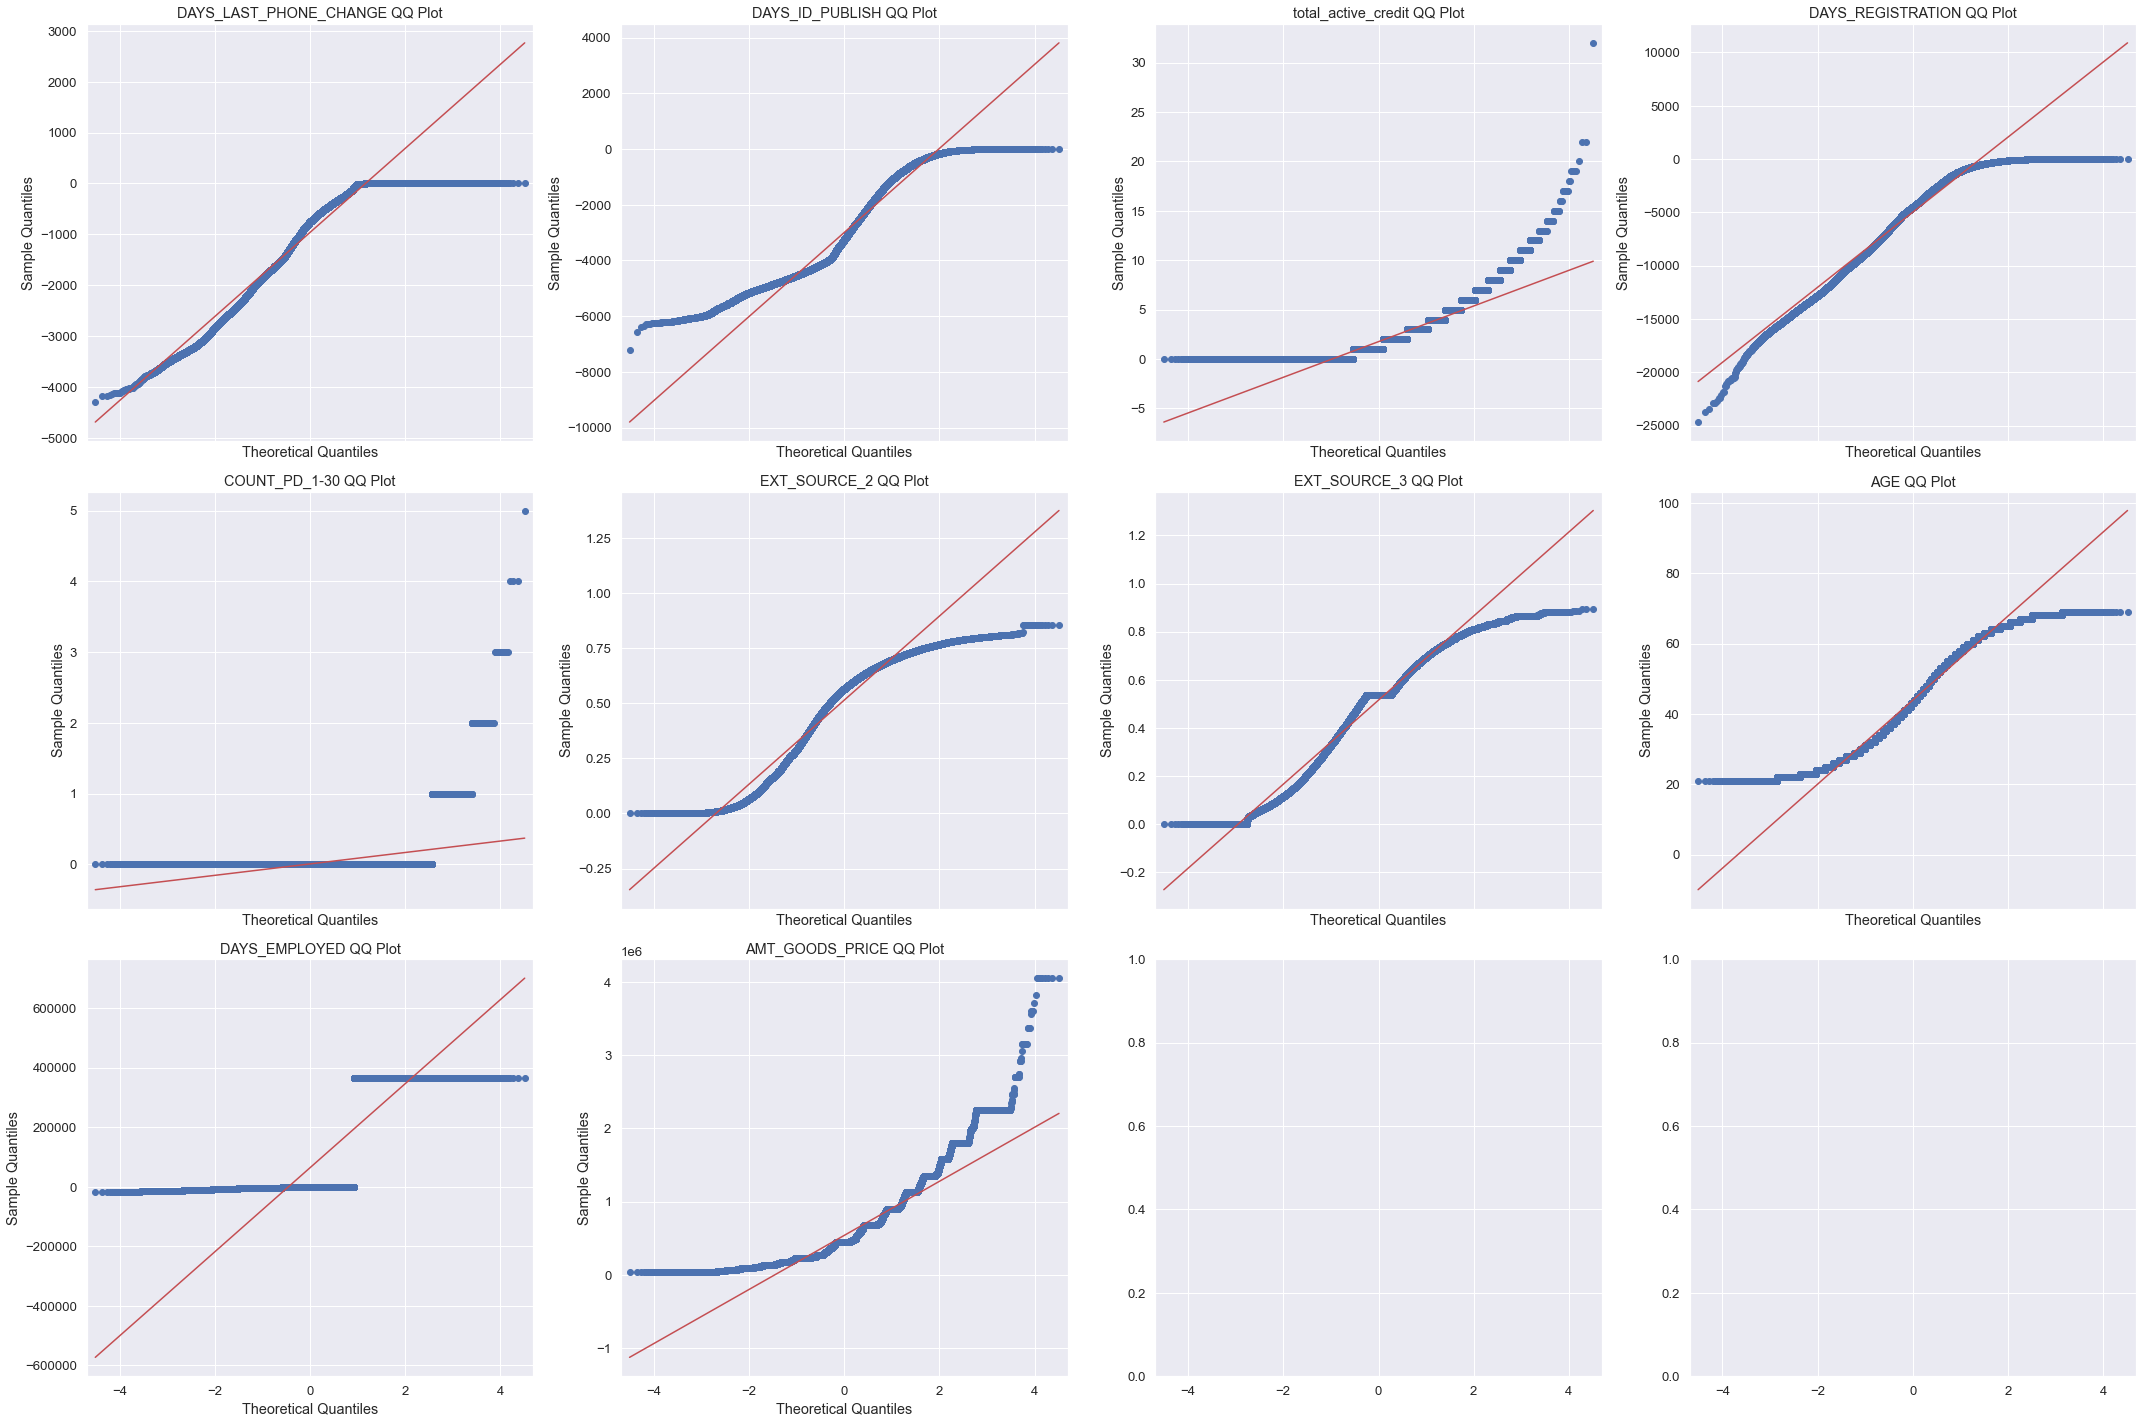

In [86]:
import statsmodels.api as sm
col =df_train.select_dtypes(exclude=[object]).columns

fig, axes = plt.subplots(ncols=4, nrows=3, sharex=True, figsize=(30, 20))
for i, ax in zip(col, np.ravel(axes)):
    sm.qqplot(df_train[i], line='s', ax=ax)
    ax.set_title(f'{i} QQ Plot')
    plt.tight_layout()

In [87]:
dt = df_train.copy()
dt = dt[dt['total_active_credit']<22]
dt = dt[dt['COUNT_PD_1-30']<4.5]

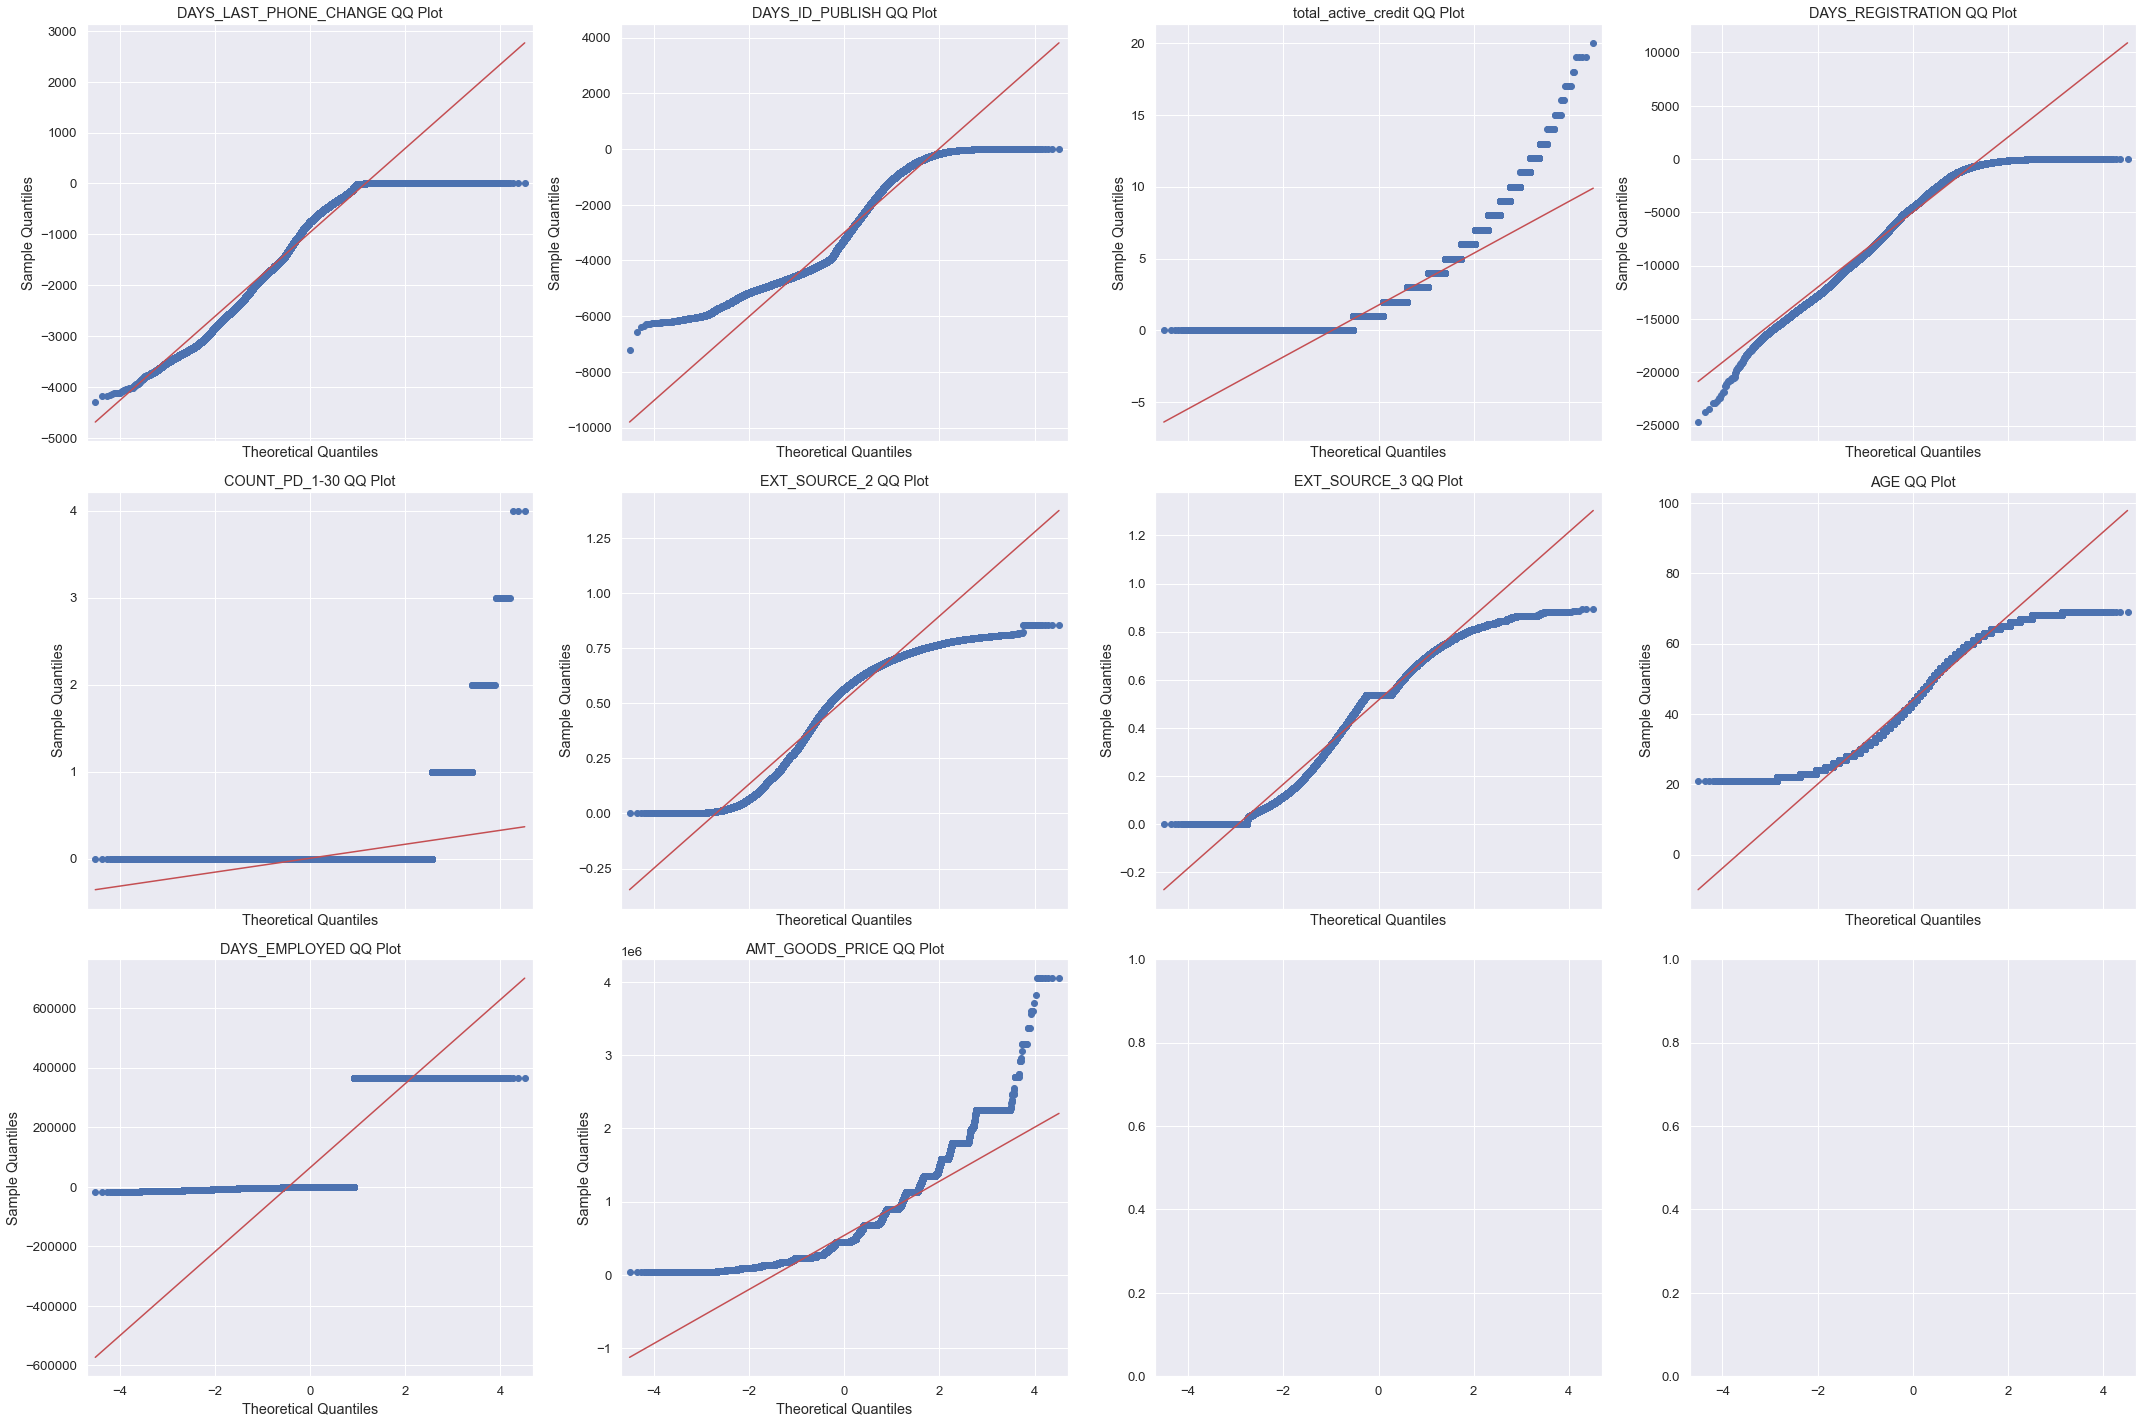

In [88]:
import statsmodels.api as sm
col =dt.select_dtypes(exclude=[object]).columns

fig, axes = plt.subplots(ncols=4, nrows=3, sharex=True, figsize=(30, 20))
for i, ax in zip(col, np.ravel(axes)):
    sm.qqplot(dt[i], line='s', ax=ax)
    ax.set_title(f'{i} QQ Plot')
    plt.tight_layout()

In [89]:
df = dt.copy()

In [90]:
fitur = df.select_dtypes(include=[object]).columns
list = []
list2 = []
for i in range(0, len(fitur)):
    if df[fitur[i]].nunique() == 2 and fitur[i]!='TARGET':
        list.append(fitur[i])
    elif df[fitur[i]].nunique() > 2 and fitur[i]!='TARGET':
        list2.append(fitur[i])
print('variabel yang memiliki 2 kelompok :')
print(list)
print()
print('variabel yang memiliki >2 kelompok :')
print(list2)

variabel yang memiliki 2 kelompok :
['CODE_GENDER', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY']

variabel yang memiliki >2 kelompok :
['NAME_INCOME_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


Strategi Encoding untuk fitur kategorik :
- NAME_EDUCATION_TYPE, REGION_RATING_CLIENT_W_CITY dan fitur yang memiliki 2 kelompok menggunakan Label Encoding
- Selain kedua variabel tersebut akan diencoding menggunakan One Hot Encoding 

In [91]:
ord_cols = ['REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY','REGION_RATING_CLIENT_W_CITY', 'NAME_EDUCATION_TYPE']
num_cols = ['DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'total_active_credit', 'DAYS_REGISTRATION', \
            'COUNT_PD_1-30', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AGE', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE']
ohe_cols = ['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE']

In [92]:
X = df[num_cols+ord_cols+ohe_cols]
y = df['TARGET'].astype(int)

X['NAME_EDUCATION_TYPE'] = np.where(X['NAME_EDUCATION_TYPE']=='Lower secondary','E1',
                         np.where(X['NAME_EDUCATION_TYPE']=='Secondary / secondary special','E2',
                                  np.where(X['NAME_EDUCATION_TYPE']=='Higher education','E3',
                                           np.where(X['NAME_EDUCATION_TYPE']=='Incomplete higher','E4','E5'))))

In [93]:
from sklearn.model_selection import train_test_split

# X = X[num_cols+ord_cols+ohe_cols]
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)

## Feature Encoding

In [94]:
list_ord = []
fitur = ord_cols
for i in range(0, len(fitur)):
    k = X[[fitur[i]]].sort_values(by = fitur[i], ascending=True)
    a = k[fitur[i]].unique().tolist() 
    list_ord.append(a)
print(list_ord)

[[0, 1], [0, 1], [1, 2, 3], ['E1', 'E2', 'E3', 'E4', 'E5']]


In [95]:
#Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = list_ord)
ord_pipe = Pipeline([('ordinal_encoder', ordinal_encoder)])

#Numeric Encoder
scaler = StandardScaler()
num_pipe = Pipeline([('scaler', scaler)])

#Onehot Encoder
onehot = OneHotEncoder(handle_unknown='ignore')
ohe_pipe = Pipeline([('onehot_encoder', onehot)])

In [96]:
preprocessor = ColumnTransformer(
    [
     ('num_pipe', num_pipe, num_cols),
     ('ord_pipe', ord_pipe, ord_cols),
     ('ohe_pipe', ohe_pipe, ohe_cols)
     ]
    )

In [97]:
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
                                  'total_active_credit', 'DAYS_REGISTRATION',
                                  'COUNT_PD_1-30', 'EXT_SOURCE_2',
                                  'EXT_SOURCE_3', 'AGE', 'DAYS_EMPLOYED',
                                  'AMT_GOODS_PRICE']),
                                ('ord_pipe',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1],
                                                                             [0,
                                                                              1],
                                                                             [1,
                                                                              2,
                                                                              3],
                                                                             ['E1',
                                                                              'E2',
                                                                              'E3',
                                                                              'E4',
                                                                              'E5']]))]),
                                 ['REG_CITY_NOT_WORK_CITY',
                                  'REG_CITY_NOT_LIVE_CITY',
                                  'REGION_RATING_CLIENT_W_CITY',
                                  'NAME_EDUCATION_TYPE']),
                                ('ohe_pipe',
                                 Pipeline(steps=[('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
                                  'CODE_GENDER', 'ORGANIZATION_TYPE'])])

In [98]:
X_train_encoding = preprocessor.fit_transform(X_train)
X_test_encoding = preprocessor.transform(X_test)

In [99]:
all_columns = num_cols + ord_cols + pd.get_dummies(X_train[ohe_cols]).columns.tolist()

In [100]:
X_train.head()

DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  total_active_credit  \
281981                 -1009.0            -3574                  0.0   
168025                 -2151.0            -1509                  2.0   
195459                 -1737.0             -196                  2.0   
106757                  -692.0            -4904                  5.0   
40025                   -611.0            -4796                  4.0   

        DAYS_REGISTRATION  COUNT_PD_1-30  EXT_SOURCE_2  EXT_SOURCE_3   AGE  \
281981            -1431.0            0.0      0.399985      0.656158  32.0   
168025            -4399.0            0.0      0.587757      0.619528  49.0   
195459            -3240.0            0.0      0.584022      0.450747  46.0   
106757            -8251.0            0.0      0.633074      0.450747  64.0   
40025               -69.0            0.0      0.735087      0.483050  35.0   

        DAYS_EMPLOYED  AMT_GOODS_PRICE REG_CITY_NOT_WORK_CITY  \
281981          -1697         225000.0                      0   
168025          -3212         247500.0                      0   
195459           -891         328500.0                      0   
106757         365243         270000.0                      0   
40025           -1350        1152000.0                      1   

       REG_CITY_NOT_LIVE_CITY REGION_RATING_CLIENT_W_CITY NAME_EDUCATION_TYPE  \
281981                      0                           3                  E2   
168025                      0                           2                  E2   
195459                      0                           3                  E2   
106757                      0                           2                  E2   
40025                       0                           2                  E3   

       NAME_INCOME_TYPE OCCUPATION_TYPE CODE_GENDER       ORGANIZATION_TYPE  
281981          Working   Other Group 1           M  Business Entity Type 3  
168025          Working   Other Group 2           M           Other Group 1  
195459          Working   Other Group 2           F           Other Group 1  
106757        Pensioner   Other Group 1           F                     XNA  
40025           Working     Sales staff           M           Self-employed

In [101]:
X_train_encoding = pd.DataFrame(X_train_encoding, columns= all_columns)
X_train_encoding.head()

DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  total_active_credit  \
0               -0.055718        -0.385233            -0.978007   
1               -1.437538         0.982289             0.131426   
2               -0.936598         1.851807             0.131426   
3                0.327852        -1.266009             1.795576   
4                0.425862        -1.194487             1.240859   

   DAYS_REGISTRATION  COUNT_PD_1-30  EXT_SOURCE_2  EXT_SOURCE_3       AGE  \
0           1.008648      -0.069266     -0.600236      0.804720 -0.995759   
1           0.166724      -0.069266      0.383441      0.595083  0.426561   
2           0.495494      -0.069266      0.363874     -0.370845  0.175564   
3          -0.925961      -0.069266      0.620846     -0.370845  1.681550   
4           1.395002      -0.069266      1.155261     -0.185976 -0.744761   

   DAYS_EMPLOYED  AMT_GOODS_PRICE  REG_CITY_NOT_WORK_CITY  \
0      -0.462949        -0.849030                     0.0   
1      -0.473684        -0.788057                     0.0   
2      -0.457238        -0.568557                     0.0   
3       2.137088        -0.727085                     0.0   
4      -0.460490         1.663036                     1.0   

   REG_CITY_NOT_LIVE_CITY  REGION_RATING_CLIENT_W_CITY  NAME_EDUCATION_TYPE  \
0                     0.0                          2.0                  1.0   
1                     0.0                          1.0                  1.0   
2                     0.0                          2.0                  1.0   
3                     0.0                          1.0                  1.0   
4                     0.0                          1.0                  2.0   

   NAME_INCOME_TYPE_Commercial associate  NAME_INCOME_TYPE_Other Group  \
0                                    0.0                           0.0   
1                                    0.0                           0.0   
2                                    0.0                           0.0   
3                                    0.0                           0.0   
4                                    0.0                           0.0   

   NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
0                         0.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         1.0                             0.0   
4                         0.0                             0.0   

   NAME_INCOME_TYPE_Working  OCCUPATION_TYPE_Core staff  \
0                       1.0                         0.0   
1                       1.0                         0.0   
2                       1.0                         0.0   
3                       0.0                         0.0   
4                       1.0                         0.0   

   OCCUPATION_TYPE_Laborers  OCCUPATION_TYPE_Other Group 1  \
0                       0.0                            1.0   
1                       0.0                            0.0   
2                       0.0                            0.0   
3                       0.0                            1.0   
4                       0.0                            0.0   

   OCCUPATION_TYPE_Other Group 2  OCCUPATION_TYPE_Sales staff  CODE_GENDER_F  \
0                            0.0                          0.0            0.0   
1                            1.0                          0.0            0.0   
2                            1.0                          0.0            1.0   
3                            0.0                          0.0            1.0   
4                            0.0                          1.0            0.0   

   CODE_GENDER_M  ORGANIZATION_TYPE_Business Entity Type 3  \
0            1.0                                       1.0   
1            1.0                                       0.0   
2            0.0                                       0.0   
3 

In [102]:
X_test_encoding = pd.DataFrame(X_test_encoding, columns= num_cols + ord_cols + pd.get_dummies(X_test[ohe_cols]).columns.tolist())
X_test_encoding.head()

DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  total_active_credit  \
0                0.746512        -0.777277             1.240859   
1                0.560172        -0.786549             0.131426   
2               -1.988088        -0.311724             2.350293   
3                0.417392        -0.928930             0.131426   
4                0.558962        -0.068021             0.131426   

   DAYS_REGISTRATION  COUNT_PD_1-30  EXT_SOURCE_2  EXT_SOURCE_3       AGE  \
0          -2.282173      -0.069266      0.735304      0.795397  1.179554   
1           1.308767      -0.069266      0.053208     -1.457591  1.179554   
2           1.100272      -0.069266      0.608349     -0.819605 -0.242766   
3           1.255154      -0.069266     -1.717516     -2.132808 -0.577429   
4           1.316710      -0.069266     -0.333943      0.437409 -0.493763   

   DAYS_EMPLOYED  AMT_GOODS_PRICE  REG_CITY_NOT_WORK_CITY  \
0       2.137088        -0.714891                     0.0   
1      -0.460207        -0.544168                     1.0   
2      -0.475434         0.004585                     0.0   
3      -0.452249         0.370420                     0.0   
4      -0.456473        -0.361250                     1.0   

   REG_CITY_NOT_LIVE_CITY  REGION_RATING_CLIENT_W_CITY  NAME_EDUCATION_TYPE  \
0                     0.0                          1.0                  2.0   
1                     0.0                          1.0                  1.0   
2                     0.0                          1.0                  2.0   
3                     0.0                          1.0                  2.0   
4                     1.0                          2.0                  2.0   

   NAME_INCOME_TYPE_Commercial associate  NAME_INCOME_TYPE_Other Group  \
0                                    0.0                           0.0   
1                                    0.0                           0.0   
2                                    0.0                           0.0   
3                                    0.0                           0.0   
4                                    0.0                           0.0   

   NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
0                         1.0                             0.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   

   NAME_INCOME_TYPE_Working  OCCUPATION_TYPE_Core staff  \
0                       0.0                         0.0   
1                       1.0                         0.0   
2                       1.0                         0.0   
3                       1.0                         0.0   
4                       1.0                         0.0   

   OCCUPATION_TYPE_Laborers  OCCUPATION_TYPE_Other Group 1  \
0                       0.0                            1.0   
1                       1.0                            0.0   
2                       0.0                            0.0   
3                       0.0                            0.0   
4                       0.0                            0.0   

   OCCUPATION_TYPE_Other Group 2  OCCUPATION_TYPE_Sales staff  CODE_GENDER_F  \
0                            0.0                          0.0            0.0   
1                            0.0                          0.0            0.0   
2                            0.0                          1.0            1.0   
3                            1.0                          0.0            0.0   
4                            0.0                          1.0            1.0   

   CODE_GENDER_M  ORGANIZATION_TYPE_Business Entity Type 3  \
0            1.0                                       0.0   
1            1.0                                       1.0   
2            0.0                                       0.0   
3 

In [103]:
X_test.head()

DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  total_active_credit  \
173925                  -346.0            -4166                  4.0   
51670                   -500.0            -4180                  2.0   
23002                  -2606.0            -3463                  6.0   
18752                   -618.0            -4395                  2.0   
180519                  -501.0            -3095                  2.0   

        DAYS_REGISTRATION  COUNT_PD_1-30  EXT_SOURCE_2  EXT_SOURCE_3   AGE  \
173925           -13032.0            0.0      0.654923      0.654529  58.0   
51670              -373.0            0.0      0.524719      0.260856  58.0   
23002             -1108.0            0.0      0.630689      0.372334  41.0   
18752              -562.0            0.0      0.186711      0.142873  37.0   
180519             -345.0            0.0      0.450817      0.591977  38.0   

        DAYS_EMPLOYED  AMT_GOODS_PRICE REG_CITY_NOT_WORK_CITY  \
173925         365243         274500.0                      0   
51670           -1310         337500.0                      1   
23002           -3459         540000.0                      0   
18752            -187         675000.0                      0   
180519           -783         405000.0                      1   

       REG_CITY_NOT_LIVE_CITY REGION_RATING_CLIENT_W_CITY NAME_EDUCATION_TYPE  \
173925                      0                           2                  E3   
51670                       0                           2                  E2   
23002                       0                           2                  E3   
18752                       0                           2                  E3   
180519                      1                           3                  E3   

       NAME_INCOME_TYPE OCCUPATION_TYPE CODE_GENDER       ORGANIZATION_TYPE  
173925        Pensioner   Other Group 1           M                     XNA  
51670           Working        Laborers           M  Business Entity Type 3  
23002           Working     Sales staff           F           Other Group 2  
18752           Working   Other Group 2           M  Business Entity Type 3  
180519          Working     Sales staff           F           Self-employed

## Handle Class Imbalance
Untuk handle class imbalance akan digunakan metode Class Weight yang parameternya ada pada model Machine Learning, Class Weight digunakan karena ketika di dalam algoritma modelnya akan memberikan kesempatan lebih kepada kelas minoritas sehingga dapat memberikan penalti yang lebih tinggi kepada kelas minoritas dan algoritma dapat fokus pada pengurangan kesalahan untuk kelas minoritas.<br>
[Terkait Class Weight Parameter](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/)

# Modeling Machine Learning

- Pada case ini berkaitan dengan resiko sebuah pengajuan kredit oleh calon debitur, dimana sebelum dilakukan approval kredit maka terlebih dahulu dilakukan analisa kelayakan calon debitur tersebut untuk mendapatkan kredit atau tidak dari pihak pemberi kredit 
- Secara manual biasanya analisa tersebut dilakukan oleh seorang Credit Analyst atau pihak lainnya yang bertanggung jawab dalam menganalisa sebuah pengajuan kredit dan memberikan rekomendasi terkait kondisi pengajuan kredit tersebut 
- Namun, semakin banyaknya pengajuan/aplikasi yang masuk tentu hal ini akan memakan banyak waktu apabila dilakukan analisa secara manual untuk semua aplikasi yang masuk
- Oleh karena itu, dengan pendekatan Data Science melalui model pada Machine Learning, tidak harus dilakukan review atau analisa terlebih dahulu terhadap semua aplikasi yang masuk. Karena model akan menyeleksi aplikasi yang perlu direview secara manual dan yang auto approve by model. 
- Selain itu karena hal ini berkaitan dengan resiko, maka resiko yang terjadi di masa depan akibat wanprestasi yang dilakukan oleh debitur harus diminimalisir atau sebisa mungkin dapat dilakukan pencegahan di awal 
- Oleh karena itu metric yang akan digunakan pada model ini adalah Recall dengan tujuan mengurangi False Negative sebanyak mungkin. False Negative pada case ini adalah debitur yang diprediksi 'LANCAR BAYAR' namun ternyata pada kenyataannya 'KESULITAN BAYAR', kami ingin menghindari hal tersebut yang terjadi akibat salah prediksi. 
- Metrics Recall adalah perhitungan metrics yang menggunakan False Negative sebagai pembaginya, sehingga semakin kecil False Negative maka semakin besar nilai Recall nya, nantinya metrics Recall yang terbaik adalah yang akan dipilih setelah melihat nilai metrics ROC_AUC sebagai metrics yang mampu membedakan antar target berdasarkan threshold.

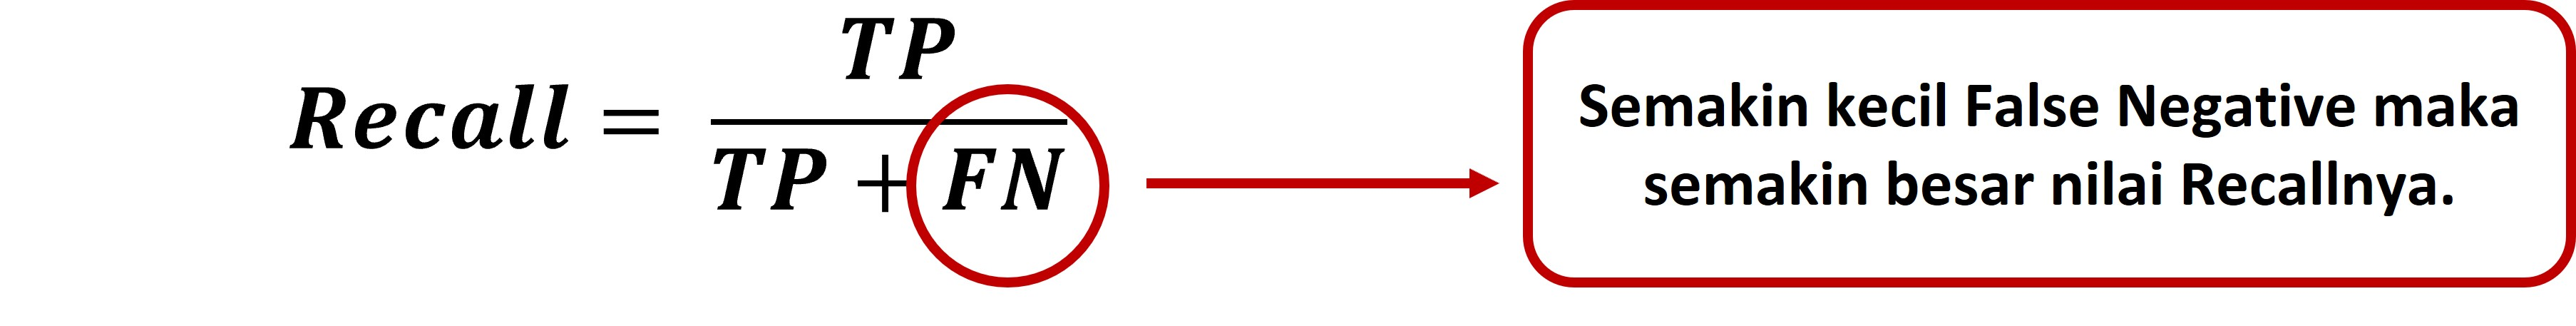

## Cross Validation

In [104]:
#modelling with scoring metrics
def cross_validation(model):
    model_name = []

    cv_recall_mean = []
    cv_recall_std = []
    training_recall = []
    
    cv_precision_mean = []
    cv_precision_std = []
    training_precision = []
    
    cv_f1_mean = []
    cv_f1_std = []
    training_f1 = []
    
    cv_roc_auc_mean = []
    cv_roc_auc_std = []
    training_roc_auc = []

    
    for name, model in models:
    
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ]) 
        model_name.append(name)

        #scoring
        scoring= ['recall', 'precision', 'f1', 'roc_auc']
        
        #cross_validate 
        cv_score = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, n_jobs = -1)
        
        # training
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_train)
#         y_pred_proba = pipeline.predict_proba(X_test)
#         y_pred_proba_train = pipeline.predict_proba(X_train)
        
        training_recall.append(recall_score(y_train,y_pred))
        training_precision.append(precision_score(y_train, y_pred))
        training_f1.append(f1_score(y_train, y_pred))
        training_roc_auc.append(roc_auc_score(y_train, y_pred))
        
        #tes    
        cv_recall_mean.append(abs(cv_score['test_recall']).mean())
        cv_recall_std.append(abs(cv_score['test_recall']).std())
        cv_precision_mean.append(abs(cv_score['test_precision']).mean())
        cv_precision_std.append(abs(cv_score['test_precision']).std())
        cv_f1_mean.append(abs(cv_score['test_f1']).mean())
        cv_f1_std.append(abs(cv_score['test_f1']).std())
        cv_roc_auc_mean.append(abs(cv_score['test_roc_auc']).mean())
        cv_roc_auc_std.append(abs(cv_score['test_roc_auc']).std())
   
    return pd.DataFrame({
        'Model': model_name,
        'Training Recall' : training_recall,
        'CV Recall (mean)': cv_recall_mean,
        'CV Recall (std)': cv_recall_std,
        'Training Precision' : training_precision,
        'CV Precision (mean)' : cv_precision_mean,
        'CV Precision (std)' : cv_precision_std,
        'Training F1' : training_f1,
        'CV F1 (mean)' : cv_f1_mean,
        'CV F1 (std)' : cv_f1_std,
        'Training AUC_ROC' : training_roc_auc,
        'CV AUC_ROC (mean)' : cv_roc_auc_mean,
        'CV AUC_ROC (std)' : cv_roc_auc_std,
    })

In [105]:
#assign model ke dalam variabel
models = [
    ['Logistic Regression', LogisticRegression(class_weight='balanced', random_state=42)],
    ['XGB', XGBClassifier(verbosity=0)],
    ['Decision Tree', DecisionTreeClassifier(class_weight='balanced', random_state=42)],
    ['Random Forest', RandomForestClassifier(class_weight='balanced', random_state=42)],
    ['Naive Bayes', GaussianNB()],
    ['LGBM', LGBMClassifier(class_weight='balanced', random_state=42, n_jobs=-1)]
]

In [106]:
%%time
cv_result = cross_validation(models)
cv_result

CPU times: total: 4min 1s
Wall time: 8min 42s


Model  Training Recall  CV Recall (mean)  CV Recall (std)  \
0  Logistic Regression         0.658274          0.657316         0.012105   
1                  XGB         0.042250          0.021251         0.001643   
2        Decision Tree         1.000000          0.145533         0.004651   
3        Random Forest         0.999345          0.001914         0.000201   
4          Naive Bayes         0.245543          0.245946         0.006152   
5                 LGBM         0.708531          0.659582         0.008667   

   Training Precision  CV Precision (mean)  CV Precision (std)  Training F1  \
0            0.153427             0.153328            0.003592     0.248853   
1            0.824165             0.446944            0.021981     0.080379   
2            1.000000             0.143587            0.004148     1.000000   
3            1.000000             0.527500            0.092030     0.999673   
4            0.208697             0.207648            0.009243     0.225626   
5            0.170104             0.160351            0.002387     0.274344   

   CV F1 (mean)  CV F1 (std)  Training AUC_ROC  CV AUC_ROC (mean)  \
0      0.248652     0.005567          0.669663           0.729047   
1      0.040570     0.003083          0.520729           0.732826   
2      0.144547     0.004309          1.000000           0.534656   
3      0.003813     0.000399          0.999673           0.711464   
4      0.224979     0.004841          0.581895           0.675766   
5      0.257981     0.003654          0.702495           0.739977   

   CV AUC_ROC (std)  
0          0.007474  
1          0.003573  
2          0.002338  
3          0.004006  
4          0.009335  
5          0.005255

In [107]:
cv_result.to_excel('cv_result.xlsx')

## Logistic Regression

### Hyperparameter Tuning

In [108]:
%%time
#Hyptun Logistic Regression

logreg = LogisticRegression(class_weight = 'balanced', random_state=42)

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('algo', logreg)
    ])

param_logreg = {'algo__penalty': ['elasticnet', 'l2','l1'], # default 100
                'algo__C': [float(x) for x in np.linspace(0.001, 1, 10000)],
                'algo__fit_intercept' : [True,False]}


rs_logreg = RandomizedSearchCV(estimator=pipeline, param_distributions=param_logreg, scoring='recall', 
                               random_state=42, cv=10, n_jobs=-1, verbose=1)
rs_logreg.fit(X_train, y_train)

print(rs_logreg.best_params_)
print(rs_logreg.score(X_train, y_train), rs_logreg.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'algo__penalty': 'l2', 'algo__fit_intercept': False, 'algo__C': 0.9404536453645365}
0.6578205257327022 0.6570156333630122
CPU times: total: 1min 13s
Wall time: 2min 20s


Score Before Hyperparameter Tuning Use Logreg
              precision    recall  f1-score   support

           0       0.96      0.68      0.80    226144
           1       0.15      0.66      0.25     19858

    accuracy                           0.68    246002
   macro avg       0.56      0.67      0.52    246002
weighted avg       0.89      0.68      0.75    246002

Score After Hyperparameter Tuning Use Logreg
              precision    recall  f1-score   support

           0       0.96      0.68      0.80    226144
           1       0.15      0.66      0.25     19858

    accuracy                           0.68    246002
   macro avg       0.56      0.67      0.52    246002
weighted avg       0.89      0.68      0.75    246002



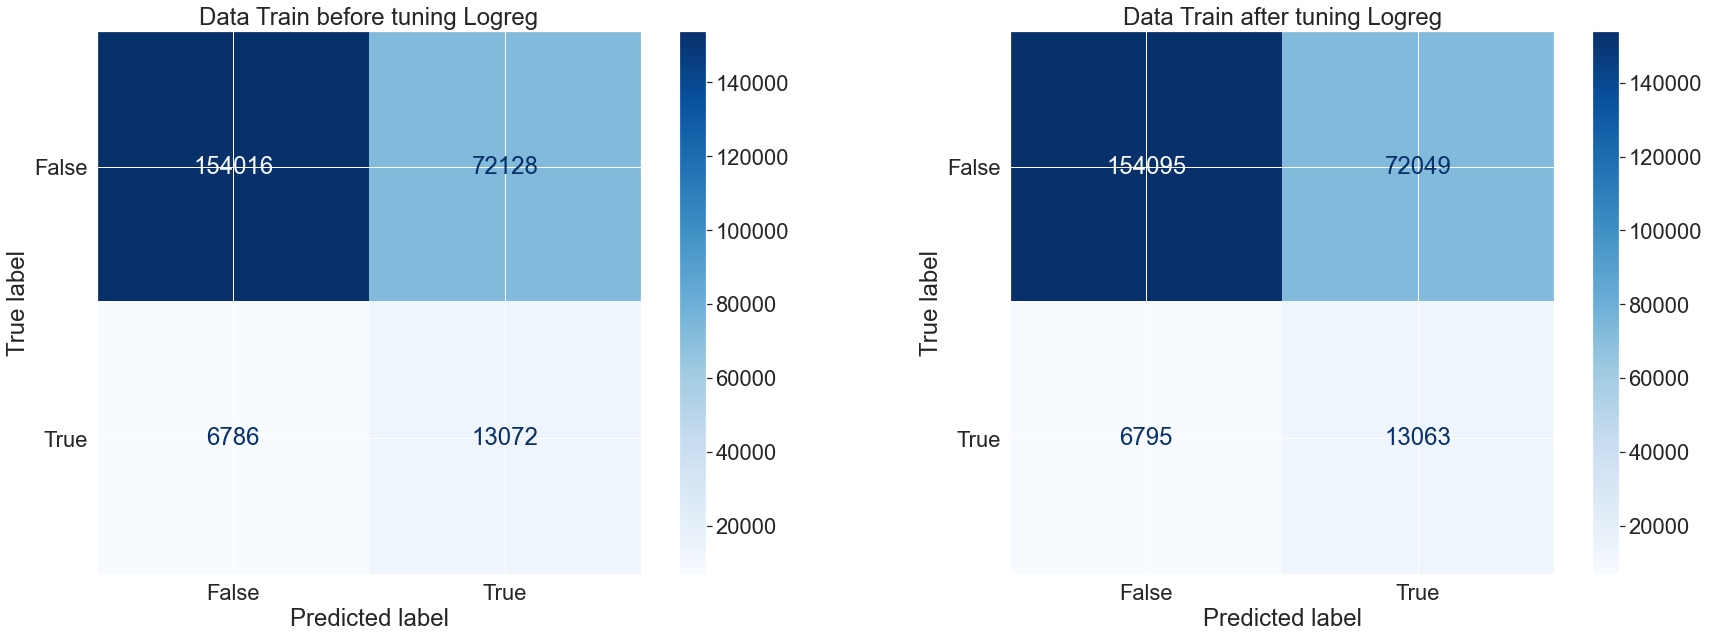

In [109]:
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Train before tuning Logreg")
ax[1].set_title("Data Train after tuning Logreg")

logreg = LogisticRegression(class_weight = 'balanced', random_state=42)
logreg.fit(X_train_encoding, y_train)
y_pred_train_logreg = logreg.predict(X_train_encoding)

logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C =  0.9404536453645365, random_state=42)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_train_logreg_rs = logreg_rs.predict(X_train_encoding)

print("Score Before Hyperparameter Tuning Use Logreg")
print(metrics.classification_report(y_train,y_pred_train_logreg))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_logreg), 
display_labels = [False, True]).plot(ax=ax[0], cmap='Blues')

print("Score After Hyperparameter Tuning Use Logreg")
print(metrics.classification_report(y_train,y_pred_train_logreg_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_logreg_rs), 
display_labels = [False, True]).plot(ax=ax[1], cmap='Blues');

- Karena jumlah FN naik meski tidak signifikan, akan dilakukan tuning threshold dengan mencari best optimal threshold menggunakan Gmean

### Tuning Threshold Logistic Regression

In [110]:
logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C =0.9404536453645365, random_state=42)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_train_logreg_rs = logreg_rs.predict(X_train_encoding)

fpr, tpr, thresholds = roc_curve(y_train, logreg_rs.predict_proba(X_train_encoding)[:,1])
roc_auc_value = roc_auc_score(y_train, logreg_rs.predict_proba(X_train_encoding)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg: ', round(gini_value*100, 2), '%')
# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

AUC for Logreg:  72.97 %
Gini for Logreg:  45.94 %


In [111]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.4945 with G-Mean: 0.6699
FPR: 0.3274, TPR: 0.6672


Score Logreg Hyperparameter Tuning with default Threshold
              precision    recall  f1-score   support

           0       0.96      0.68      0.80    226144
           1       0.15      0.66      0.25     19858

    accuracy                           0.68    246002
   macro avg       0.56      0.67      0.52    246002
weighted avg       0.89      0.68      0.75    246002

Score Logreg after Tuning Threshold
              precision    recall  f1-score   support

           0       0.96      0.67      0.79    226144
           1       0.15      0.67      0.25     19858

    accuracy                           0.67    246002
   macro avg       0.56      0.67      0.52    246002
weighted avg       0.89      0.67      0.75    246002



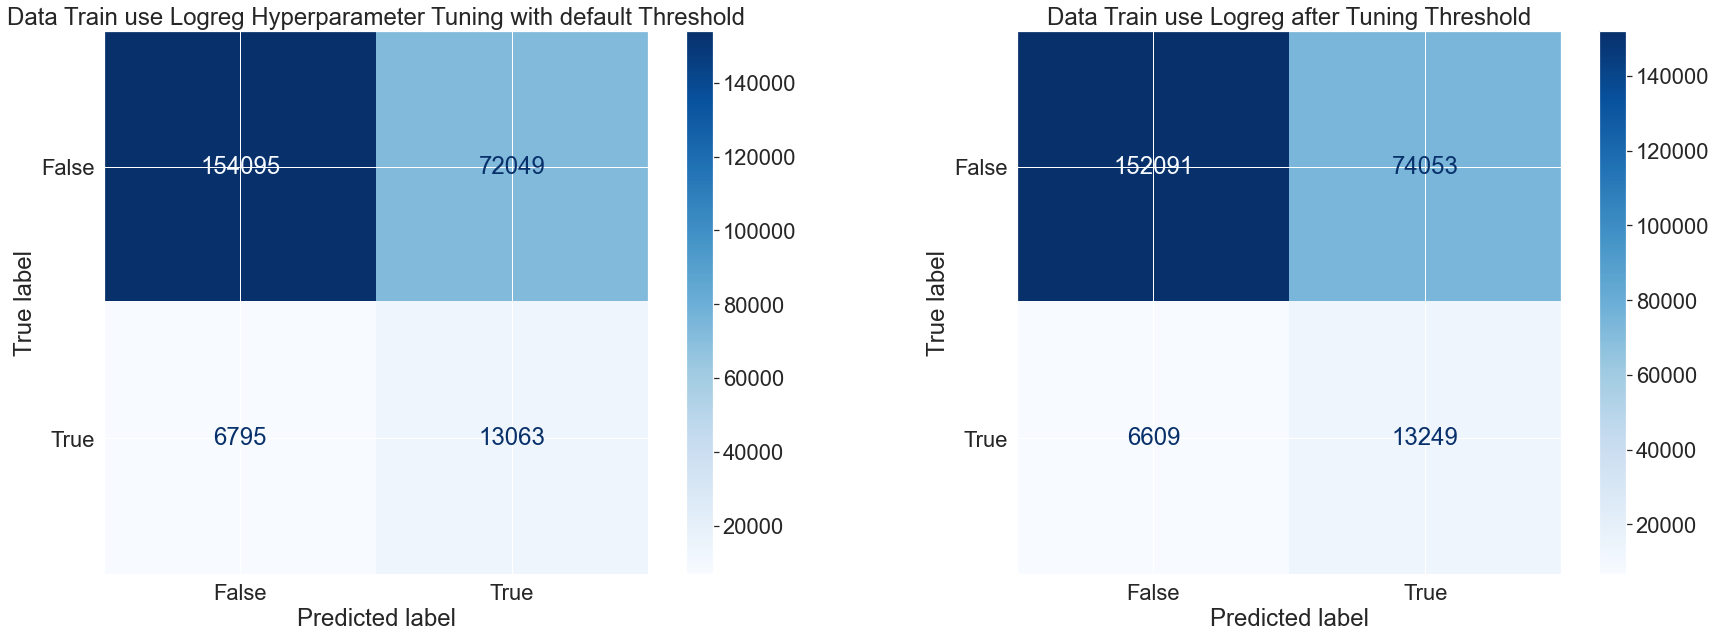

In [112]:
threshold = 0.4945
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Train use Logreg Hyperparameter Tuning with default Threshold")
ax[1].set_title("Data Train use Logreg after Tuning Threshold")


logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C =0.9404536453645365, random_state=42)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_train_thr = np.where(logreg_rs.predict_proba(X_train_encoding)[:,1]>=threshold,1,0)
y_pred_train_logreg_rs = logreg_rs.predict(X_train_encoding)
y_pred_proba_logreg_rs = logreg_rs.predict_proba(X_train_encoding)[:,1]

print("Score Logreg Hyperparameter Tuning with default Threshold")
print(metrics.classification_report(y_train,y_pred_train_logreg_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_logreg_rs), 
display_labels = [False, True]).plot(ax=ax[0], cmap='Blues')

print("Score Logreg after Tuning Threshold")
print(metrics.classification_report(y_train,y_pred_train_thr))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_thr), 
display_labels = [False, True]).plot(ax=ax[1], cmap='Blues');

- Setelah dilakukan tuning threshold, jumlah FN turun tidak cukup signifikan menjadi 6609 atau menjadi 2.7% dari total data train 

### Data Test - Logistic Regression

Score Logreg Hyperparameter Tuning with default Threshold
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56537
           1       0.15      0.65      0.25      4964

    accuracy                           0.68     61501
   macro avg       0.55      0.66      0.52     61501
weighted avg       0.89      0.68      0.75     61501

Score Logreg after Tuning Threshold
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     56537
           1       0.15      0.66      0.24      4964

    accuracy                           0.67     61501
   macro avg       0.55      0.66      0.52     61501
weighted avg       0.89      0.67      0.75     61501



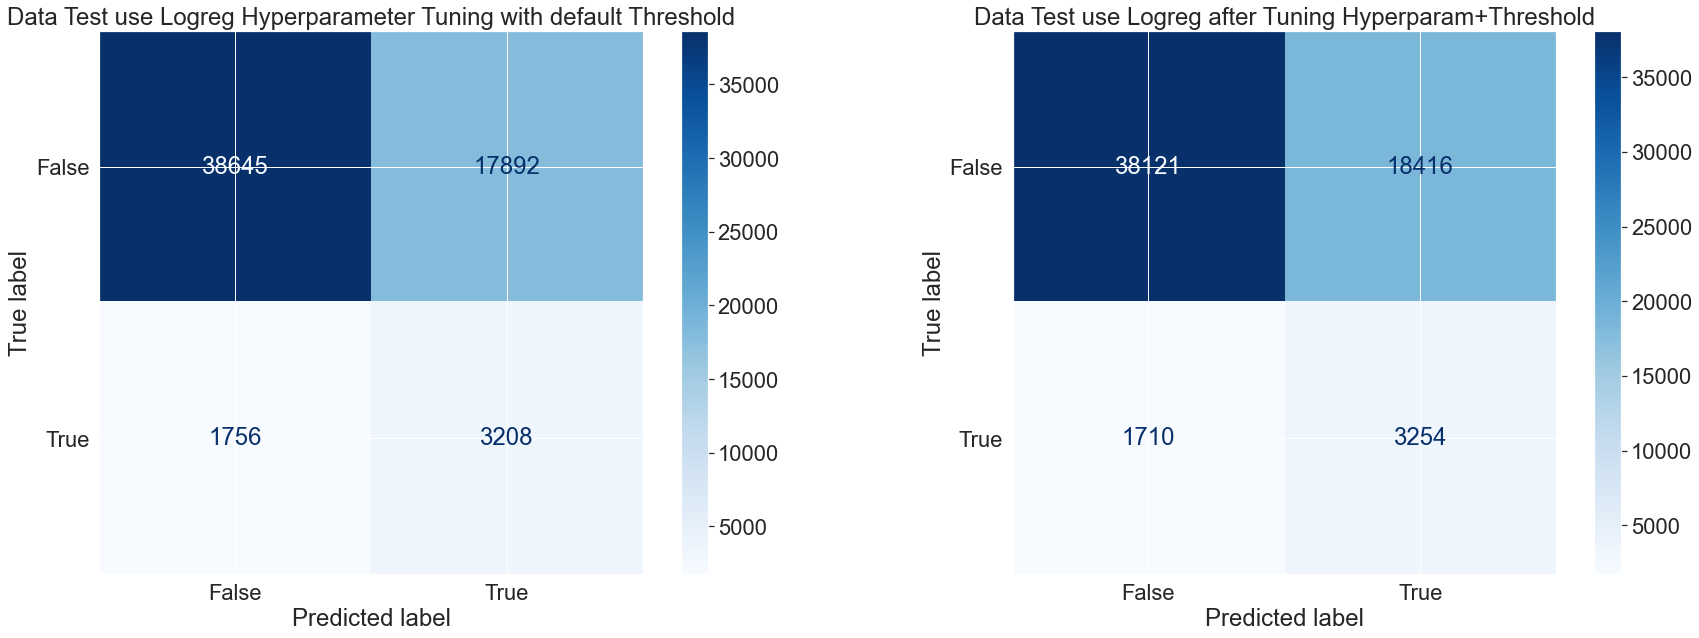

In [113]:
threshold = 0.4945
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Test use Logreg Hyperparameter Tuning with default Threshold")
ax[1].set_title("Data Test use Logreg after Tuning Hyperparam+Threshold")


logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C = 0.9404536453645365, random_state=42)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_test_thr = np.where(logreg_rs.predict_proba(X_test_encoding)[:,1]>=threshold,1,0)
y_pred_test_logreg_rs = logreg_rs.predict(X_test_encoding)
y_pred_proba_logreg_rs_test = logreg_rs.predict_proba(X_test_encoding)[:,1]

print("Score Logreg Hyperparameter Tuning with default Threshold")
print(metrics.classification_report(y_test,y_pred_test_logreg_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_logreg_rs), 
display_labels = [False, True]).plot(ax=ax[0], cmap='Blues')

print("Score Logreg after Tuning Threshold")
print(metrics.classification_report(y_test,y_pred_test_thr))
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_thr)
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_thr), 
display_labels = [False, True]).plot(ax=ax[1], cmap='Blues');

- Dengan menggunakan threshold 0.4945, Recall naik yang awalnya 65% menjadi 66% sehingga hal tersebut membuat jumlah FN turun meski tidak signifikan

### Feature Importance - Logistic Regression

In [114]:
logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C = 0.9404536453645365, random_state=42)
logreg_rs.fit(X_train_encoding, y_train)
prediction = logreg_rs.predict(X_test_encoding)
features = X_test_encoding
importance = logreg_rs.coef_[0]
feature_names = features.columns.values

In [115]:
feature_imp_logreg_res = pd.DataFrame(zip(feature_names, importance), columns=['Features', 'Importance Score'])
feature_imp_logreg_res = feature_imp_logreg_res.sort_values(by='Importance Score', ascending=True)

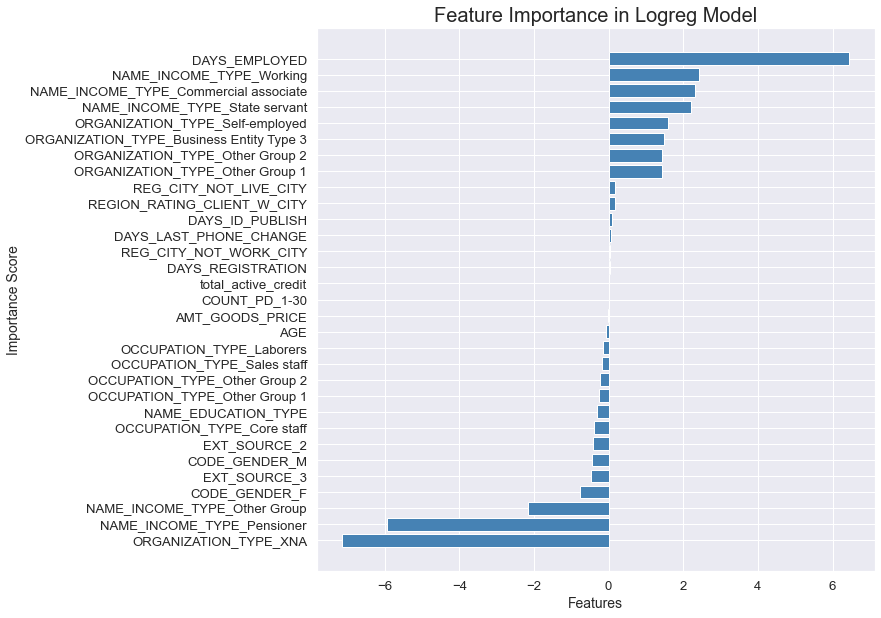

In [116]:
plt.rcParams['figure.figsize'] = (10,10)
sns.set(font_scale=1.2)
plt.barh(feature_imp_logreg_res['Features'], feature_imp_logreg_res['Importance Score'], color = 'Steelblue')
plt.title("Feature Importance in Logreg Model", fontsize = 20)
plt.xlabel("Features",fontsize = 14)
plt.ylabel("Importance Score",fontsize = 14)
# plt.xticks(rotation=45)
plt.show()

## Light Gradient Boosting Machine (LGBM)

### Hyperparameter Tuning LGBM

In [117]:
%%time
#Hyptun Logistic Regression

lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42)

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('algo', lgbm)
    ])

param_lgbm = {'algo__boosting_type': ['gbdt', 'dart', 'goss'], # default 100
                'algo__num_leaves': (20, 300),
                'algo__max_depth': (10, 13),
                'algo__min_data_in_leaf': (90, 120),
                'algo__feature_fraction': (0.5, 0.8)}


rs_lgbm= RandomizedSearchCV(estimator=pipeline, param_distributions=param_lgbm, scoring='recall', 
                               random_state=42, cv=10, n_jobs=-1, verbose=1)
rs_lgbm.fit(X_train, y_train)

print(rs_lgbm.best_params_)
print(rs_lgbm.score(X_train, y_train), rs_lgbm.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
{'algo__num_leaves': 20, 'algo__min_data_in_leaf': 90, 'algo__max_depth': 10, 'algo__feature_fraction': 0.8, 'algo__boosting_type': 'goss'}
0.6963944002417162 0.6723237473396901
CPU times: total: 1min 10s
Wall time: 9min 51s


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
Score Before Hyperparameter Tuning Use LGBM
              precision    recall  f1-score   support

           0       0.96      0.70      0.81    226144
           1       0.17      0.71      0.27     19858

    accuracy                           0.70    246002
   macro avg       0.57      0.70      0.54    246002
weighted avg       0.90      0.70      0.77    246002

Score After Hyperparameter Tuning Use LGBM
              precision    recall  f1-score   support

           0       0.96      0.69      0.80    226144
           1       0.16      0.70      0.27     19858

    accuracy                           0.69    246002
   macro avg       0.56      0.69      0.53    246002
weighted avg       0.90      0.69      0.76    246002



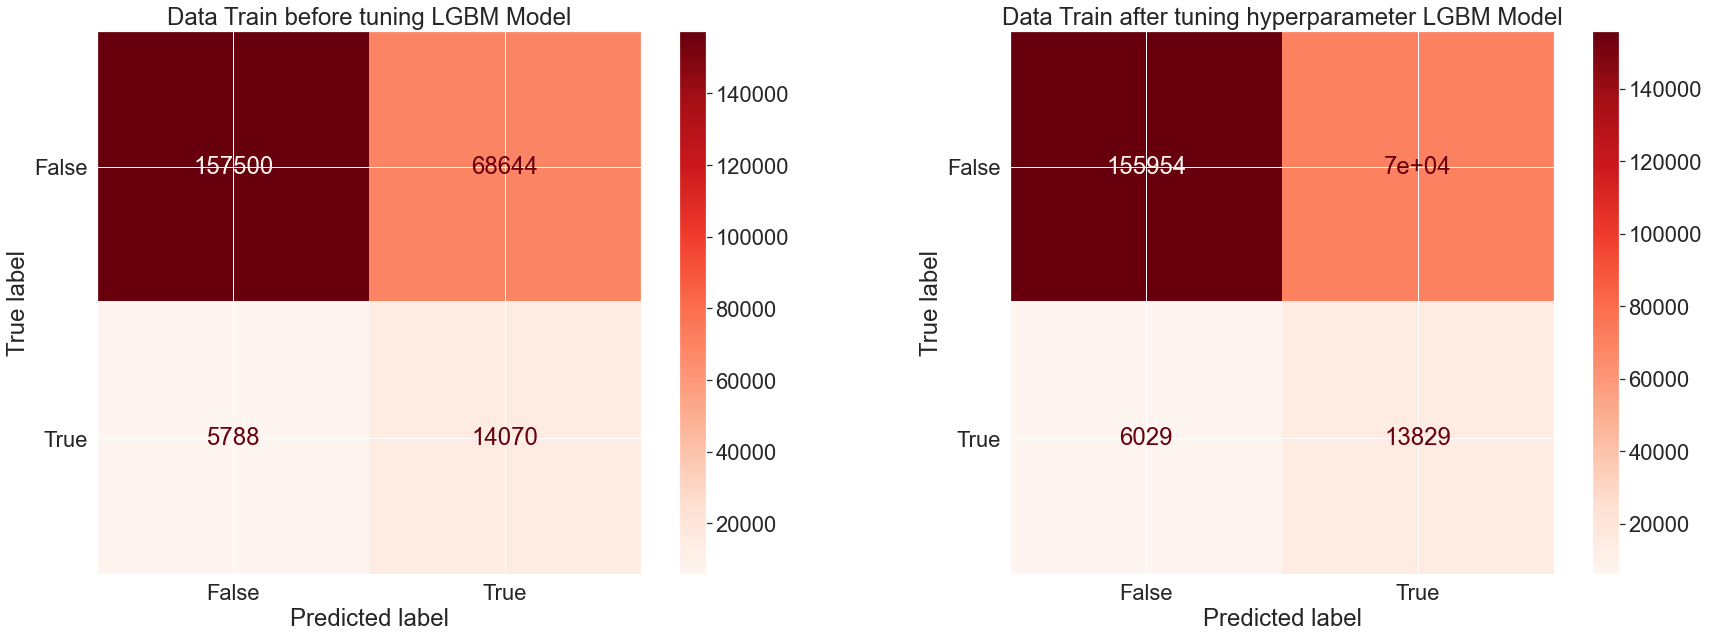

In [118]:
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Train before tuning LGBM Model")
ax[1].set_title("Data Train after tuning hyperparameter LGBM Model")

lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train_encoding, y_train)
y_pred_train_lgbm = lgbm.predict(X_train_encoding)

lgbm_rs = LGBMClassifier(n_jobs=-1, class_weight = 'balanced', random_state=42, feature_fraction=0.8, num_leaves=20,min_data_in_leaf=90, max_depth=10,boosting_type='goss')
lgbm_rs.fit(X_train_encoding, y_train)
y_pred_train_lgbm_rs = lgbm_rs.predict(X_train_encoding)

print("Score Before Hyperparameter Tuning Use LGBM")
print(metrics.classification_report(y_train,y_pred_train_lgbm))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_lgbm), 
display_labels = [False, True]).plot(ax=ax[0], cmap='Reds')

print("Score After Hyperparameter Tuning Use LGBM")
print(metrics.classification_report(y_train,y_pred_train_lgbm_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_lgbm_rs), 
display_labels = [False, True]).plot(ax=ax[1], cmap='Reds');

- Setelah dilakukan tuning hyperparameter nilai Recall menurun dan membuat jumlah FN meningkat, selanjutnya akan dilakukan tuning Threshold

### Tuning Threshold - LGBM

In [119]:
lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train_encoding, y_train)
y_pred_train_lgbm = lgbm.predict(X_train_encoding)

fpr, tpr, thresholds = roc_curve(y_train, lgbm.predict_proba(X_train_encoding)[:,1])
roc_auc_value = roc_auc_score(y_train, lgbm.predict_proba(X_train_encoding)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for LGBM: ', round(roc_auc_value*100, 2), '%')
print('Gini for LGBM: ', round(gini_value*100, 2), '%')
# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

AUC for LGBM:  77.47 %
Gini for LGBM:  54.94 %


In [120]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.505 with G-Mean: 0.7026
FPR: 0.2965, TPR: 0.7017


Score LGBM Hyperparameter with default Threshold
              precision    recall  f1-score   support

           0       0.96      0.70      0.81    226144
           1       0.17      0.71      0.27     19858

    accuracy                           0.70    246002
   macro avg       0.57      0.70      0.54    246002
weighted avg       0.90      0.70      0.77    246002

Score LGBM after Tuning Threshold
              precision    recall  f1-score   support

           0       0.96      0.70      0.81    226144
           1       0.17      0.70      0.28     19858

    accuracy                           0.70    246002
   macro avg       0.57      0.70      0.54    246002
weighted avg       0.90      0.70      0.77    246002



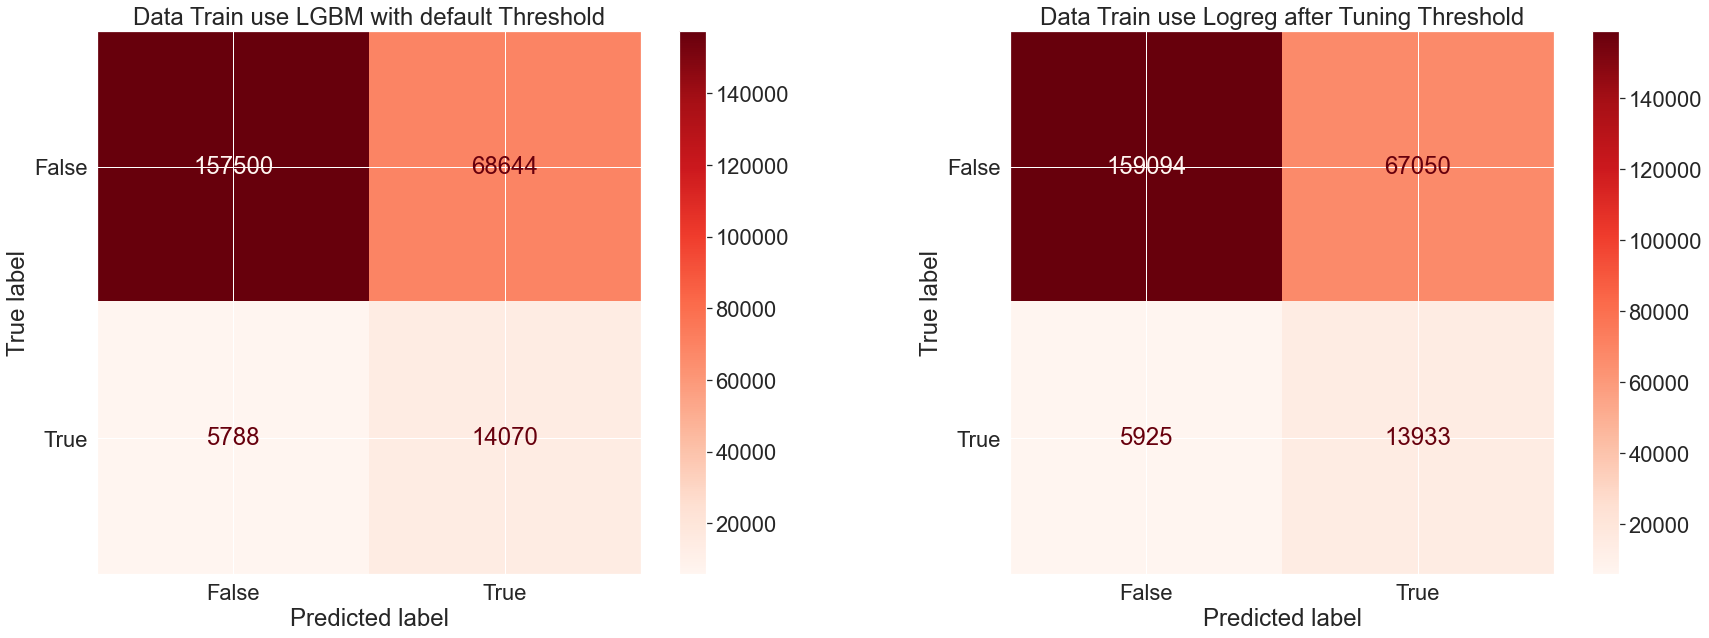

In [121]:
threshold = thresholdOpt 
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Train use LGBM with default Threshold")
ax[1].set_title("Data Train use Logreg after Tuning Threshold")
lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train_encoding, y_train)
y_pred_train_lgbm = lgbm.predict(X_train_encoding)
y_pred_train_thr = np.where(lgbm.predict_proba(X_train_encoding)[:,1]>=threshold,1,0)

print("Score LGBM Hyperparameter with default Threshold")
print(metrics.classification_report(y_train,y_pred_train_lgbm))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_lgbm), 
display_labels = [False, True]).plot(ax=ax[0], cmap='Reds')

print("Score LGBM after Tuning Threshold")
print(metrics.classification_report(y_train,y_pred_train_thr))
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_thr)
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_thr), 
display_labels = [False, True]).plot(ax=ax[1], cmap='Reds');

- Setelah dilakukan tuning threshold, jumlah FN naik. Oleh karena itu pada model LGBM akan digunakan threshold default atau 0.5

### Data Test - LGBM 

Score LGBM Hyperparameter with default Threshold
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56537
           1       0.16      0.66      0.26      4964

    accuracy                           0.69     61501
   macro avg       0.56      0.68      0.53     61501
weighted avg       0.89      0.69      0.76     61501

Score LGBM after Tuning Threshold
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     56537
           1       0.16      0.65      0.26      4964

    accuracy                           0.70     61501
   macro avg       0.56      0.68      0.53     61501
weighted avg       0.89      0.70      0.76     61501



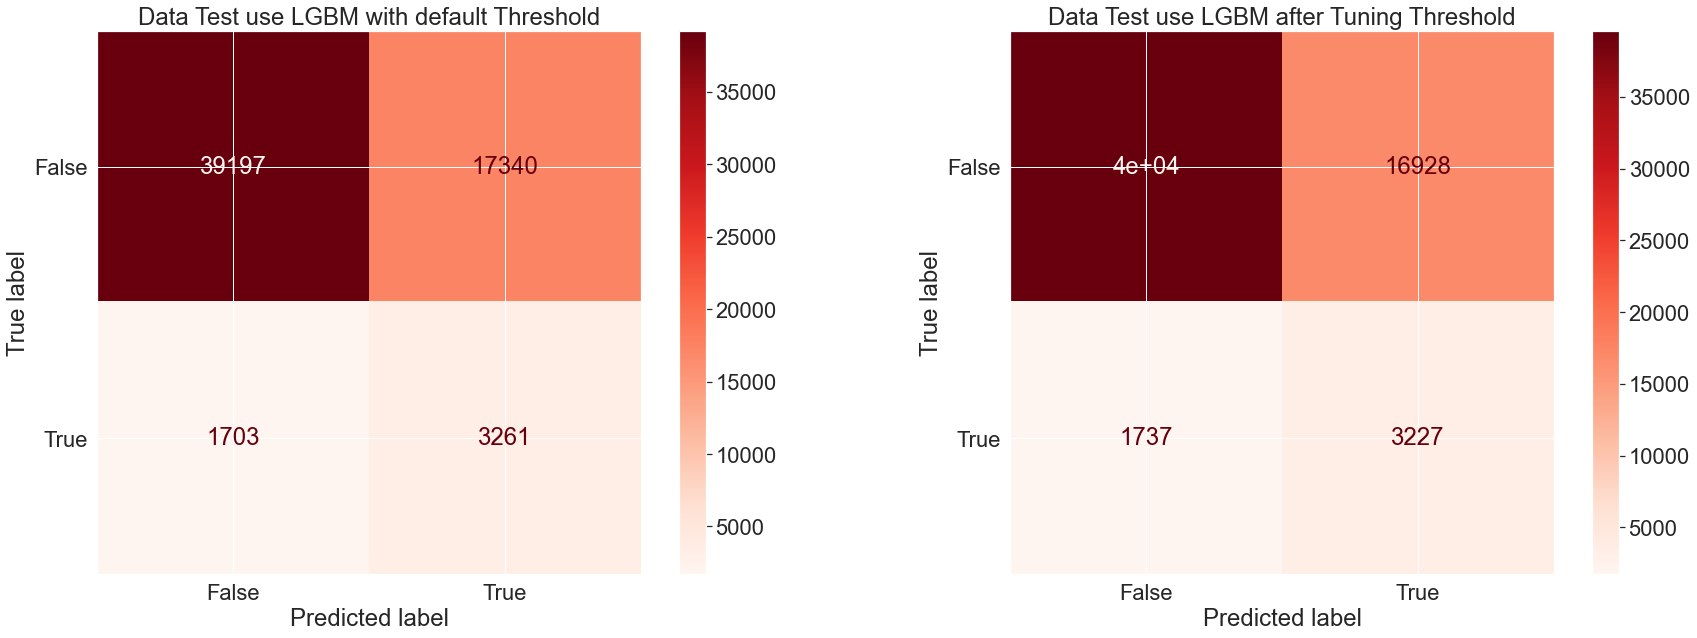

In [122]:
threshold = thresholdOpt 
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Test use LGBM with default Threshold")
ax[1].set_title("Data Test use LGBM after Tuning Threshold")
lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train_encoding, y_train)
y_pred_test_lgbm = lgbm.predict(X_test_encoding)
y_pred_test_thr = np.where(lgbm.predict_proba(X_test_encoding)[:,1]>=threshold,1,0)
y_pred_test_proba = lgbm.predict_proba(X_test_encoding)[:,1]

print("Score LGBM Hyperparameter with default Threshold")
print(metrics.classification_report(y_test,y_pred_test_lgbm))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_lgbm), 
display_labels = [False, True]).plot(ax=ax[0], cmap='Reds')

print("Score LGBM after Tuning Threshold")
print(metrics.classification_report(y_test,y_pred_test_thr))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_thr)
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_thr), 
display_labels = [False, True]).plot(ax=ax[1], cmap='Reds');

### Feature Importance - LGBM

In [123]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_test_encoding.columns)
    sns.set(font_scale=1.2)
    ax = feat_importances.nlargest(50).plot(kind='barh', figsize=(12, 8), color = 'Steelblue')
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

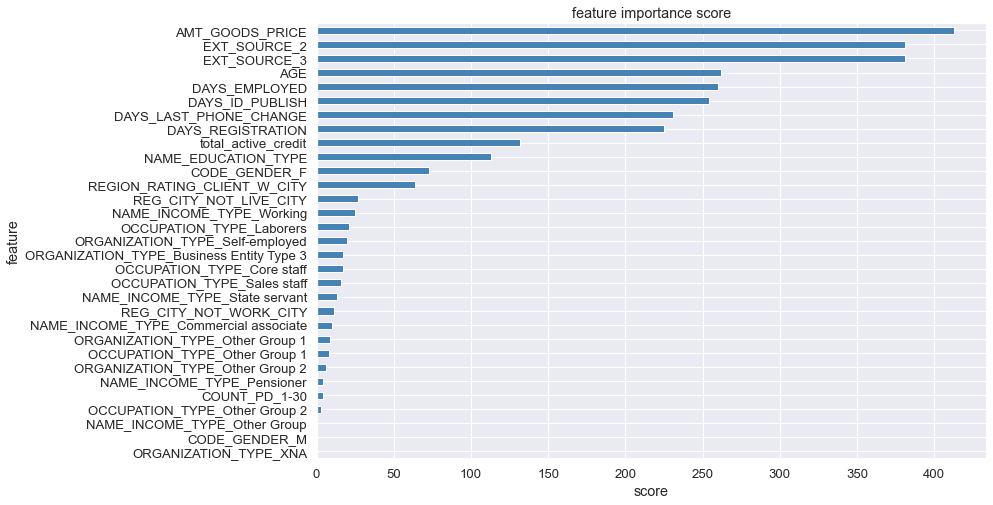

In [124]:
lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train_encoding, y_train)
show_feature_importance(lgbm)

## Perbandingan Model Logreg - LGBM

Score Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     56537
           1       0.15      0.66      0.24      4964

    accuracy                           0.67     61501
   macro avg       0.55      0.66      0.52     61501
weighted avg       0.89      0.67      0.75     61501

Score Light Gradient Boosting Machine
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     56537
           1       0.15      0.66      0.24      4964

    accuracy                           0.67     61501
   macro avg       0.55      0.66      0.52     61501
weighted avg       0.89      0.67      0.75     61501



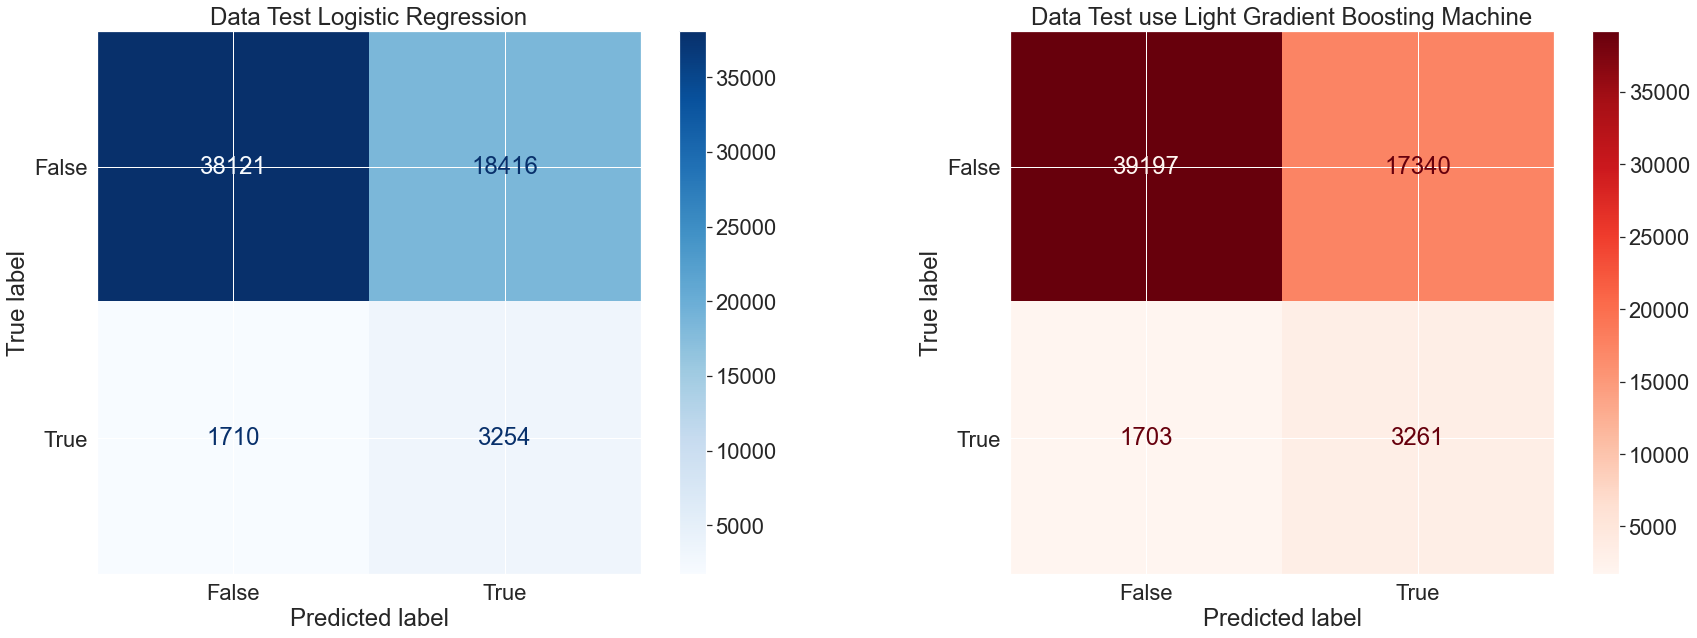

In [125]:
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Test Logistic Regression")
ax[1].set_title("Data Test use Light Gradient Boosting Machine")

#Logreg
threshold_logreg_tuning = 0.4945
logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C = 0.9404536453645365, random_state=42)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_test_thr = np.where(logreg_rs.predict_proba(X_test_encoding)[:,1]>=threshold_logreg_tuning,1,0)
y_pred_test_logreg_rs = logreg_rs.predict(X_test_encoding)

#LGBM
lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train_encoding, y_train)
y_pred_test_lgbm = lgbm.predict(X_test_encoding)

print("Score Logistic Regression")
print(metrics.classification_report(y_test,y_pred_test_thr))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_thr), 
display_labels = [False, True]).plot(ax=ax[0], cmap='Blues')

print("Score Light Gradient Boosting Machine")
print(metrics.classification_report(y_test,y_pred_test_thr))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_lgbm)
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_lgbm), 
display_labels = [False, True]).plot(ax=ax[1], cmap='Reds');

Simulasi :

- Dengan menggunakna model LGBM dan data tersebut, maka jumlah nasabah yang auto approved oleh model sejumlah 40.900 nasabah dimana 1703 nya mengalami kesulitan dalam pembayaran. Sehingga persentase nasabah yang mengalami kesulitan bayar dari seluruh nasabah yang approved oleh model adalah 4.35%

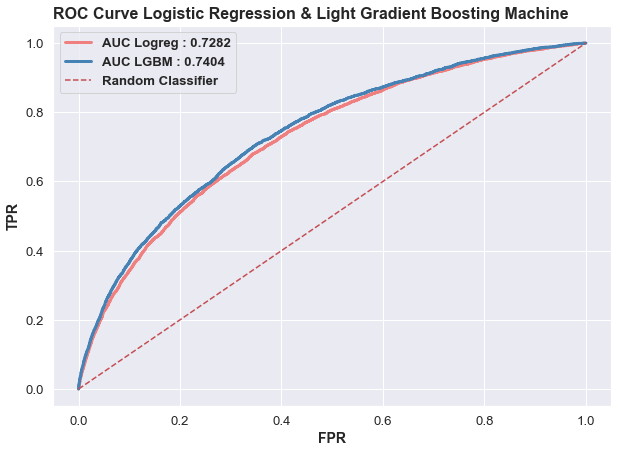

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, classification_report, confusion_matrix, roc_curve
proba_logreg = logreg_rs.predict_proba(X_test_encoding)
fpr, tpr, thresholds = roc_curve(y_test, logreg_rs.predict_proba(X_test_encoding)[:,1])
roc_auc_value = roc_auc_score(y_test, logreg_rs.predict_proba(X_test_encoding)[:,1]).round(4)

proba_lgbm = lgbm.predict_proba(X_test_encoding)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, lgbm.predict_proba(X_test_encoding)[:,1])
roc_auc_value_lgbm = roc_auc_score(y_test, lgbm.predict_proba(X_test_encoding)[:,1]).round(4)

plt.rcParams['figure.figsize'] = (10,7)
sns.set(font_scale=1.2)
plt.plot(fpr, tpr, 'Lightcoral', label=f'AUC Logreg : {roc_auc_value}', linewidth=3.0)
plt.plot(fpr_lgbm, tpr_lgbm, 'Steelblue', label=f'AUC LGBM : {roc_auc_value_lgbm}', linewidth=3.0)
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')
plt.text(x=-0.05,y=1.07,s="ROC Curve Logistic Regression & Light Gradient Boosting Machine",fontsize=16,weight='bold')
plt.xlabel('FPR',weight='bold',fontsize=14)
plt.ylabel('TPR',weight='bold',fontsize=14)
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show()

# Prediction in application_test

In [139]:
test = pd.read_csv('application_test.csv')

In [140]:
df_test = pd.merge(test, bureau_filter_new, on='SK_ID_CURR', how='left')
df_test['AGE'] = round(df_test['DAYS_BIRTH']/(-365.25))
df_test = df_test.drop('DAYS_BIRTH', axis=1)
df_test.shape

(48744, 131)

In [141]:
df_test = df_test[['DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'total_active_credit', 'DAYS_REGISTRATION', 
                   'COUNT_PD_1-30', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AGE', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 
                   'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REGION_RATING_CLIENT_W_CITY', 
                   'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'CODE_GENDER', 'ORGANIZATION_TYPE']]

In [142]:
df_test.describe()

DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  total_active_credit  \
count            48744.000000     48744.000000         42320.000000   
mean             -1077.766228     -3051.712949             2.095652   
std                878.920740      1569.276709             1.815420   
min              -4361.000000     -6348.000000             0.000000   
25%              -1766.250000     -4448.000000             1.000000   
50%               -863.000000     -3234.000000             2.000000   
75%               -363.000000     -1706.000000             3.000000   
max                  0.000000         0.000000            19.000000   

       DAYS_REGISTRATION  COUNT_PD_1-30  EXT_SOURCE_2  EXT_SOURCE_3  \
count       48744.000000   42320.000000  48736.000000  40076.000000   
mean        -4967.652716       0.006994      0.518021      0.500106   
std          3552.612035       0.093243      0.181278      0.189498   
min        -23722.000000       0.000000      0.000008      0.000527   
25%         -7459.250000       0.000000      0.408066      0.363945   
50%         -4490.000000       0.000000      0.558758      0.519097   
75%         -1901.000000       0.000000      0.658497      0.652897   
max             0.000000       5.000000      0.855000      0.882530   

                AGE  DAYS_EMPLOYED  AMT_GOODS_PRICE  REG_CITY_NOT_WORK_CITY  \
count  48744.000000   48744.000000     4.874400e+04            48744.000000   
mean      43.985332   67485.366322     4.626188e+05                0.224664   
std       11.846669  144348.507136     3.367102e+05                0.417365   
min       20.000000  -17463.000000     4.500000e+04                0.000000   
25%       34.000000   -2910.000000     2.250000e+05                0.000000   
50%       43.000000   -1293.000000     3.960000e+05                0.000000   
75%       54.000000    -296.000000     6.300000e+05                0.000000   
max       69.000000  365243.000000     2.245500e+06                1.000000   

       REG_CITY_NOT_LIVE_CITY  REGION_RATING_CLIENT_W_CITY  
count            48744.000000                 48744.000000  
mean                 0.077466                     2.012596  
std                  0.267332                     0.515804  
min                  0.000000                    -1.000000  
25%                  0.000000                     2.000000  
50%                  0.000000                     2.000000  
75%                  0.000000                     2.000000  
max                  1.000000                     3.000000

In [143]:
df_test = df_test[df_test['REGION_RATING_CLIENT_W_CITY']>=0]

In [144]:
df_test[['REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REGION_RATING_CLIENT_W_CITY']] = df_test[['REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REGION_RATING_CLIENT_W_CITY']].astype(np.object)

In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48743 entries, 0 to 48743
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DAYS_LAST_PHONE_CHANGE       48743 non-null  float64
 1   DAYS_ID_PUBLISH              48743 non-null  int64  
 2   total_active_credit          42319 non-null  float64
 3   DAYS_REGISTRATION            48743 non-null  float64
 4   COUNT_PD_1-30                42319 non-null  float64
 5   EXT_SOURCE_2                 48735 non-null  float64
 6   EXT_SOURCE_3                 40075 non-null  float64
 7   AGE                          48743 non-null  float64
 8   DAYS_EMPLOYED                48743 non-null  int64  
 9   AMT_GOODS_PRICE              48743 non-null  float64
 10  REG_CITY_NOT_WORK_CITY       48743 non-null  object 
 11  REG_CITY_NOT_LIVE_CITY       48743 non-null  object 
 12  REGION_RATING_CLIENT_W_CITY  48743 non-null  object 
 13  NAME_EDUCATION_T

In [146]:
df_test['OCCUPATION_TYPE'].fillna('Other', inplace=True)
df_test['total_active_credit'].fillna(0, inplace=True)
df_test['COUNT_PD_1-30'].fillna(0, inplace=True)
df_test['EXT_SOURCE_2'].fillna(df_test['EXT_SOURCE_2'].quantile(0.5), inplace=True)
df_test['EXT_SOURCE_3'].fillna(df_test['EXT_SOURCE_3'].quantile(0.5), inplace=True)

In [147]:
df_test.isnull().sum()

DAYS_LAST_PHONE_CHANGE         0
DAYS_ID_PUBLISH                0
total_active_credit            0
DAYS_REGISTRATION              0
COUNT_PD_1-30                  0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
AGE                            0
DAYS_EMPLOYED                  0
AMT_GOODS_PRICE                0
REG_CITY_NOT_WORK_CITY         0
REG_CITY_NOT_LIVE_CITY         0
REGION_RATING_CLIENT_W_CITY    0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
OCCUPATION_TYPE                0
CODE_GENDER                    0
ORGANIZATION_TYPE              0
dtype: int64

In [148]:
df_test.duplicated().sum()

0

In [149]:
df_test['NAME_INCOME_TYPE'] = np.where(df_test['NAME_INCOME_TYPE']=='Working','Working',
                                        np.where(df_test['NAME_INCOME_TYPE']=='Commercial associate','Commercial associate',
                                             np.where(df_test['NAME_INCOME_TYPE']=='Pensioner','Pensioner',
                                                      np.where(df_test['NAME_INCOME_TYPE']=='State servant','State servant','Other Group'))))

df_test['OCCUPATION_TYPE'] = np.where(df_test['OCCUPATION_TYPE']=='Other','Other Group 1',
                                        np.where(df_test['OCCUPATION_TYPE']=='Laborers','Laborers',
                                             np.where(df_test['OCCUPATION_TYPE']=='Sales staff','Sales staff',
                                                      np.where(df_test['OCCUPATION_TYPE']=='Core staff','Core staff','Other Group 2'))))

df_test['ORGANIZATION_TYPE'] = np.where(df_test['ORGANIZATION_TYPE']=='Business Entity Type 3','Business Entity Type 3',
                                        np.where(df_test['ORGANIZATION_TYPE']=='XNA','XNA',
                                             np.where(df_test['ORGANIZATION_TYPE']=='Self-employed','Self-employed',
                                                      np.where(df_test['ORGANIZATION_TYPE']=='Other','Other Group 2','Other Group 1'))))
df_test['NAME_EDUCATION_TYPE'] = np.where(df_test['NAME_EDUCATION_TYPE']=='Lower secondary','E1',
                                     np.where(df_test['NAME_EDUCATION_TYPE']=='Secondary / secondary special','E2',
                                          np.where(df_test['NAME_EDUCATION_TYPE']=='Higher education','E3',
                                               np.where(df_test['NAME_EDUCATION_TYPE']=='Incomplete higher','E4','E5'))))

In [150]:
X_train_encoding = preprocessor.fit_transform(X_train)
test_encoding = preprocessor.transform(df_test)

In [154]:
lgbm = LGBMClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train_encoding, y_train)
y_test_test_lgbm = lgbm.predict(test_encoding)
proba_lgbm_new = lgbm.predict_proba(test_encoding)

In [155]:
test_approval = test[test['REGION_RATING_CLIENT_W_CITY']>=0]
test_approval = test_approval[['SK_ID_CURR']]
test_approval['Prediksi'] = y_test_test_lgbm.tolist()
test_approval['Peluang Lancar Bayar'] = proba_lgbm_new[:,0].tolist()
test_approval['Peluang Tidak Lancar Bayar'] = proba_lgbm_new[:,1].tolist()
test_approval['Prediksi'] = np.where(test_approval['Prediksi']==1,'Payment Difficulties','No Difficulties')

In [157]:
test_approval.to_excel('test_approval_convert.xlsx')

In [158]:
test_approval.head(20)

SK_ID_CURR              Prediksi  Peluang Lancar Bayar  \
0       100001       No Difficulties              0.597361   
1       100005  Payment Difficulties              0.349723   
2       100013       No Difficulties              0.771437   
3       100028       No Difficulties              0.627888   
4       100038  Payment Difficulties              0.394371   
5       100042       No Difficulties              0.554281   
6       100057       No Difficulties              0.645504   
7       100065       No Difficulties              0.530524   
8       100066       No Difficulties              0.878504   
9       100067       No Difficulties              0.589819   
10      100074       No Difficulties              0.515242   
11      100090  Payment Difficulties              0.481196   
12      100091  Payment Difficulties              0.429844   
13      100092  Payment Difficulties              0.452078   
14      100106  Payment Difficulties              0.463855   
15      100107  Payment Difficulties              0.449982   
16      100109       No Difficulties              0.506180   
17      100117       No Difficulties              0.718474   
18      100128  Payment Difficulties              0.470067   
19      100141       No Difficulties              0.642499   

    Peluang Tidak Lancar Bayar  
0                     0.402639  
1                     0.650277  
2                     0.228563  
3                     0.372112  
4                     0.605629  
5                     0.445719  
6                     0.354496  
7                     0.469476  
8                     0.121496  
9                     0.410181  
10                    0.484758  
11                    0.518804  
12                    0.570156  
13                    0.547922  
14                    0.536145  
15                    0.550018  
16                    0.493820  
17                    0.281526  
18                    0.529933  
19                    0.357501

In [159]:
test_approval['Prediksi'].value_counts(True)

No Difficulties         0.666988
Payment Difficulties    0.333012
Name: Prediksi, dtype: float64

- Berdasarkan prediksi tersebut 67% calon debitur dari data test dapat dilakukan pembiayaan dan sisanya dicut atau dapat dilakukan analisa lebih lanjut secara manual dengan menggunakan prinsip 1P+5C